### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## 0) Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to explore and communicate trends, and extract meaningful insights to inform decision-making. This Jupyter Notebook is the starting point and it is important to document all your decisions and observations to ensure that these are available as inputs to the technical report and business presentation that will form part of your submission.

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 
Keep in mind the following points: 
- Using this template as your working document is optional, it is **not required** to use this template to complete the assignment. 
- The intention of the template is to provide suggestions regarding the structure and workflow that is expected and it follows the assignment activites throughout the course.
- Refer to the guidance in the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding comments, cells, and content to reflect your analytical journey. You can add links, screenshots, or images to support your analysis, refine or clarify the questions, and change the workflow to suit your process. Important elements include:
    - code comments
    - Markdown cells with your observations, interpretation, and notes in anticipation of the technical report and business presentation.
- All code output and visualisations should be functional and visible in the submitted Jupyter Notebook. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- Be sure to save frequent snapshots of your Jupyter Notebook to ensure that you can recover work if required.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.
 
 
 > ***Notebook state*** Remember that you will have to execute all the code in your notebook (from the start of the notebook to where you are currently working) every time you restart your Jupyter Notebook server or when working in a new session. Make sure that your notebook is in the correct state before continuing with the work for the current module.

# 

## 1) Assignment activity 1
In the first module you are encouraged to explore the data and the provided template. You should also reflect on the scenario and use case and start to document your own interpretation of the business questions and how you will go about answering them.

Firstly, the data will be imported into the Jupyter notebook, where it will undergo a sense check and be examined for missing values.

I reviewed the data in Excel and pinpointed specific areas of interest for further investigation. These areas included the time from booking to appointment, appointment modes and durations, appointment statuses, quantities of undefined data (such as unknowns and unmapped data), healthcare professional types, and context types.

The initial areas of interest and how to collate the data have been discussed in a bit more depth below.

Explore times from booking to appointment; are there any noticeable trends within the data? This will be achieved by comparing the different time frames for appointment waits with the sum of the count of the appointment column.

Explore appointment modes; which is the most prevalent? How are most appointments completed? This will be accomplished by comparing the different appointment modes with the appointment count.

Explore appointment statuses by using the count of appointments to show attendance rates. This will be obtained by comparing appointment statuses with the appointment count.

Explore healthcare professional types; which professionals are being used the most? Are there months when there are shortages? This data will be procured by comparing the professional types over time with the appointment count.

Explore seasonal variances; are there peaks at certain times of the year? This is important to keep track of so staffing levels can be appropriately allocated. This will be done by comparing the appointments over different time frames for seasons, as well as daily and monthly.

Explore duration times; are appointments taking longer over time? Is efficiency in this area improving or declining? This will be attained by comparing the duration of appointments over time.

During the analytical journey, after initial exploration, it has been deemed of great importance to take note of the quantity of unknowns, unmapped, and data quality in general to suggest improved data collection and identify issues. It's imperative that this data is noted in every dataset during the analytical process.

With this analysis, I will be examining the data to see if there are any noticeable trends and, if so, where improvements can be made. Given the wide geographical base of the data, I've decided to base this analysis on the NHS as a whole to get an overall picture of how the system is working nationally. Once this has been completed, further analysis, I believe, would be essential on a more regional basis, as there will surely be variances between areas.

## 2) Assignment activity 2
**Basic exploration and descriptive statistics.**
- Import the three indicated data sources and perform basic exploratory analysis including obtaining descriptive statistics.
- Determine and comment on the quality, usefulness, and opportunities contained in the data sets.
- Document initial observations and findings.

Are there any comments regarding data quality or descriptive statistics worth noting for each of the data sets?
Can you comment on other features (columns) that could potentially be useful in your analysis?

### Prepare your workstation

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Import other libraries if required. (Note that you can revisit this section in later modules.)

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and sense-check 'actual_duration.csv' as ad.
ad = pd.read_csv('actual_duration.csv')

In [3]:
# View the DataFrame.
print(ad.shape)
print(ad.dtypes)
print(ad.columns)
ad.head()

(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [4]:
# Check for missing values.
ad_na = ad.isnull()

# Show output
ad_na

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
137788,False,False,False,False,False,False,False,False
137789,False,False,False,False,False,False,False,False
137790,False,False,False,False,False,False,False,False
137791,False,False,False,False,False,False,False,False


In [5]:
# Review metadata and descriptive statistics.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [6]:
# Descriptive statistics of ad
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [7]:
# Import and sense-check 'appointments_regional.csv' as ar.
ar = pd.read_csv('appointments_regional.csv')

In [8]:
# View the DataFrame.
print(ar.shape)
print(ar.dtypes)
print(ar.columns)
ar.head()

(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [9]:
# Check for missing values.
ar_na = ar.isnull()

# Show output
ar_na

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
596816,False,False,False,False,False,False,False
596817,False,False,False,False,False,False,False
596818,False,False,False,False,False,False,False
596819,False,False,False,False,False,False,False


In [10]:
# Review metadata and descriptive statistics.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [11]:
# Descriptive statistics of ar
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [12]:
# Import and sense-check 'national_categories.xlsx' as nc.
nc = pd.read_excel('national_categories.xlsx')

In [13]:
# View the DataFrame.
print(nc.shape)
print(nc.dtypes)
print(nc.columns)
nc.head()

(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [14]:
# Check for missing values.
nc_na = nc.isnull()

# Show output
nc_na

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
817389,False,False,False,False,False,False,False,False
817390,False,False,False,False,False,False,False,False
817391,False,False,False,False,False,False,False,False
817392,False,False,False,False,False,False,False,False


In [15]:
# Review metadata and descriptive statistics.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [16]:
# Descriptive statistics of nc
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


All datasets were imported into the notebook, and they underwent a sense-check, including a check for missing values. The descriptive analysis completed during this process revealed the vast scale of the available data, confirming the absence of missing values.

### Exploration suggestions:
Make sure to supplement the list with additional questions and observations that you have identified during modules 1 and 2.

**Question 1:** How many locations are there in the data set?

In [17]:
# Determine the number of locations for national categories. Result = 106
locations_nc = nc['sub_icb_location_name'].value_counts()

# Show output
locations_nc

NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
                                               ...  
NHS North East and North Cumbria ICB - 00N      4210
NHS Lancashire and South Cumbria ICB - 02G      4169
NHS Cheshire and Merseyside ICB - 01V           3496
NHS Cheshire and Merseyside ICB - 01T           3242
NHS Greater Manchester ICB - 00V                2170
Name: sub_icb_location_name, Length: 106, dtype: int64

**Question 2:** What are the five locations with the highest number of records?



In [18]:
# Determine the top five locations based on record count.
locations_nc_top5 = nc['sub_icb_location_name'].value_counts().head(5)

# Show output
locations_nc_top5

NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64

With this analysis completed and the results showing 106 different locations, it only reaffirmed my initial decision to collate data on a national level initially, with possible regional analysis to be conducted at a later date if requested.

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [19]:
# Determine the number of service settings.
serv_set = nc['service_setting'].value_counts()

# Show output
serv_set

General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: service_setting, dtype: int64

Understandably, the GP service setting had the highest count in the dataset. However, the large number in the Other column indicates a need for better definition of service settings. Conducting research to identify the components of this section would be beneficial, leading to either the creation of a new relevant setting or reassignment to one of the existing settings. Although the unmapped total constitutes a small percentage, efforts should be made to understand the reasons behind these occurrences.

In [20]:
# Determine the number of context types.
con_type = nc['context_type'].value_counts()

# Show output
con_type

Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: context_type, dtype: int64

The most significant challenge in this data is the Inconsistent Mapping results. The causes of these occurrences also need to be investigated, and this can be included in the same process as the unmapped category. Improvements in mapping would make the data more robust, providing more accurate results, therefore, this stands out as a recommendation for stakeholders.

In [21]:
# Determine the number of national categories.
nat_cat = nc['national_category'].value_counts()

# Show output
nat_cat

Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care Home Visit                                                        26644

Reiterating the above analysis, 'Inconsistent Mapping' is an area for improvement along with 'Unmapped'.

In [22]:
# Determine the number of appointment statuses.
app_stat = ar['appointment_status'].value_counts()

# Show output
app_stat

Attended    232137
Unknown     201324
DNA         163360
Name: appointment_status, dtype: int64

A particularly concerning area, even at this early stage of the data journey, is the significant number of 'Unknown' and 'DNA' (Did Not Attend) appointment statuses. This suggests a substantial number of patients not showing up, with over 1 in 4 appointments resulting in no attendance. This not only wastes valuable resources but also indicates that efficiency could be dramatically increased with reductions in this area alone. Furthermore, the 'Unknown' data requires further exploration, along with the unmapped and inconsistent mapping categories already mentioned above.

In [23]:
# Determine the number of appointment modes.
app_mode = ar['appointment_mode'].value_counts()

# Show output
app_mode

Face-to-Face    180410
Telephone       166483
Home Visit      111194
Unknown          79147
Video/Online     59587
Name: appointment_mode, dtype: int64

This data outlines the effective use of various methods to provide care to patients. The frequent utilization of telephone and video/online modes helps alleviate pressure on GP visits and reduces backlog in that area. It would be advantageous to delve into the trend of their use over time. The Unknown category should again be included in the list for 'investigation.'

In [24]:
# Determine the time between booking and appointment
app_time = ar['time_between_book_and_appointment'].value_counts()

# Show output
app_time

Same Day                  95502
2 to 7 Days               92409
1 Day                     88957
8  to 14 Days             82698
15  to 21 Days            73666
22  to 28 Days            68755
More than 28 Days         65147
Unknown / Data Quality    29687
Name: time_between_book_and_appointment, dtype: int64

The Unknown / Data Quality section will be another addition to the 'investigation' mentioned throughout this notebook for obvious reasons. The data itself indicates that more patients are seen in the first week than in subsequent weeks. Without delving into the reasons for each duration, it's challenging to ascertain any issues here. Longer waits could be for major operations, such as hip replacements, or due to the need for only monthly appointments, creating a large array of permutations for which there is no data.

In [25]:
# Determine HCP type
hcp_type = ar['hcp_type'].value_counts()

# Show output
hcp_type

Other Practice staff    241557
GP                      226036
Unknown                 129228
Name: hcp_type, dtype: int64

As this data currently only categorizes GP as a type, it is necessary to review the categories and reclassify those in Other Practice Staff. Obviously, the NHS comprises more than just GPs, and this acknowledgment should be reflected in the actual data, not just in the metadata. This reclassification would be beneficial for future employment targets in all areas of the NHS and would also provide a clearer picture of who is completing the appointments. It can help identify trends over time, indicating whether certain professions are contributing more or less to reducing or increasing the workload on GPs.

In [26]:
# Determine duration times
dur_time = ad['actual_duration'].value_counts()

# Show output
dur_time

Unknown / Data Quality    20161
1-5 Minutes               19909
6-10 Minutes              19902
11-15 Minutes             19738
16-20 Minutes             19534
21-30 Minutes             19452
31-60 Minutes             19097
Name: actual_duration, dtype: int64

Without knowing the context of each appointment, it's difficult to draw conclusions from this data. However, the Unknown / Data Quality in this area will be added to the 'investigation,' along with all the other unknown data discovered above.

Summary of Analysis week 2:

The appropriate libraries and data were successfully loaded into the Jupyter notebook, and the data frames underwent a thorough sense-check to identify any missing data. Notably, no missing data was found. 
Initial exploration was conducted regarding the identified areas of interest. Most noteworthy from this preliminary phase were the prevalence of 'unknown' and 'DNA' appointment statuses, alongside the presence of unmapped and inconsistently mapped values within the 'Context type' and 'National category' fields. 
The 'other' value in the 'Service setting' poses an area of concern, as does the uncertainty surrounding data quality for appointment times, appointment modes, and HCP types. Thus, the overall impression at this stage is that data integrity requires improvement, given the prevalence of unknowns, unmapped values, etc., and a significant number of 'DNA' appointments is a major concern.

## 3) Assignment activity 3
Continue your exploratory data analysis by answering the specific questions posed by the NHS as well as additional trends identified during data exploration. You can start by looking at the date range and the change in behaviour over time for the available data sources.

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [27]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [28]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [29]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DataFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [30]:
# Initially this question was “change the date format of ar[‘appointment_date’] to date time”
# This column was not present so code below was used to change 'appointment_month' instead.
# Change the format of ar['appointment_month'] to datetime.
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

# View the DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [31]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Calculate the minimum date using the min() function
min_date_ad = ad['appointment_date'].min()

# Calculate the maximum date using the max() function
max_date_ad = ad['appointment_date'].max()

# Print results
print(min_date_ad)
print(max_date_ad)

2021-12-01 00:00:00
2022-06-30 00:00:00


In [32]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Calculate the minimum date using the min() function
min_date_nc = nc['appointment_date'].min()

# Calculate the maximum date using the max() function
max_date_nc = nc['appointment_date'].max()

# Print results
print(min_date_nc)
print(max_date_nc)

2021-08-01 00:00:00
2022-06-30 00:00:00


After changing the appointment_month to datetime the min and max functions were used to show the date range of the data.

**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [33]:
# Create a subset with 'appointment_date', 'service_setting', 'sub_icb_location_name' 
nc_subset = nc[['appointment_date', 'service_setting', 'sub_icb_location_name']]

# View the output.
nc_subset

,appointment_date,service_setting,sub_icb_location_name
0,2021-08-02,Primary Care Network,NHS North East and North Cumbria ICB - 00L
1,2021-08-02,Other,NHS North East and North Cumbria ICB - 00L
2,2021-08-02,General Practice,NHS North East and North Cumbria ICB - 00L
3,2021-08-02,General Practice,NHS North East and North Cumbria ICB - 00L
4,2021-08-02,General Practice,NHS North East and North Cumbria ICB - 00L
...,...,...,...
817389,2022-06-30,Extended Access Provision,NHS West Yorkshire ICB - X2C4Y
817390,2022-06-30,Extended Access Provision,NHS West Yorkshire ICB - X2C4Y
817391,2022-06-30,Extended Access Provision,NHS West Yorkshire ICB - X2C4Y
817392,2022-06-30,Extended Access Provision,NHS West Yorkshire ICB - X2C4Y


In [34]:
# Filter data for the specified date range and location containing 'W2U3Z' in 'sub_icb_location_name'
# Date range from 1 January to 1 June 2022
subicb_set = nc_subset[(nc_subset['appointment_date'] >= '2022-01-01') &
                       (nc_subset['appointment_date'] < '2022-06-01') &
                       (nc_subset['sub_icb_location_name'].str.contains('W2U3Z'))]

# Find the 'service setting' with the most appointments
pop_service = subicb_set['service_setting'].value_counts().idxmax()

# Display the result
print(f"The most popular service for W2U3Z from the 1st of January 2022 to the 1st of June 2022 is {pop_service}")

The most popular service for W2U3Z from the 1st of January 2022 to the 1st of June 2022 is General Practice


In [35]:
# Determine the number of service settings.
count_service = subicb_set['service_setting'].value_counts()

# Display the number of service settings.
print(f"The individual count of all the service settings is :\n{count_service}")

The individual count of all the service settings is :
General Practice             2087
Other                        1308
Primary Care Network         1263
Extended Access Provision    1080
Unmapped                      151
Name: service_setting, dtype: int64


**Question 3:** Which month had the highest number of appointments?

In [36]:
# Number of appointments per month == sum of count_of_appointments by month.
nc['year_month'] = nc['appointment_date'].dt.to_period('M')

# Use the groupby() and sort_values() functions.
app_month = nc.groupby('year_month')['count_of_appointments'].sum().sort_values(ascending=False)

# Reset the index
app_month = app_month.reset_index()

# Rename the columns
app_month.columns = ['year_month', 'sum_of_appointments']

# Show the results of all months descending
app_month

,year_month,sum_of_appointments
0,2021-11,30405070
1,2021-10,30303834
2,2022-03,29595038
3,2021-09,28522501
4,2022-05,27495508
5,2022-06,25828078
6,2022-01,25635474
7,2022-02,25355260
8,2021-12,25140776
9,2022-04,23913060


In [37]:
# Which month had the highest number of appointments?
busiest_month = app_month['year_month'].value_counts().idxmax()

print(f"The month with the highest number of appointments was {busiest_month}")

The month with the highest number of appointments was 2021-11


The results of this provided great insight into the busiest months of the year. This information is crucial for planning staffing levels, bed capacity, and stock levels of all healthcare essentials. October and November, and to a lesser extent, March and September, are months where the greatest importance should be placed in planning for these areas.

**Question 4:** What was the total number of records per month?

In [38]:
# Total number of records per month in the data source national categories.
nc['year_month'] = nc['appointment_date'].dt.to_period('M')

# Use the groupby() and sort_values() functions.
count_nc = nc.groupby('year_month')['appointment_date'].count()

# Reset the index
count_nc = count_nc.reset_index()

# Rename the columns
count_nc.columns = ['year_month', 'records']

# Show the results
count_nc

,year_month,records
0,2021-08,69999
1,2021-09,74922
2,2021-10,74078
3,2021-11,77652
4,2021-12,72651
5,2022-01,71896
6,2022-02,71769
7,2022-03,82822
8,2022-04,70012
9,2022-05,77425


Resulting data shows a large number of records obtained for most months, with March being the month where collation was at its greatest. This could be explored to find out why the extra data was obtained and how that could be used to improve data collection for other months.

In [39]:
# Total number of records per month in the data source actual duration.
ad['year_month'] = ad['appointment_date'].dt.to_period('M')

# Use the groupby() and sort_values() functions.
count_ad = ad.groupby('year_month')['appointment_date'].count()

# Reset the index
count_ad = count_ad.reset_index()

# Rename the columns
count_ad.columns = ['year_month', 'records']

# Show the results
count_ad

,year_month,records
0,2021-12,19507
1,2022-01,19643
2,2022-02,18974
3,2022-03,21236
4,2022-04,19078
5,2022-05,20128
6,2022-06,19227


Unfortunately, the data here shows only a small range for actual duration, with March being the month where collation was at its greatest. This again could be assessed to find out why the extra data was obtained and how it could be used to improve data collection for other months moving forward. A question to be answered would be whether there is data prior to December 2021 or if the system was implemented only from then.

In [40]:
# Convert 'appointment_date' to datetime
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

# Total number of records per month in the data source appointments regional.
ar['year_month'] = ar['appointment_month'].dt.to_period('M')

# Use the groupby() and sort_values() functions.
count_ar = ar.groupby('year_month')['appointment_month'].count()

# Reset the index
count_ar = count_ar.reset_index()

# Rename the columns
count_ar.columns = ['year_month', 'records']

# Show the results
count_ar

,year_month,records
0,2020-01,20889
1,2020-02,20689
2,2020-03,21350
3,2020-04,19124
4,2020-05,18338
5,2020-06,18844
6,2020-07,19502
7,2020-08,19247
8,2020-09,20043
9,2020-10,20122


Firstly, as a data analyst, this resulting data was great to see, considering the date range compared to the other two sets explored. It also seems to be collated in a very organised fashion, with not a great deal of variance between months over a long period of time. Using a similar collation template for the other two datasets could be beneficial when trying to improve collection in their data.

Summary of Analysis week 3:

Data collection was a standout point of interest due to the varying date ranges available from all three datasets. Regional appointments date back to January 2020 and show 30 months of data, making it by far the largest dataset. National categories commence from August 2021, showing eleven months, and actual duration from December 2021 only shows 7 months. I would like to find out if there is available data for the latter two sets to be able to show even datasets for all three. With larger data to delve into then better assessments can be made. 
Additionally, with some months in national categories and actual duration having differing collation rates, it would be useful to find out if there is any reason for this or if it's because their collection is in an early stage and the process needs refinement. 
But, the most beneficial part of this week's analysis was identifying the busiest months of the year, which is essential to know for planning staffing levels, bed capacity, and stock levels of all healthcare essentials.

## 4) Assignment activity 4
Use visual techniques to explore and communicate patterns in the data. Note that you will likely revisit this section when preparing the final visualisations to be used in your technical report and business presentation. Make sure to document your thoughts and observations as they relate to various potential stakeholders.

The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [41]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [42]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype(str)

In [43]:
# Aggregate on a monthly level and determine the sum of records per month for each service setting.
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Rename the columns
nc_ss.columns = ['month', 'service', 'count']

# View output
nc_ss

,month,service,count
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


<Axes: xlabel='service', ylabel='count'>

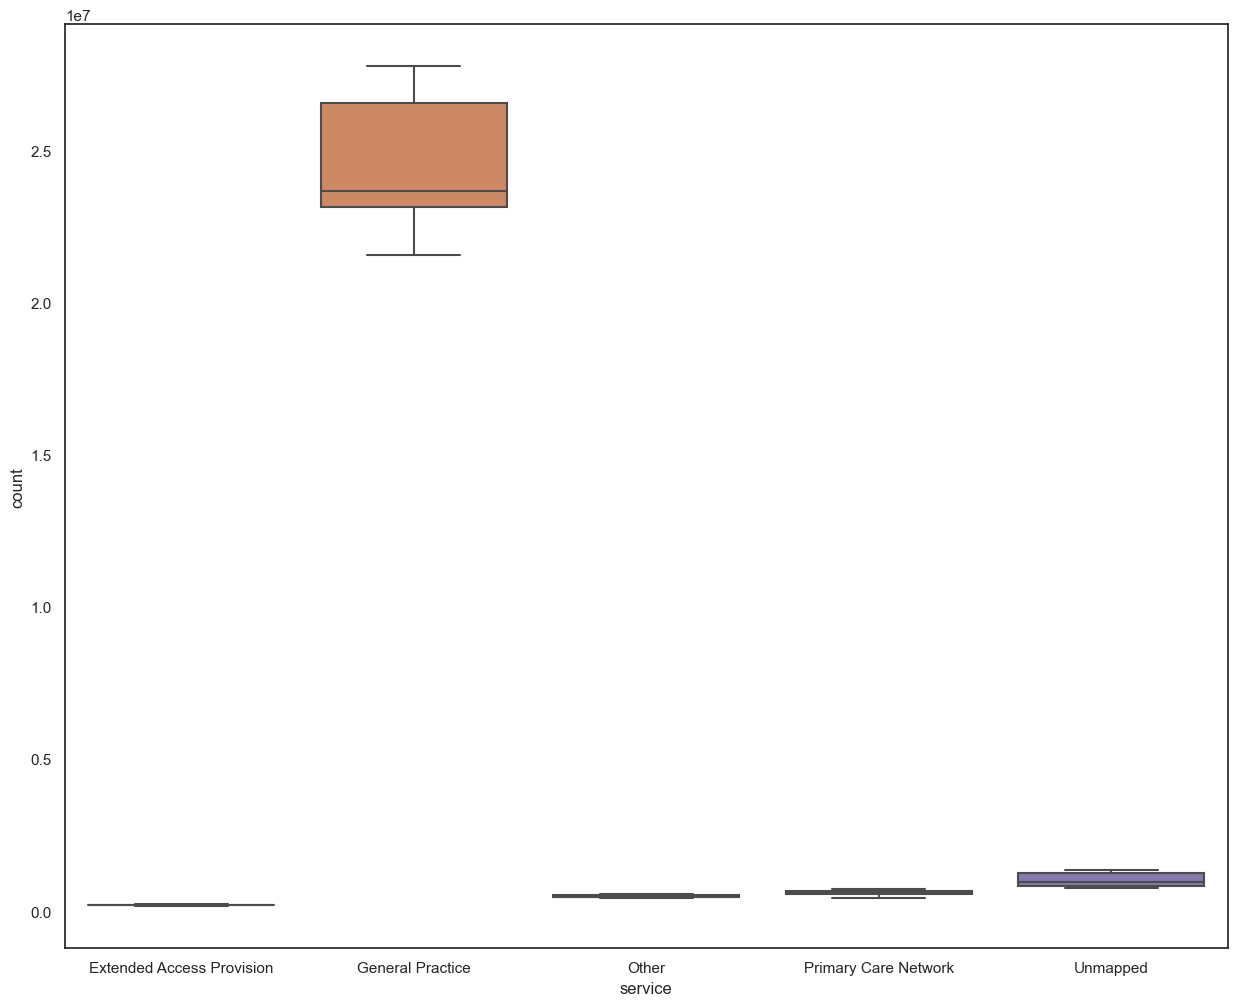

In [44]:
# Checking for outliers
sns.boxplot(x='service', y='count', data=nc_ss)

After changing the data type of appointment_month to string for easy visualisation, a dataframe was created, showing appointments per month for each service setting. The data was checked for outliers (of which there were none) to ensure data integrity, and from that process, General Practice could clearly be seen as the dominant setting.

**Service settings:**

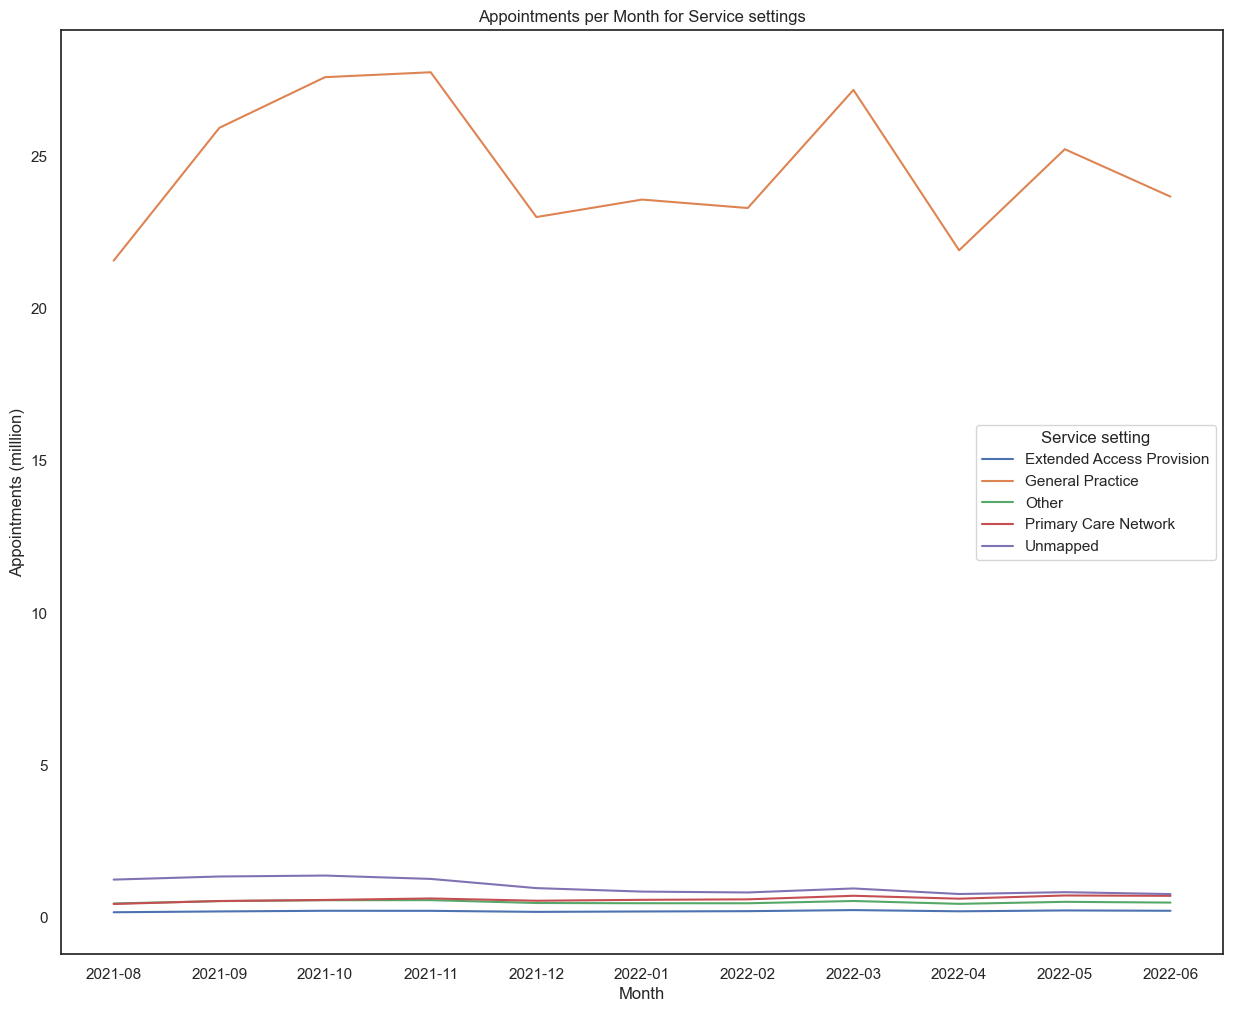

In [45]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot using count of appointments.
ncss = sns.lineplot(x='month', y='count', hue = 'service', data=nc_ss, errorbar=None)

# Set the title, labels, ticks and legend title
ncss.set_xlabel('Month')
ncss.set_ylabel('Appointments (milllion)')
ncss.set_title('Appointments per Month for Service settings')
plt.legend(title='Service setting')
plt.yticks([25e6, 20e6, 15e6, 10e6, 5e6, 0], ['25', '20', '15', '10', '5', '0'])

# Saving plot as PNG file
plt.savefig('line_plot1.png')

A line plot was created, mapping the data points for the service settings. In line with previous analysis, September, October, November, and March were the months with the largest count of appointments.

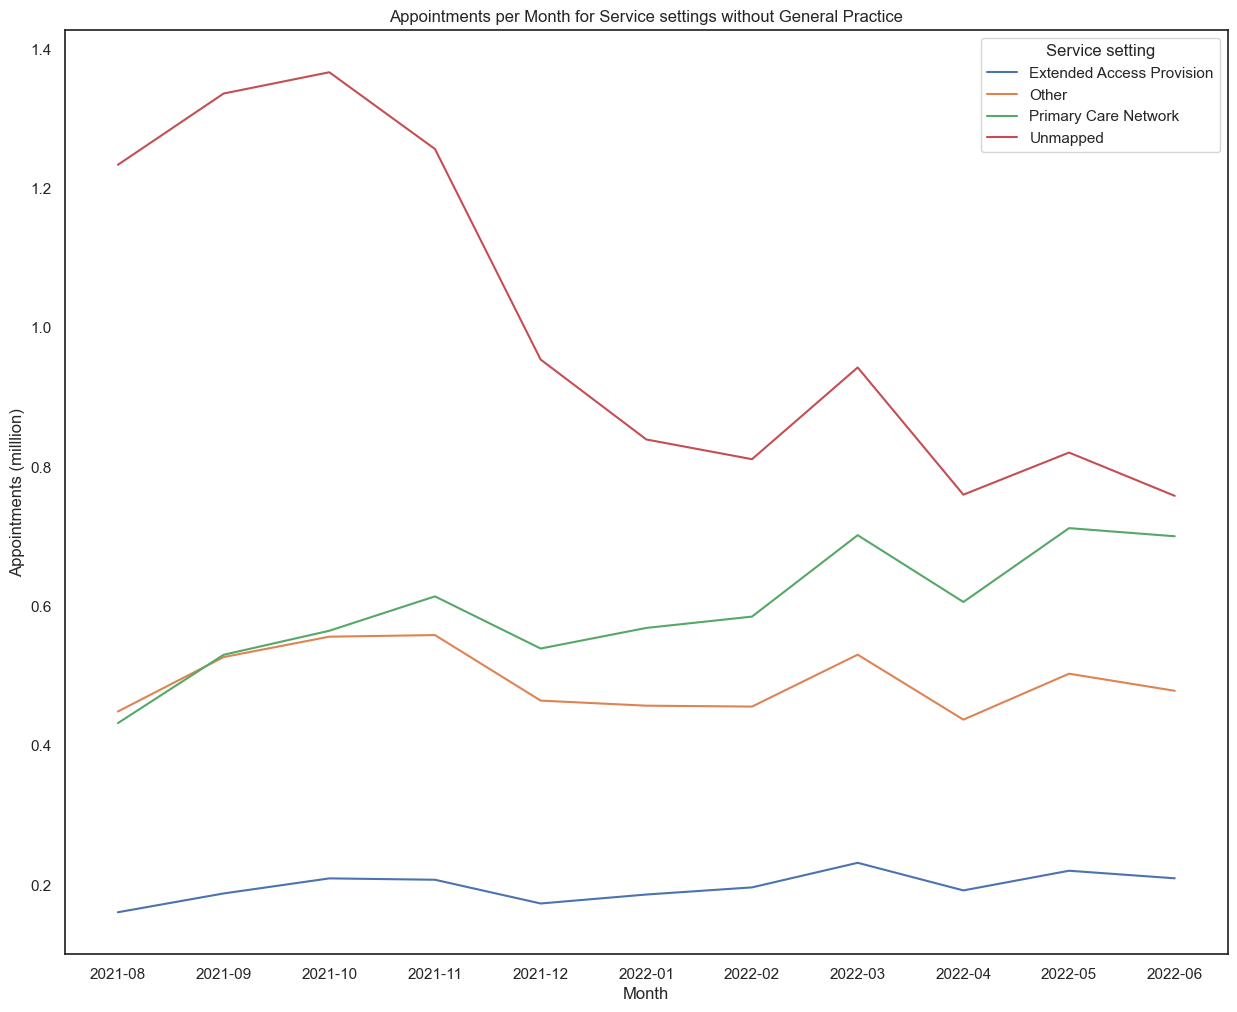

In [46]:
# Lineplot of appointments without general practice due to the large disparity between data
ncss2 = sns.lineplot(x = 'month', y = 'count', 
             data=nc_ss[nc_ss['service'].isin(['Other', 'Primary Care Network', 'Extended Access Provision', 'Unmapped'])],
             hue ='service', errorbar=None)

# Set the title, labels, ticks and legend title
ncss2.set_xlabel('Month')
ncss2.set_ylabel('Appointments (milllion)')
ncss2.set_title('Appointments per Month for Service settings without General Practice')
plt.legend(title='Service setting')
plt.yticks([1.4e6, 1.2e6, 1.0e6, 0.8e6, 0.6e6, 0.4e6, 0.2e6], ['1.4', '1.2', '1.0', '0.8', '0.6', '0.4', '0.2'])

# Saving plot as PNG file
plt.savefig('line_plot2.png')

Due to the large variance between remaining settings and General Practice, I was interested to see how they mapped out, as their data in the previous plot showed no insight. 
Interestingly, the Unmapped category correlates with the busy months, potentially displaying the strain on staff to collate the data correctly in busy times. However, along with this, there is a downward trend, so I am hopeful that this is something that may continue. 
But without data from a longer period, it's difficult to judge if that is the case or not. This highlights the point above about larger data sets and the potential for better analysis.

**Context types:**

In [47]:
# Create a separate data set that can be used in future weeks. 
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

# Rename the columns
nc_ct.columns = ['month', 'context', 'count']

# View the output.
nc_ct

,month,context,count
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135
5,2021-09,Unmapped,1336115
6,2021-10,Care Related Encounter,26125201
7,2021-10,Inconsistent Mapping,2811977
8,2021-10,Unmapped,1366656
9,2021-11,Care Related Encounter,26282778


<Axes: xlabel='context', ylabel='count'>

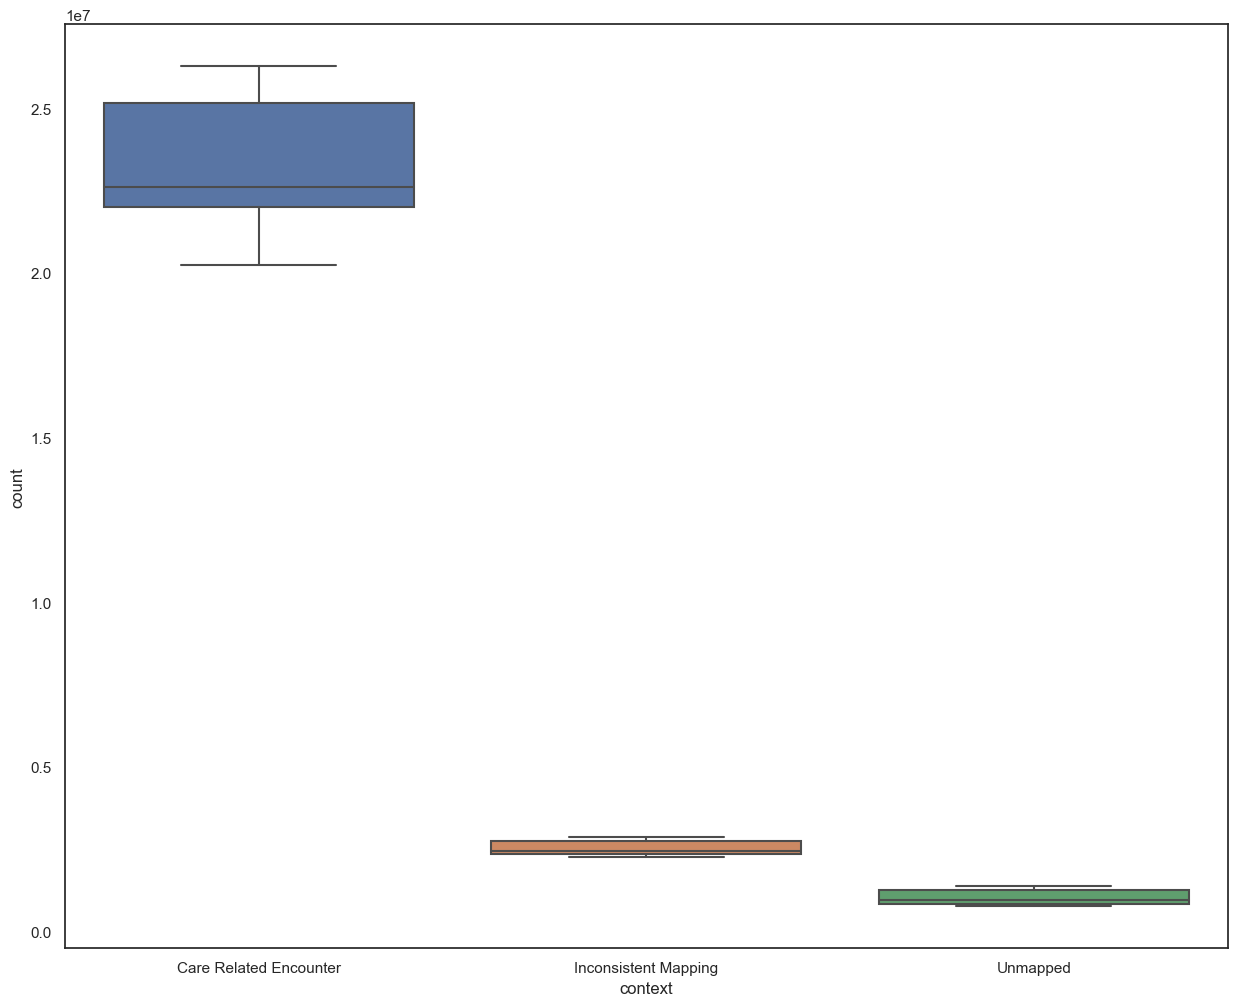

In [48]:
# Checking for outliers
sns.boxplot(x='context', y='count', data=nc_ct)

A dataframe was created, showing appointments per month for each context. The data was checked for outliers (of which there were none) to ensure data integrity, and from that process, Care Related Encounter could clearly be seen as the dominant context. To reiterate points above, it also highlighted data mapping issues.

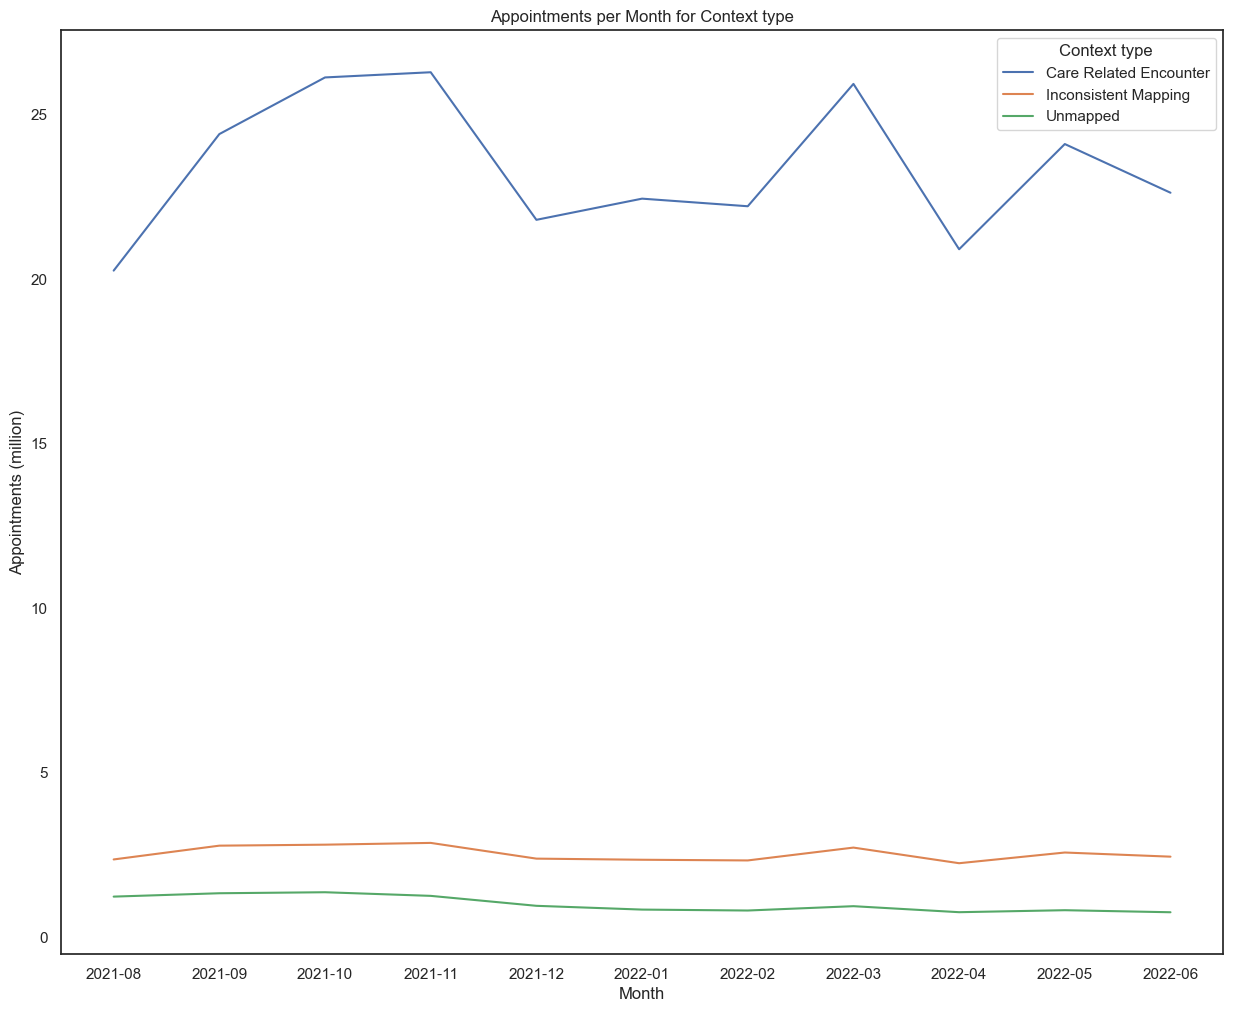

In [49]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot using count of appointments.
ncct = sns.lineplot(x='month', y='count', hue = 'context', data=nc_ct, errorbar=None)

# Set the title, labels, ticks and legend title
ncct.set_xlabel('Month')
ncct.set_ylabel('Appointments (million)')
ncct.set_title('Appointments per Month for Context type')
plt.legend(title='Context type')
plt.yticks([25e6, 20e6, 15e6, 10e6, 5e6, 0], ['25', '20', '15', '10', '5', '0'])

# Saving plot as PNG file
plt.savefig('line_plot3.png')

A similar pattern emerged for the context types with the busiest months being the same as the service setting

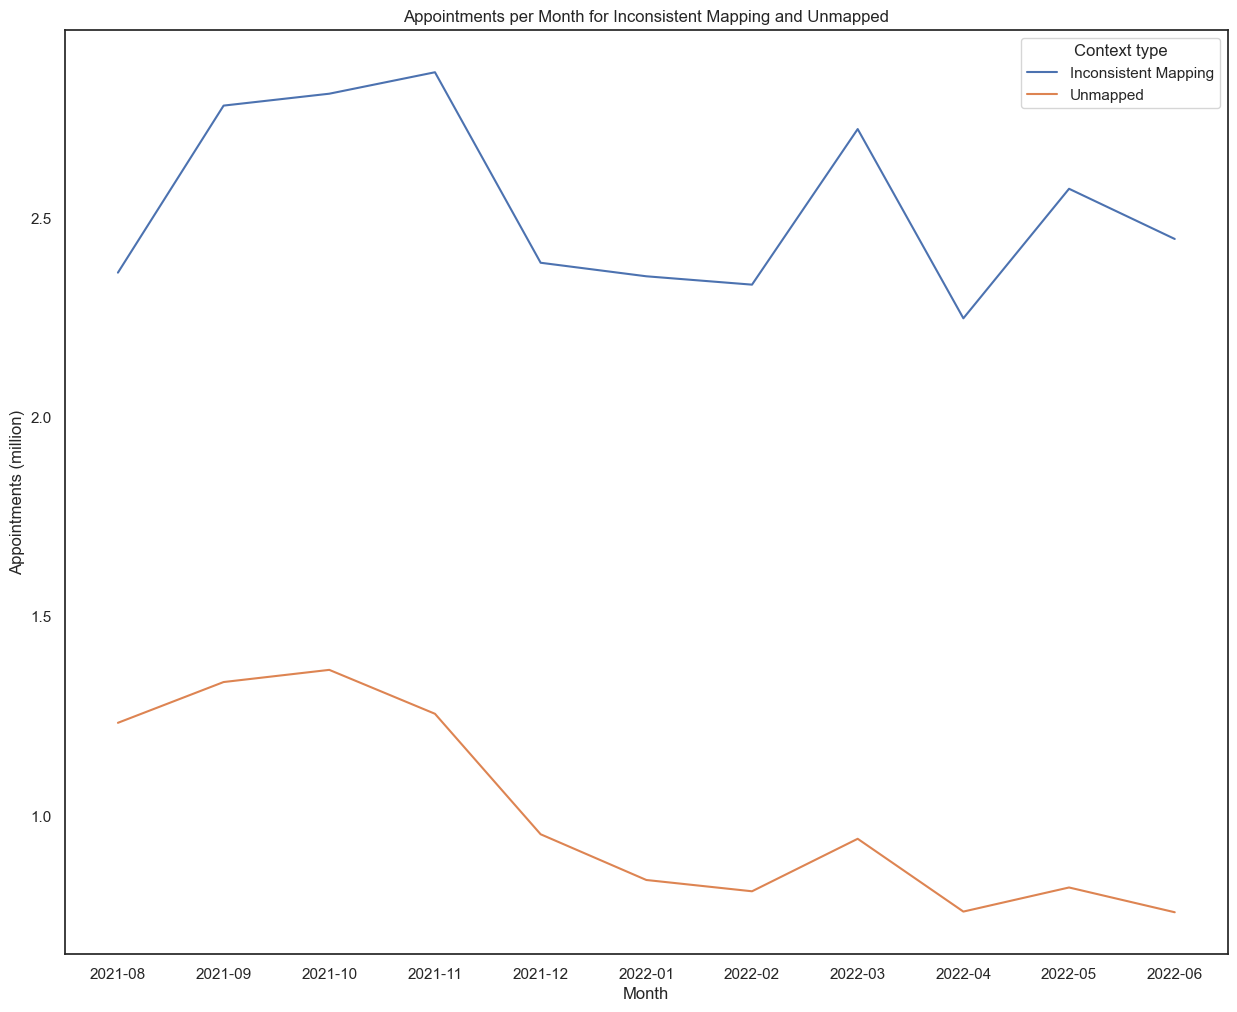

In [50]:
# Lineplot of appointments with only Inconsistent Mapping' and 'Unmapped' for better visualisation
ncct2 = sns.lineplot(x = 'month', y = 'count', 
             data=nc_ct[nc_ct['context'].isin(['Inconsistent Mapping', 'Unmapped'])],
             hue ='context', errorbar=None)

# Set the title, labels, ticks and legend title
ncct2.set_xlabel('Month')
ncct2.set_ylabel('Appointments (million)')
ncct2.set_title('Appointments per Month for Inconsistent Mapping and Unmapped')
plt.legend(title='Context type')
plt.yticks([2.5e6, 2.0e6, 1.5e6, 1.0e6], ['2.5', '2.0', '1.5', '1.0'])

# Saving plot as PNG file
plt.savefig('line_plot4.png')

A further plot was made to show the mapping issues separately for better definition, which again yielded similar outputs for the busiest months already observed. The Unmapped category does show a trend downwards, but with the small date range, as with the service setting, it's not clear if this trend will continue.

**National categories:**

In [51]:
# Create a separate data set that can be used in future weeks. 
nc_nc = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

# Rename the columns
nc_nc.columns = ['month', 'category', 'count']

# View the output.
nc_nc

,month,category,count
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045
...,...,...,...
193,2022-06,Social Prescribing Service,55066
194,2022-06,Structured Medication Review,187800
195,2022-06,Unmapped,758640
196,2022-06,Unplanned Clinical Activity,274491


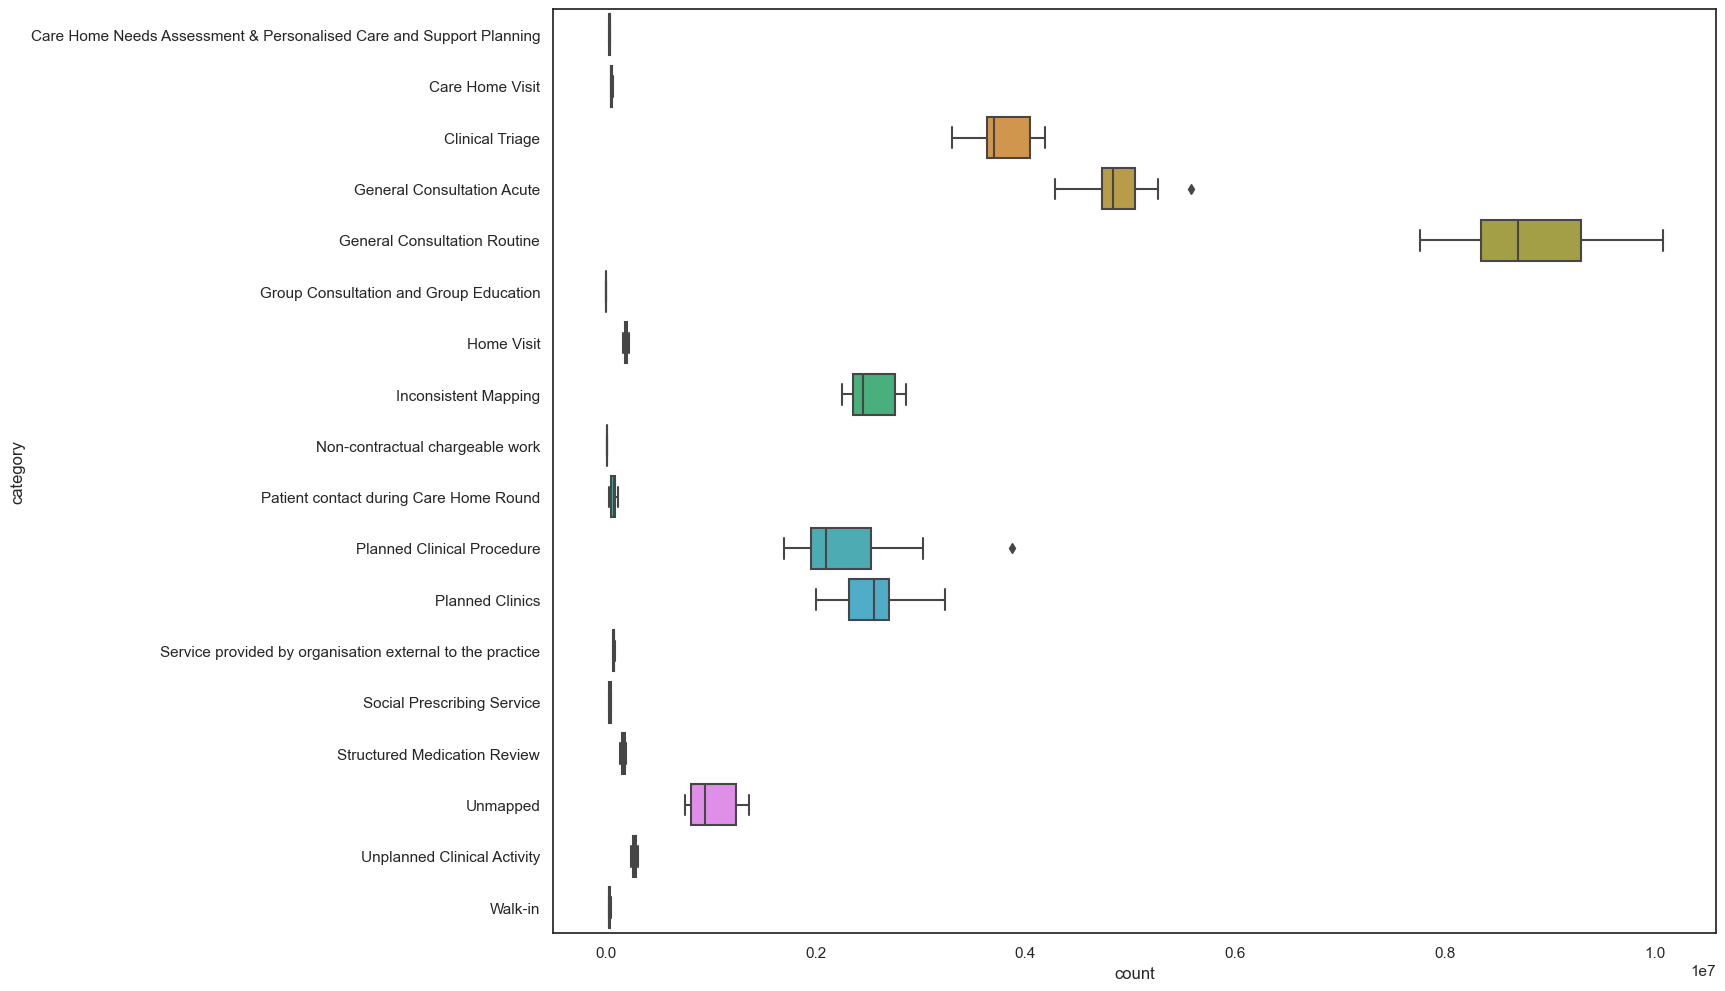

In [52]:
# Checking for outliers
sns.boxplot(x='count', y='category', data=nc_nc)

# Saving plot as PNG file
plt.savefig('box_plot1.png')

In [53]:
# Removing outliers
# The columns you want to search for outliers.
cols = ['count'] 

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = nc_nc[cols].quantile(0.25) 
Q3 = nc_nc[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a boolean array of the rows with (any) non-outlier column values.
condition = ~((nc_nc[cols] < (Q1 - 1.5 * IQR)) | (nc_nc[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our DataFrame based on condition.
nc_nc_out = nc_nc[condition]

# Check shape to see if outliers have been removed
nc_nc_out.shape

(187, 3)

A dataframe was created to show the national categories and the sum of the appointments over time. The data was checked for outliers, and as some were found, they were removed for a cleaner representation of the data.

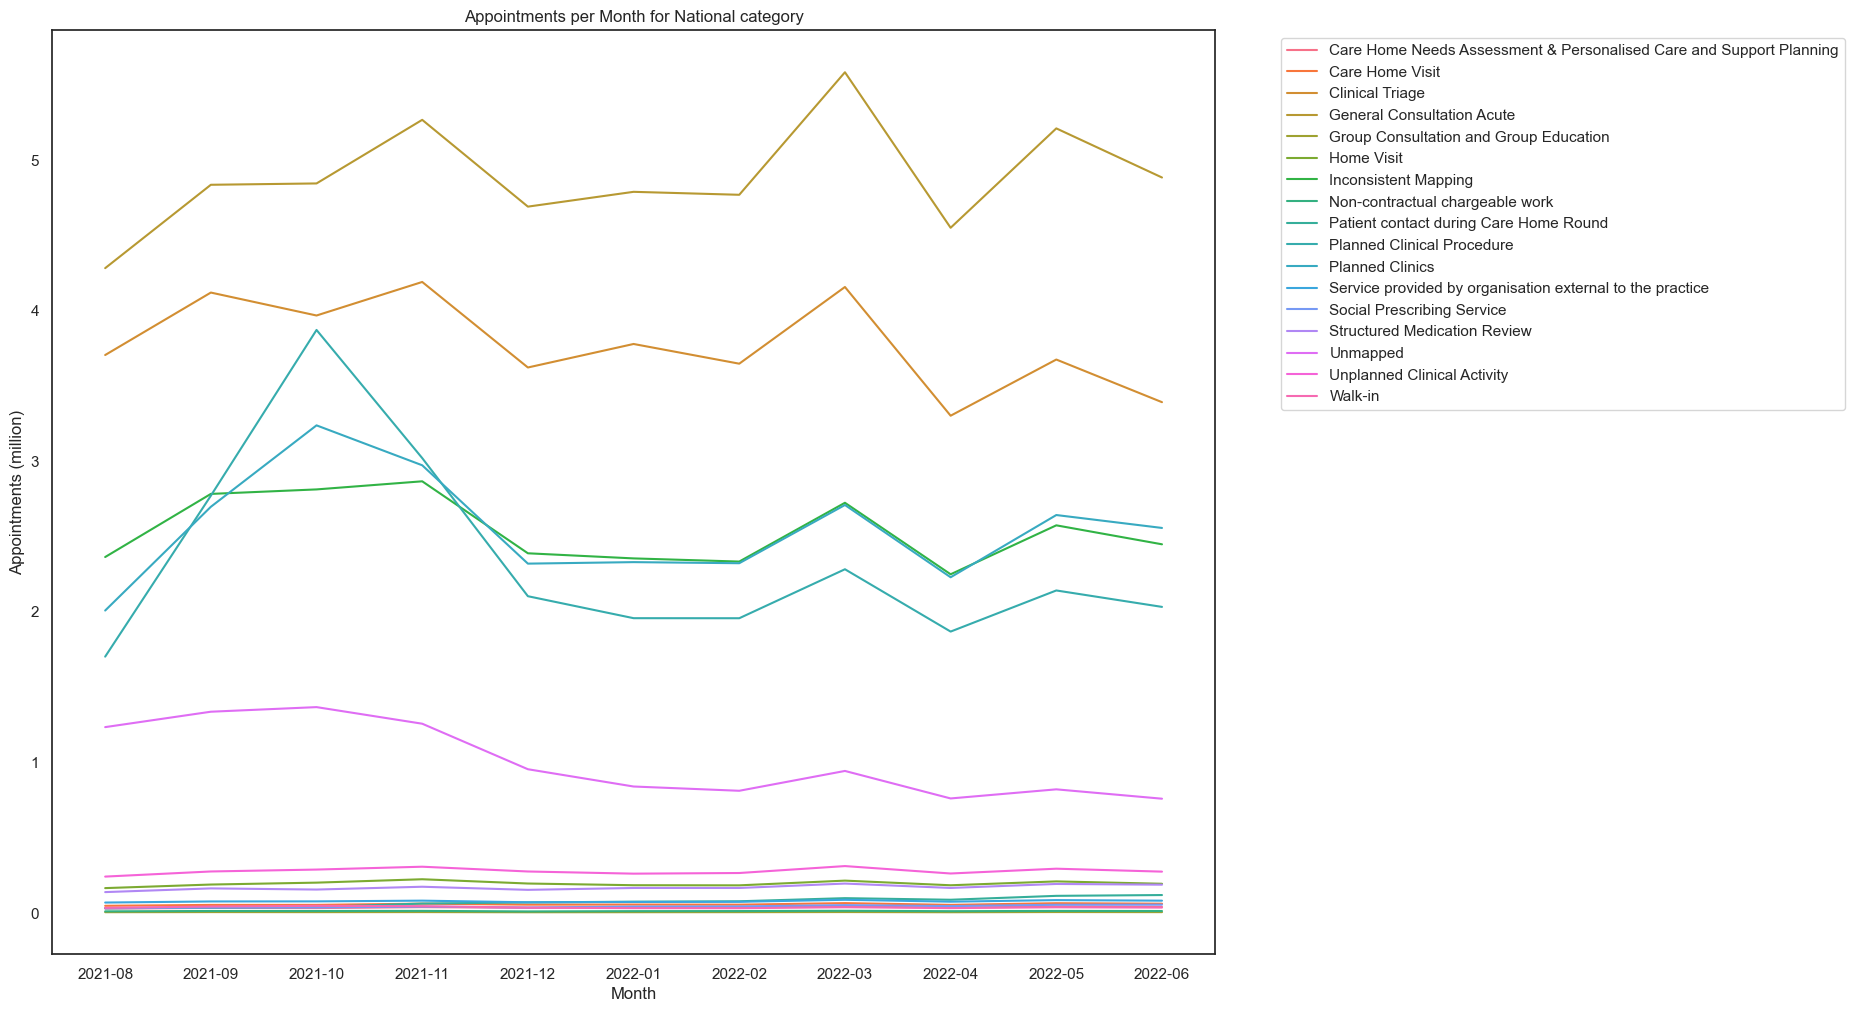

<Figure size 1500x1200 with 0 Axes>

In [54]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
ncnc = sns.lineplot(x='month', y='count', hue = 'category', data=nc_nc_out)

# Set the title, labels, ticks, legend title and location
ncnc.set_xlabel('Month')
ncnc.set_ylabel('Appointments (million)')
ncnc.set_title('Appointments per Month for National category')
plt.legend(title='National category')
plt.legend(bbox_to_anchor=(1.05, 1,))
plt.yticks([5e6, 4e6, 3e6, 2e6, 1e6, 0e6], ['5', '4', '3', '2', '1', '0'])

#Show output
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot5.png')

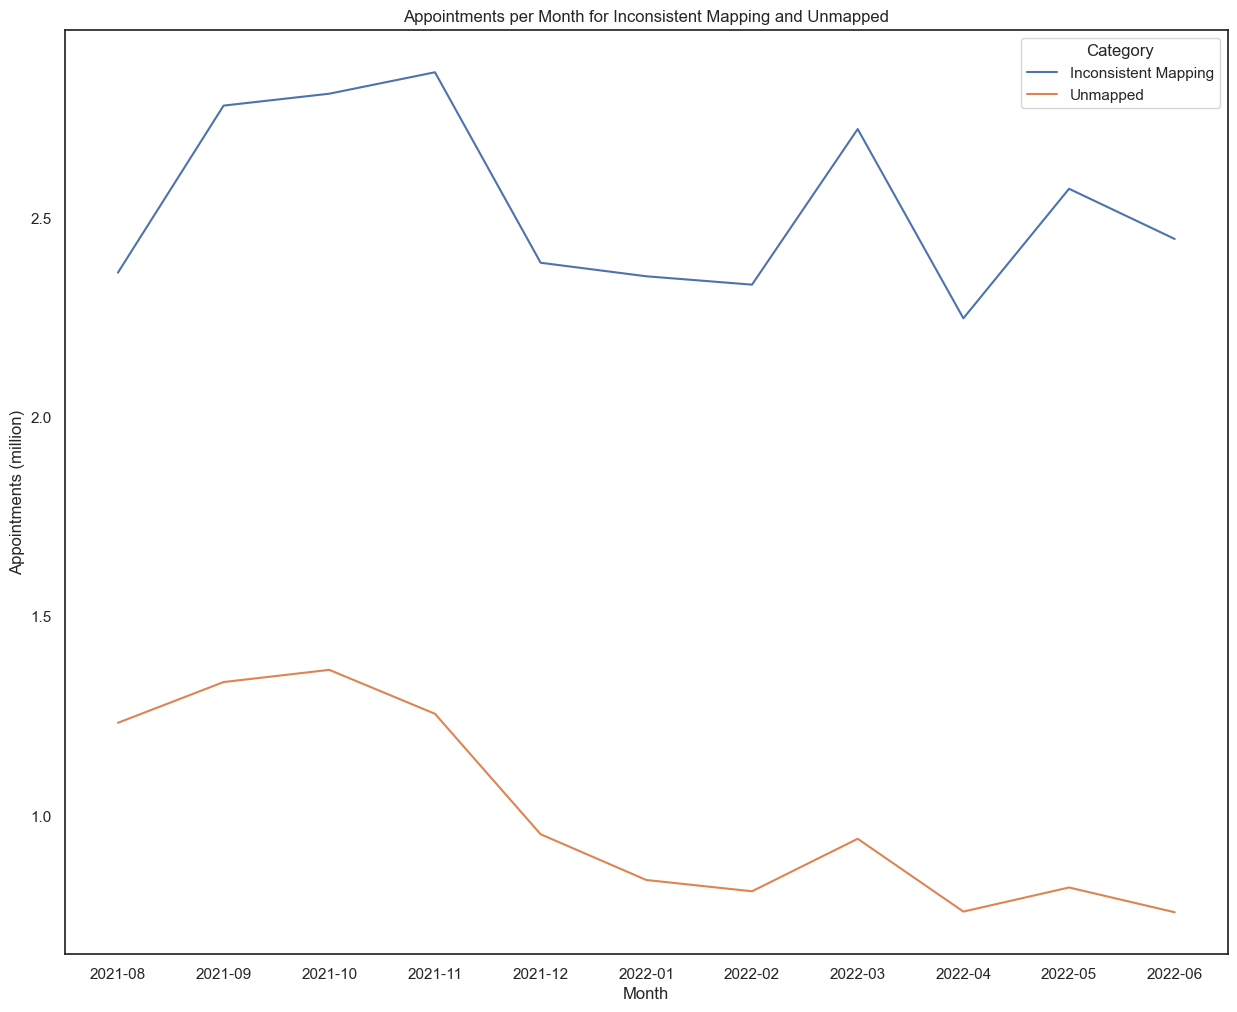

<Figure size 1500x1200 with 0 Axes>

In [55]:
ncnc2 = sns.lineplot(x='month', y='count', hue = 'category', 
                    data=nc_nc_out[nc_nc_out['category'].isin(['Unmapped', 'Inconsistent Mapping'])])

# Set the title, labels, ticks and legend title
ncnc2.set_xlabel('Month')
ncnc2.set_ylabel('Appointments (million)')
ncnc2.set_title('Appointments per Month for Inconsistent Mapping and Unmapped')
plt.legend(title='Category')
plt.yticks([2.5e6, 2.0e6, 1.5e6, 1.0e6], ['2.5', '2.0', '1.5', '1.0'])

#Show output
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot23.png')

March, October, and November stand out again in the top five categories as busier months, to varying degrees depending on which one you look at. With such a large number of categories, the lesser-represented categories don't show much deviation on this scale. However, due to their smaller data size, it's not of any great significance for this analysis other than Unmapped and Inconsistent Mapping levels, which reiterates the findings above for setting and context.

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season.

In [56]:
# Create a dataframe with the daily count of appointments for each service setting
nc_ss_day = nc.groupby(['appointment_date', 'appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Rename the columns
nc_ss_day.columns = ['date', 'month', 'service', 'count']

# Show the output
nc_ss_day.head(15)

,date,month,service,count
0,2021-08-01,2021-08,Extended Access Provision,438
1,2021-08-01,2021-08,General Practice,3411
2,2021-08-01,2021-08,Other,401
3,2021-08-01,2021-08,Primary Care Network,323
4,2021-08-01,2021-08,Unmapped,1054
5,2021-08-02,2021-08,Extended Access Provision,7705
6,2021-08-02,2021-08,General Practice,1108073
7,2021-08-02,2021-08,Other,22098
8,2021-08-02,2021-08,Primary Care Network,20016
9,2021-08-02,2021-08,Unmapped,64876


This analyisis provided more affirmation of the General Practice service setting being the largest by far on a daily basis. The lack of data for August 1st, 2021, is something that could be looked into. 
Although it's assumed that due to the data starting on this date, this is the logical reason for this occurrence. This would allude to no more historical data from before this time, which was a point of inquiry mentioned above.

In [57]:
# Create a separate data set that can be used in future weeks. 
# Create a separate data set for each season
# Define the seasons
seasons = {'Summer': ['06', '07', '08'],
           'Autumn': ['09', '10', '11'],
           'Winter': ['12', '01', '02'],
           'Spring': ['03', '04', '05']}

# Create a new column 'season' based on the appointment_month column
nc_ss['season'] = np.select([nc_ss['month'].str[5:7].isin(seasons['Summer']),
                             nc_ss['month'].str[5:7].isin(seasons['Autumn']),
                             nc_ss['month'].str[5:7].isin(seasons['Winter']),
                             nc_ss['month'].str[5:7].isin(seasons['Spring'])],
                            ['Summer', 'Autumn', 'Winter', 'Spring'])

# Display the result
nc_ss

,month,service,count,season
0,2021-08,Extended Access Provision,160927,Summer
1,2021-08,General Practice,21575852,Summer
2,2021-08,Other,449101,Summer
3,2021-08,Primary Care Network,432448,Summer
4,2021-08,Unmapped,1233843,Summer
5,2021-09,Extended Access Provision,187906,Autumn
6,2021-09,General Practice,25940821,Autumn
7,2021-09,Other,527174,Autumn
8,2021-09,Primary Care Network,530485,Autumn
9,2021-09,Unmapped,1336115,Autumn


A new dataframe was created with a column categorizing the month into the relevant season.

**Summer:**


In [58]:
# Create a separate data set for each season
nc_summer = nc_ss[nc_ss['season'] == 'Summer']

# View output 
nc_summer

,month,service,count,season
0,2021-08,Extended Access Provision,160927,Summer
1,2021-08,General Practice,21575852,Summer
2,2021-08,Other,449101,Summer
3,2021-08,Primary Care Network,432448,Summer
4,2021-08,Unmapped,1233843,Summer
50,2022-06,Extended Access Provision,209652,Summer
51,2022-06,General Practice,23680374,Summer
52,2022-06,Other,478813,Summer
53,2022-06,Primary Care Network,700599,Summer
54,2022-06,Unmapped,758640,Summer


<Axes: xlabel='count', ylabel='service'>

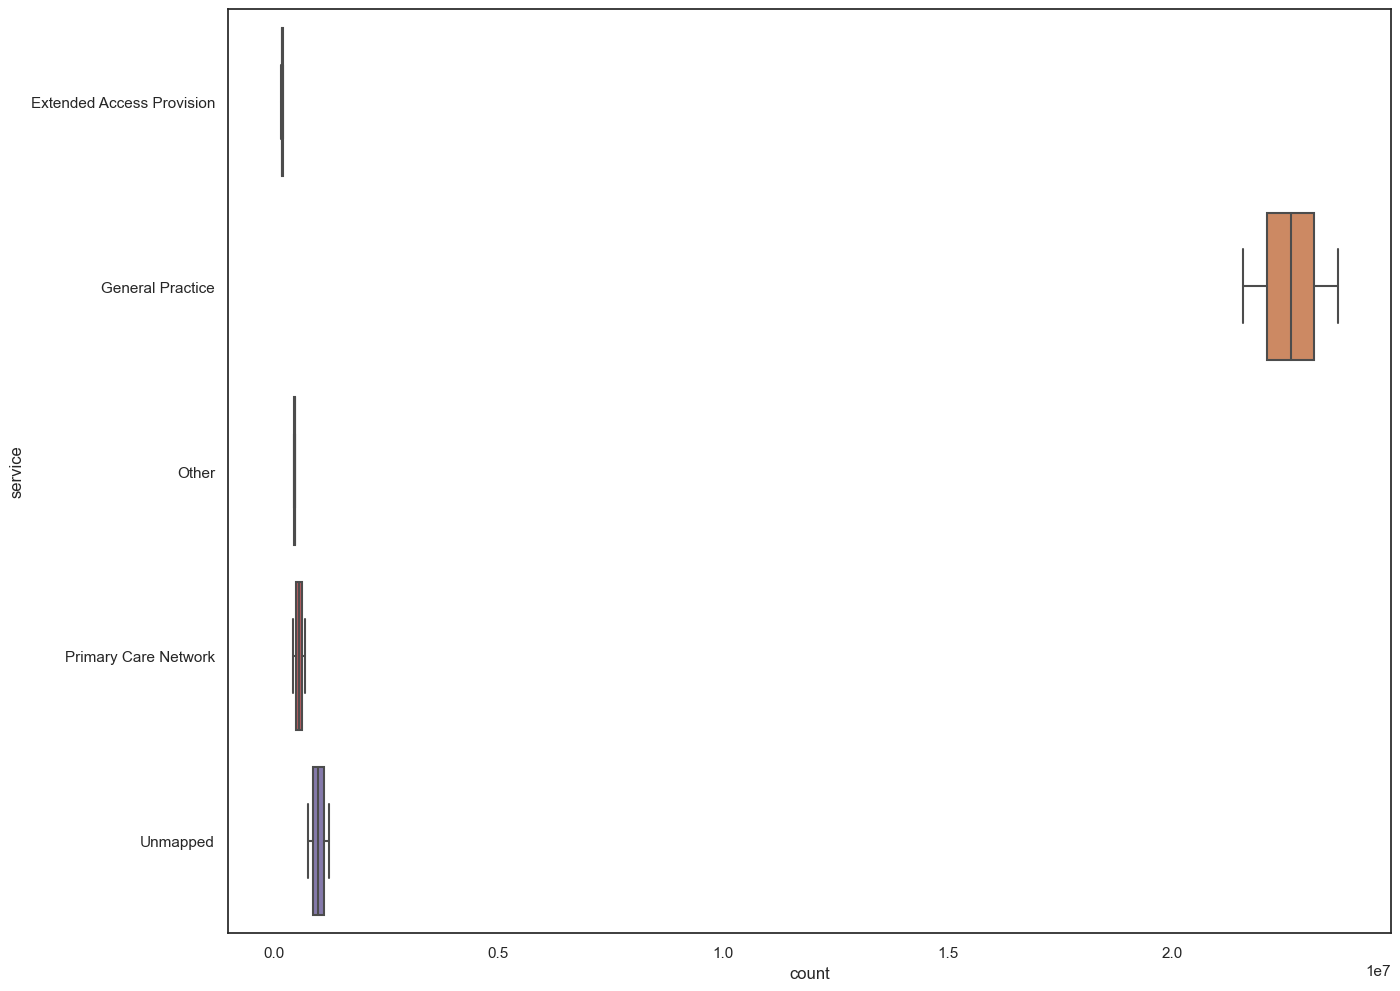

In [59]:
# Checking for outliers
sns.boxplot(x='count', y='service', data=nc_summer)

The Summer data was collated and checked for outliers (of which there were none).

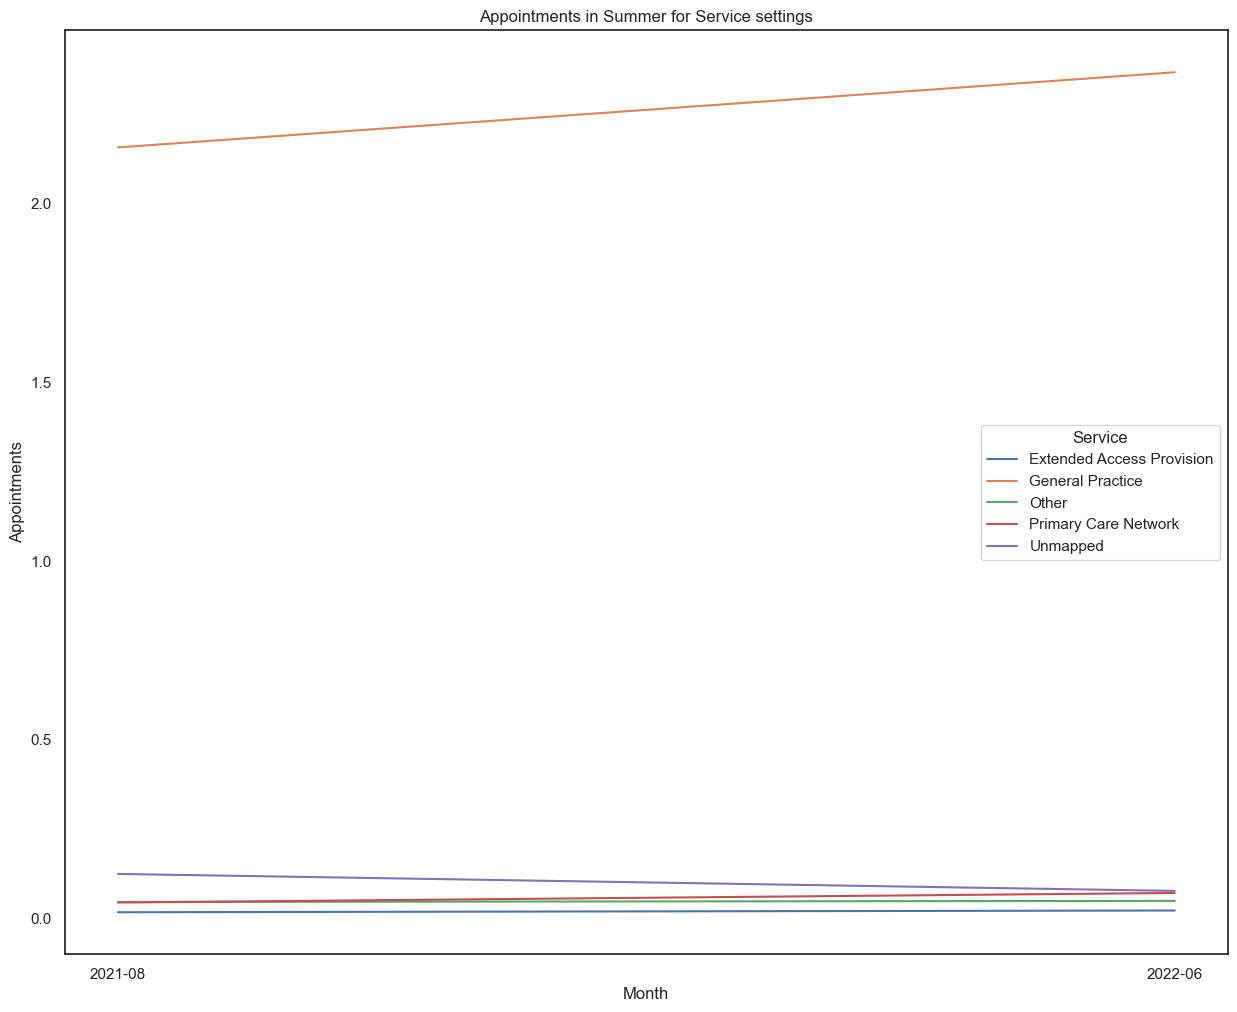

<Figure size 1500x1200 with 0 Axes>

In [60]:
# Visualise the subset using a lineplot.
nc_sum = sns.lineplot(x='month', y='count', hue = 'service', data=nc_summer, errorbar=None)

# Set the title, labels, ticks and legend title
nc_sum.set_xlabel('Month')
nc_sum.set_ylabel('Appointments')
nc_sum.set_title('Appointments in Summer for Service settings')
plt.legend(title='Service')
plt.yticks([2.0e7, 1.5e7, 1.0e7, 0.5e7, 0.0e7], ['2.0', '1.5', '1.0', '0.5', '0.0'])

# Show lineplot
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot6.png')

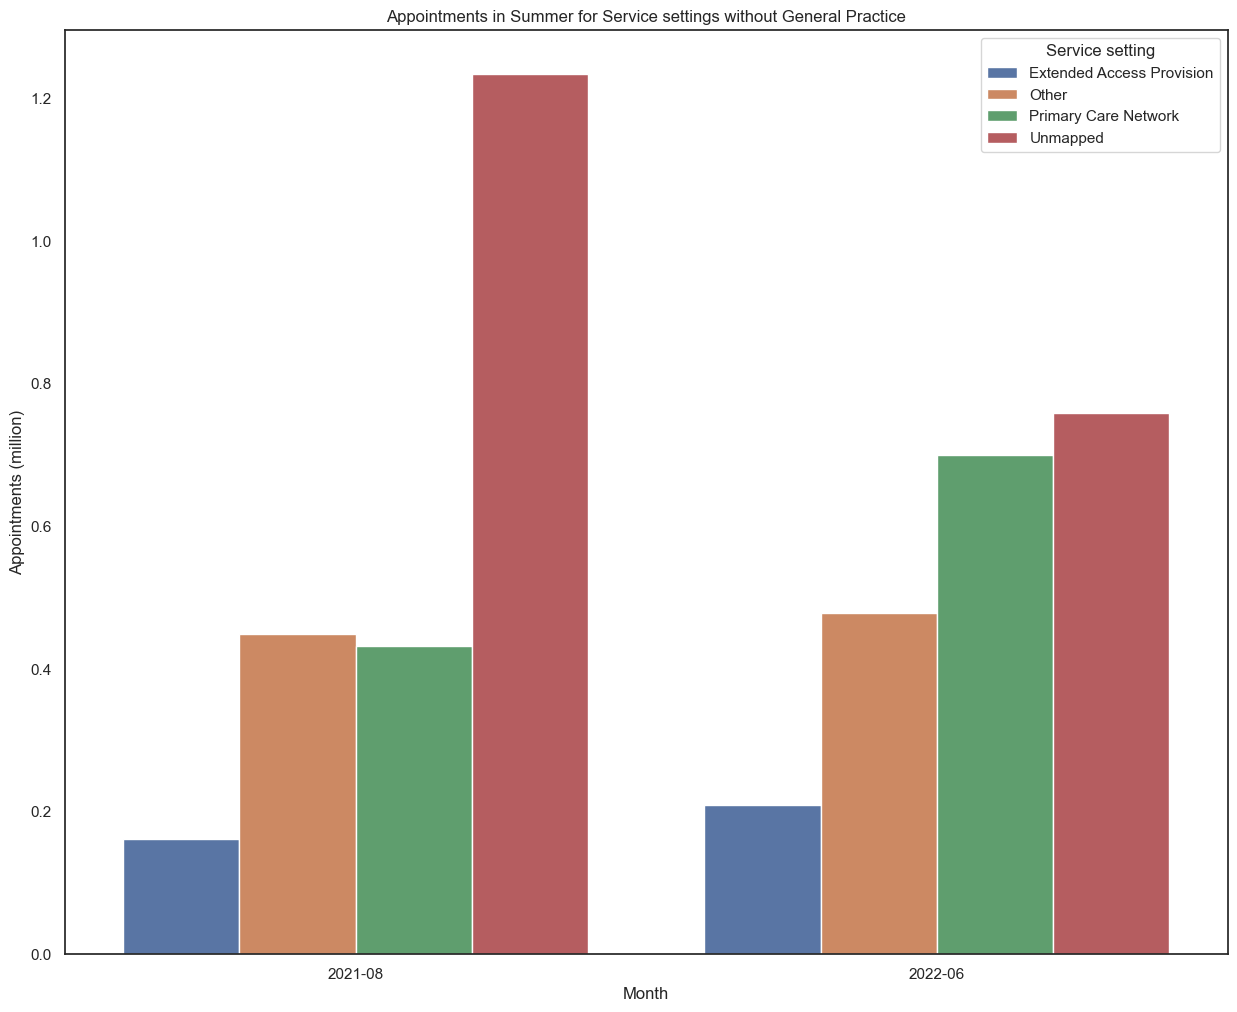

<Figure size 1500x1200 with 0 Axes>

In [61]:
# Barplot of appointments in summer without general practice
nc_sum2 = sns.barplot(x = 'month', y = 'count', 
             data=nc_summer[nc_summer['service'].isin(['Other',
               'Primary Care Network', 'Extended Access Provision', 'Unmapped'])], hue ='service', errorbar=None)

# Set the title, labels, ticks and legend title
nc_sum2.set_xlabel('Month')
nc_sum2.set_ylabel('Appointments (million)')
nc_sum2.set_title('Appointments in Summer for Service settings without General Practice')
plt.legend(title='Service setting')
plt.yticks([1.2e6, 1.0e6, 0.8e6, 0.6e6, 0.4e6, 0.2e6, 0.0e6], ['1.2', '1.0', '0.8', '0.6', '0.4', '0.2', '0.0'])

# Show barplot
plt.show()

# Saving plot as PNG file
plt.savefig('bar_plot1.png')

A line plot was created to display the appointments for each service setting in Summer. With only two months of data available and General Practice being dominant, a bar graph was generated to show the data excluding GP. 
This revealed that August has a significantly larger amount of unmapped data compared to June. Is this due to school holidays? This is an area that should be added to the 'investigation' from the above analysis.

**Autumn:**

In [62]:
# Create a separate data set that can be used in future weeks. 
nc_autumn = nc_ss[nc_ss['season'] == 'Autumn']
# View the output.
nc_autumn

,month,service,count,season
5,2021-09,Extended Access Provision,187906,Autumn
6,2021-09,General Practice,25940821,Autumn
7,2021-09,Other,527174,Autumn
8,2021-09,Primary Care Network,530485,Autumn
9,2021-09,Unmapped,1336115,Autumn
10,2021-10,Extended Access Provision,209539,Autumn
11,2021-10,General Practice,27606171,Autumn
12,2021-10,Other,556487,Autumn
13,2021-10,Primary Care Network,564981,Autumn
14,2021-10,Unmapped,1366656,Autumn


<Axes: xlabel='count', ylabel='service'>

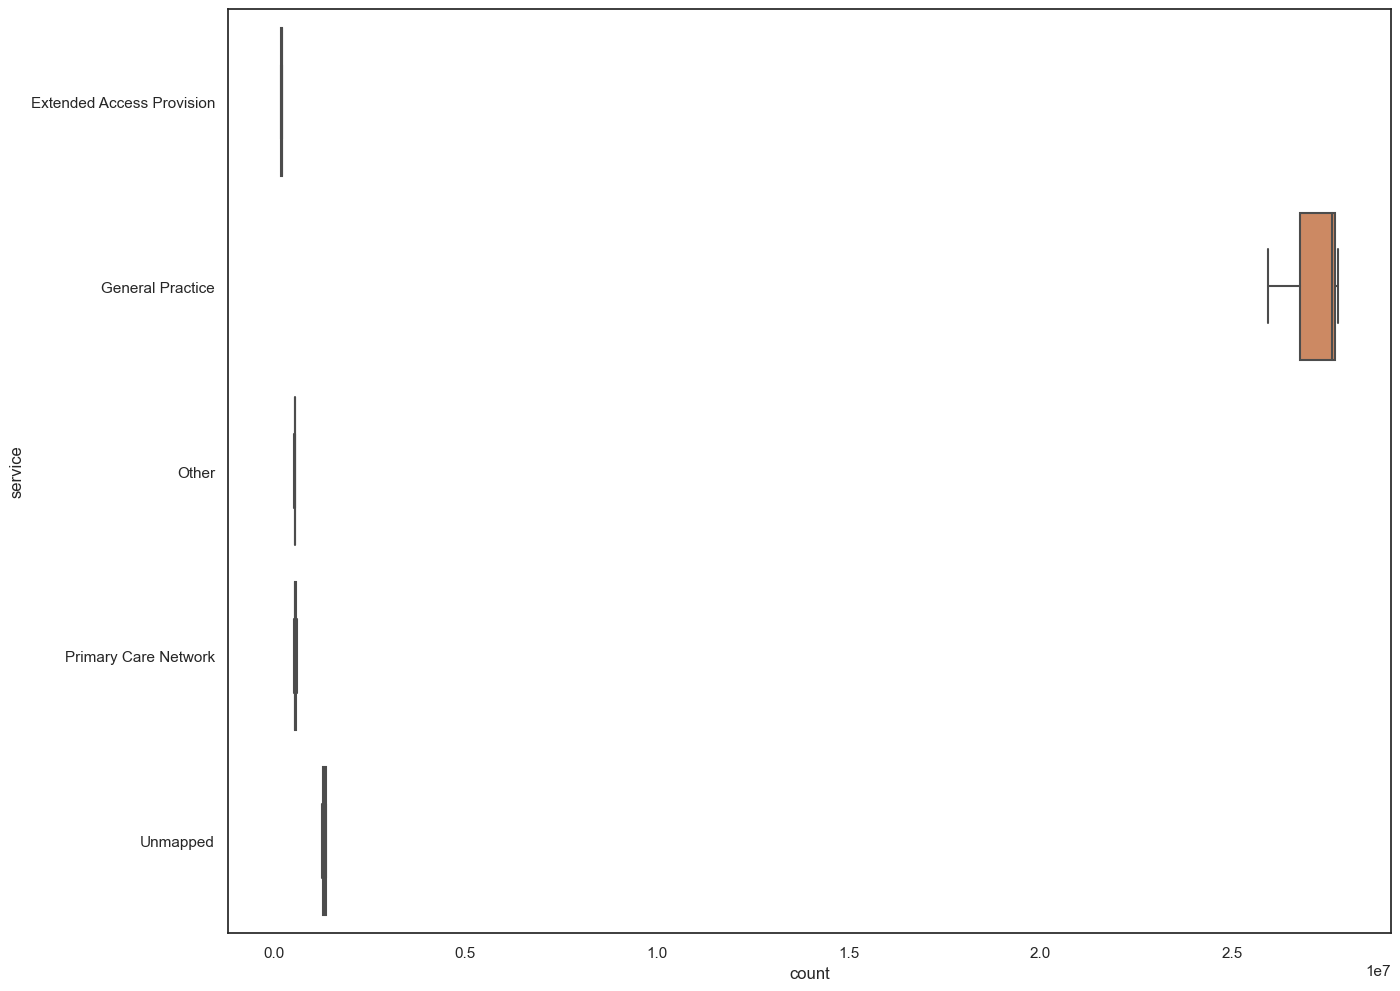

In [63]:
# Checking for outliers
sns.boxplot(x='count', y='service', data=nc_autumn)

The Autumn data was collated and checked for outliers (of which there were none).

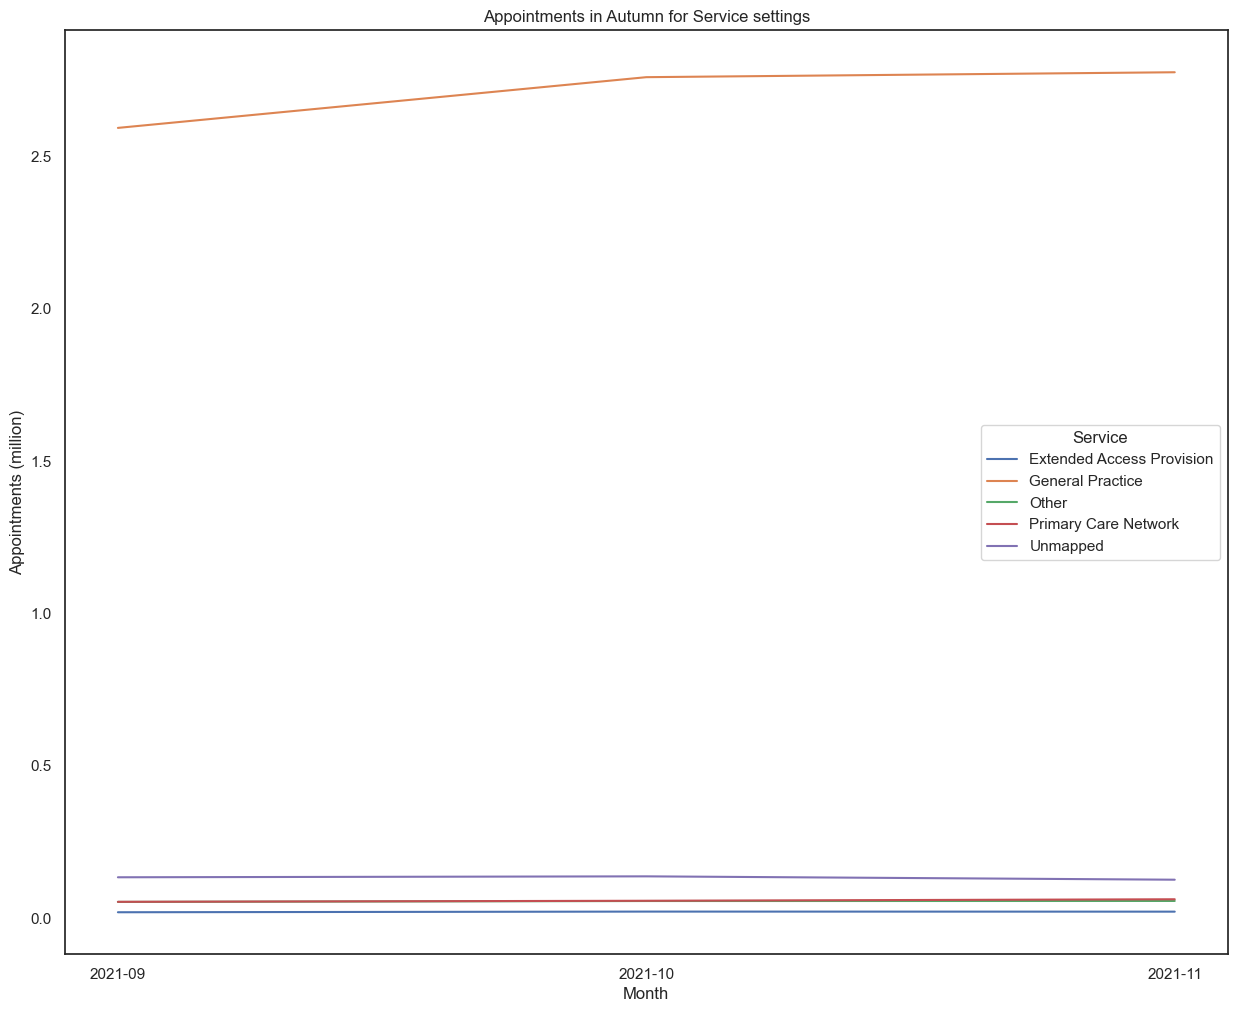

<Figure size 1500x1200 with 0 Axes>

In [64]:
# Visualise the subset using a lineplot.
nc_aut = sns.lineplot(x='month', y='count', hue = 'service', data=nc_autumn, errorbar=None)

# Set the title, labels, ticks and legend title
nc_aut.set_xlabel('Month')
nc_aut.set_ylabel('Appointments (million)')
nc_aut.set_title('Appointments in Autumn for Service settings')
plt.legend(title='Service')
plt.yticks([2.5e7, 2.0e7, 1.5e7, 1.0e7, 0.5e7, 0.0e7], ['2.5', '2.0', '1.5', '1.0', '0.5', '0.0'])

# Show lineplot
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot7.png')

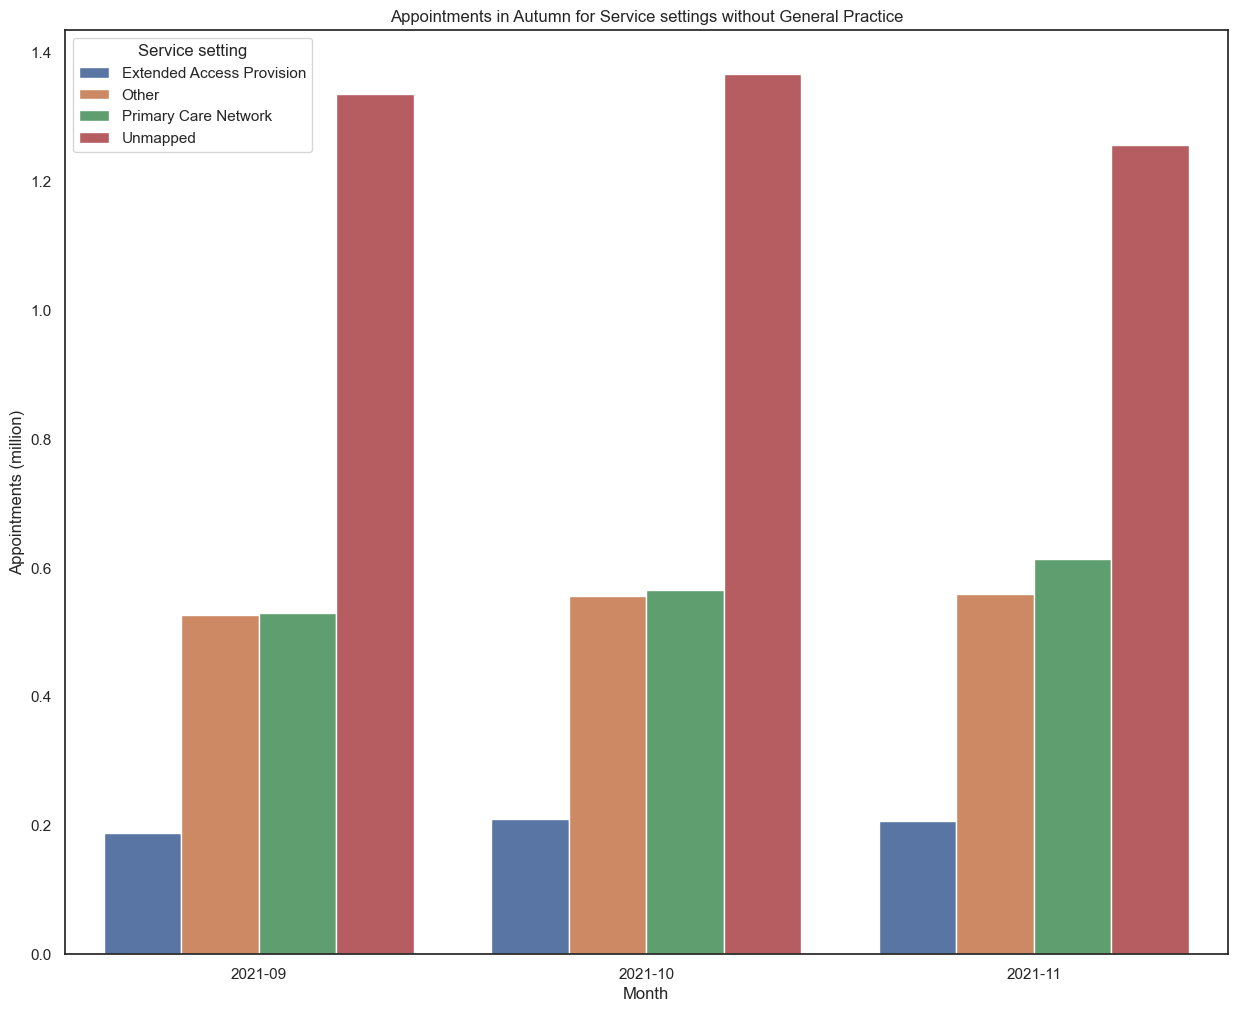

<Figure size 1500x1200 with 0 Axes>

In [65]:
# Barplot of appointments in summer without general practice
nc_aut2 = sns.barplot(x = 'month', y = 'count', 
             data=nc_autumn[nc_autumn['service'].isin(['Other', 'Primary Care Network',
                'Extended Access Provision', 'Unmapped'])], hue ='service', errorbar=None)

# Set the title, labels, ticks and legend title
nc_aut2.set_xlabel('Month')
nc_aut2.set_ylabel('Appointments (million)')
nc_aut2.set_title('Appointments in Autumn for Service settings without General Practice')
plt.legend(title='Service setting')
plt.yticks([1.4e6, 1.2e6, 1.0e6, 0.8e6, 0.6e6, 0.4e6, 0.2e6, 0.0e6], ['1.4', '1.2', '1.0', '0.8', '0.6', '0.4', '0.2', '0.0'])

# Show barplot
plt.show()

# Saving plot as PNG file
plt.savefig('bar_plot2.png')

A line plot was created to display the appointments for each service setting in Autumn. It clearly showed the rise in appointments for October and November. With only three months of data available and General Practice being dominant, a bar graph was generated to show the data excluding GP. 
This revealed fewer concerns compared to Summer but did outline that even though November is a busier month, the Unmapped appointments were actually lower than October, which bodes well for potentially improving the mapping accuracy. This should be included in the 'investigation' to find out the reasons for such improved mapping and whether these factors can be implemented to enhance it in the future.

**Winter:**

In [66]:
# Create a separate data set that can be used in future weeks. 
nc_winter = nc_ss[nc_ss['season'] == 'Winter']

# View the output.
nc_winter

,month,service,count,season
20,2021-12,Extended Access Provision,173504,Winter
21,2021-12,General Practice,23008818,Winter
22,2021-12,Other,464718,Winter
23,2021-12,Primary Care Network,539479,Winter
24,2021-12,Unmapped,954257,Winter
25,2022-01,Extended Access Provision,186375,Winter
26,2022-01,General Practice,23583053,Winter
27,2022-01,Other,457440,Winter
28,2022-01,Primary Care Network,569044,Winter
29,2022-01,Unmapped,839562,Winter


<Axes: xlabel='count', ylabel='service'>

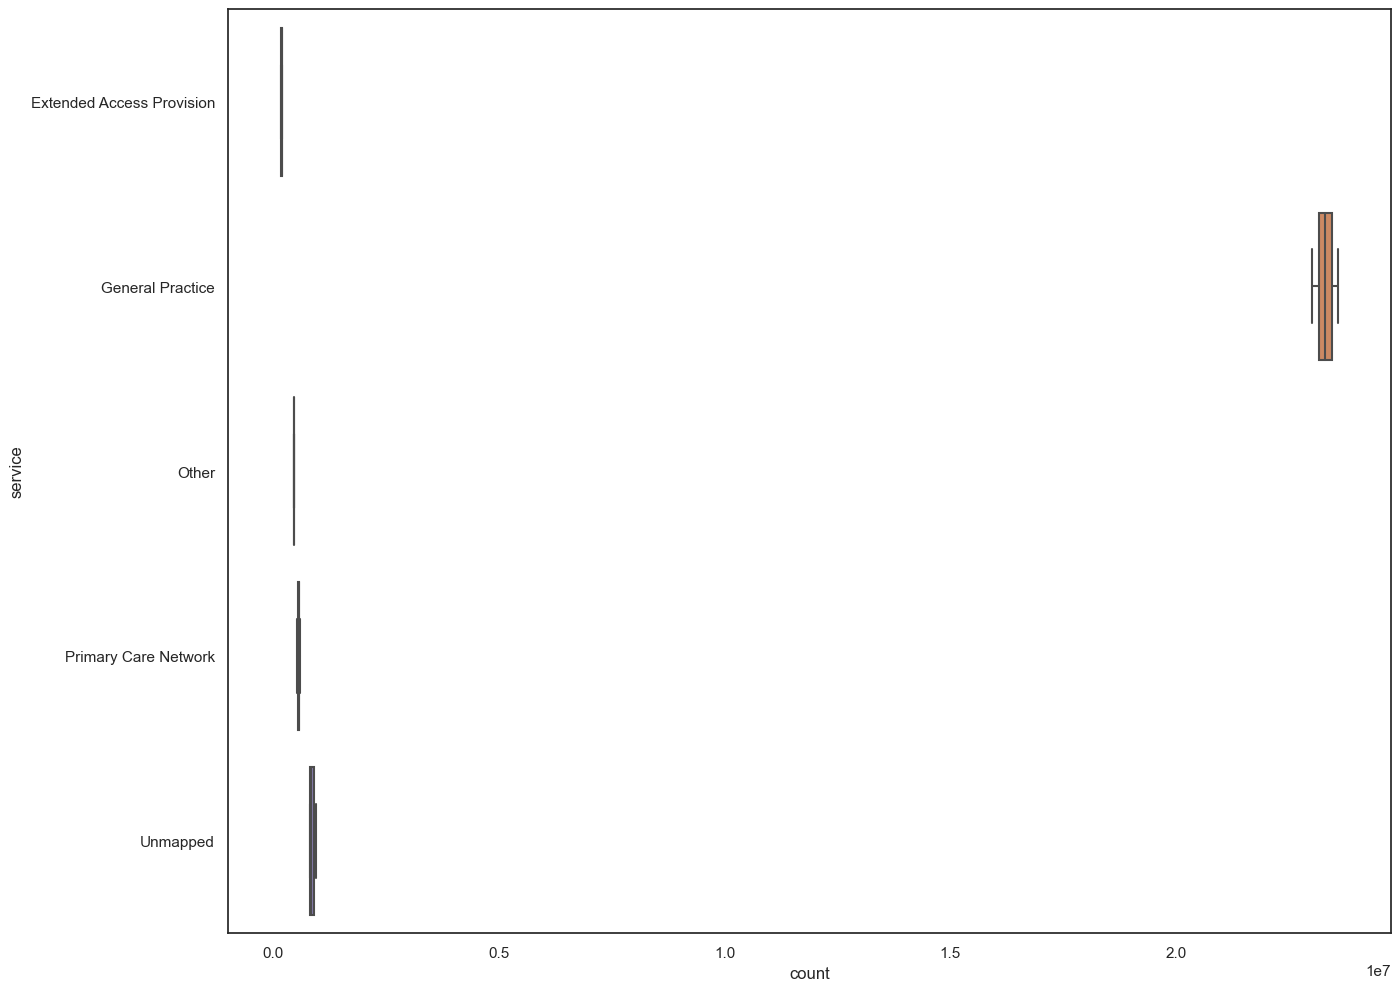

In [67]:
# Checking for outliers
sns.boxplot(x='count', y='service', data=nc_winter)

The Winter data was collated and checked for outliers (of which there were none).

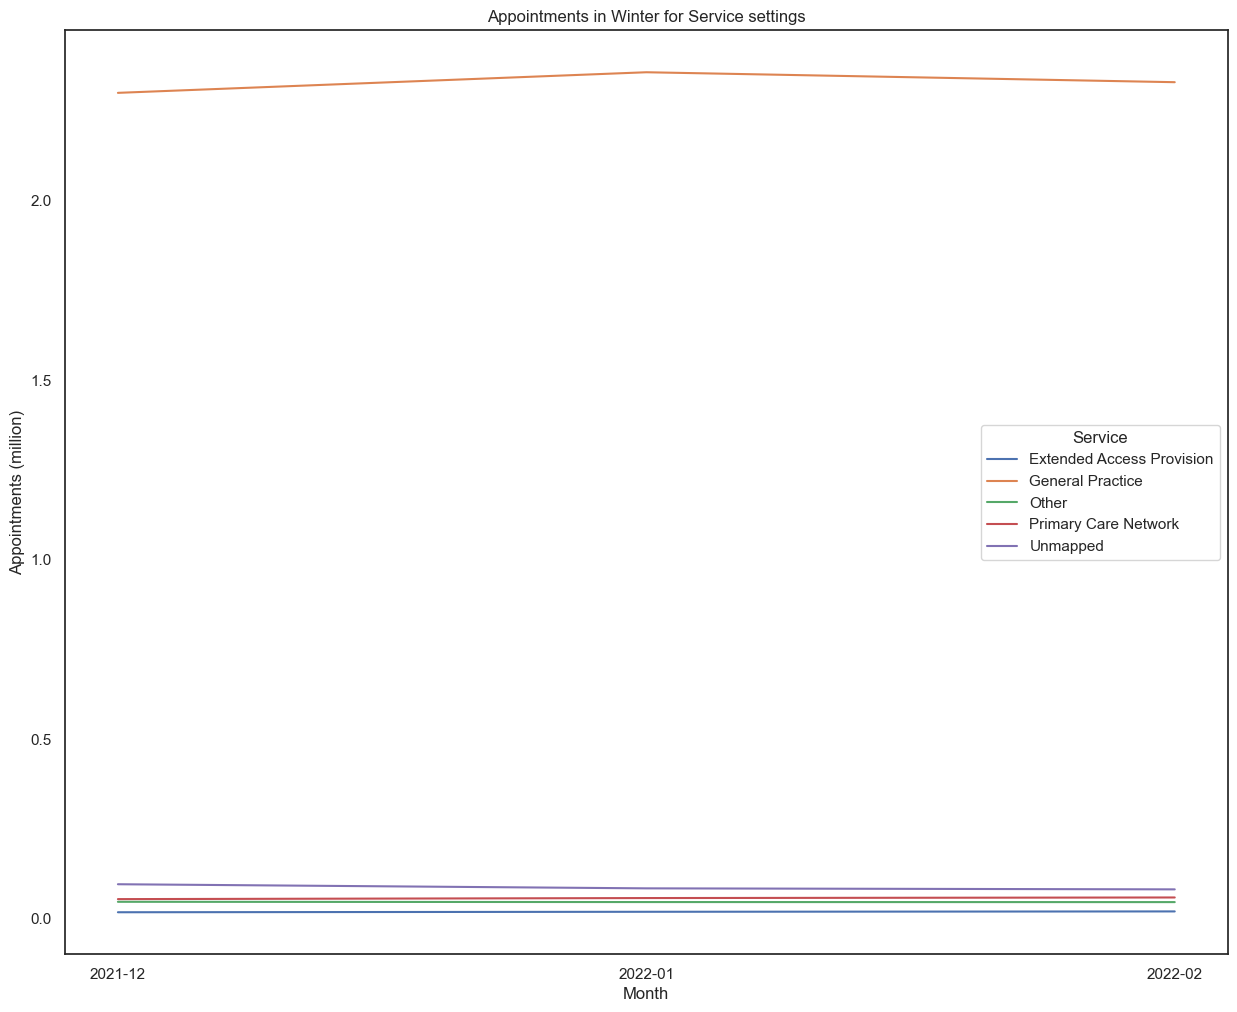

<Figure size 1500x1200 with 0 Axes>

In [68]:
# Visualise the subset using a lineplot.
nc_win = sns.lineplot(x='month', y='count', hue = 'service', data=nc_winter, errorbar=None)

# Set the title, labels, ticks and legend title
nc_win.set_xlabel('Month')
nc_win.set_ylabel('Appointments (million)')
nc_win.set_title('Appointments in Winter for Service settings')
plt.legend(title='Service')
plt.yticks([2.0e7, 1.5e7, 1.0e7, 0.5e7, 0.0e7], ['2.0', '1.5', '1.0', '0.5', '0.0'])

# Show lineplot
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot8.png')

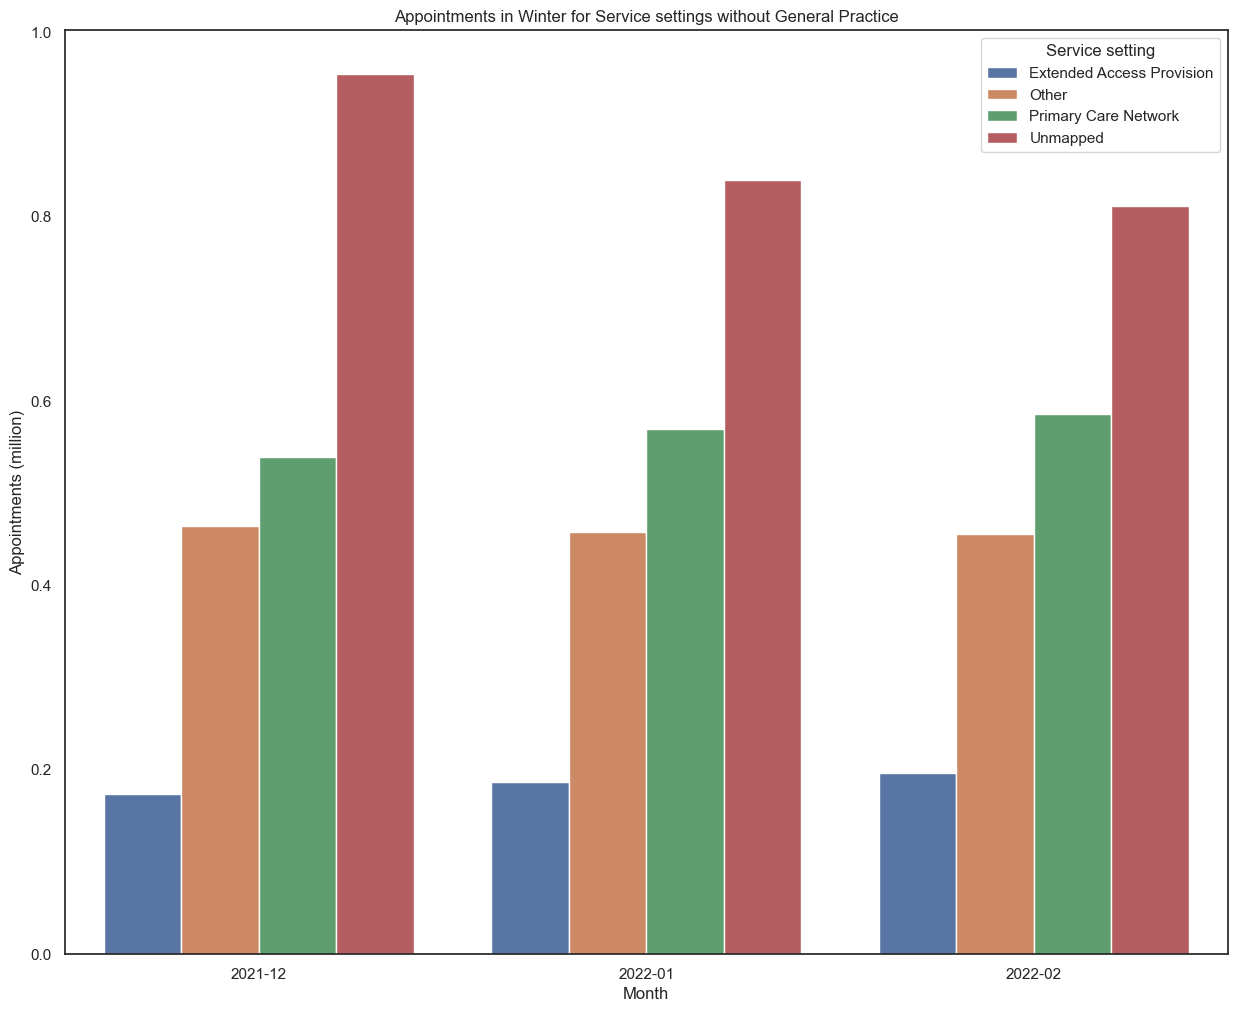

<Figure size 1500x1200 with 0 Axes>

In [69]:
# Barplot of appointments in winter without general practice
nc_win2 = sns.barplot(x = 'month', y = 'count', 
             data=nc_winter[nc_winter['service'].isin(['Other', 'Primary Care Network',
                'Extended Access Provision', 'Unmapped'])], hue ='service', errorbar=None)

# Set the title, labels, ticks and legend title
nc_win2.set_xlabel('Month')
nc_win2.set_ylabel('Appointments (million)')
nc_win2.set_title('Appointments in Winter for Service settings without General Practice')
plt.legend(title='Service setting')
plt.yticks([1.0e6, 0.8e6, 0.6e6, 0.4e6, 0.2e6, 0.0e6], ['1.0', '0.8', '0.6', '0.4', '0.2', '0.0'])

# Show barplot
plt.show()

# Saving plot as PNG file
plt.savefig('bar_plot3.png')

A line plot was created to display the appointments for each service setting in Winter. With only three months of data available and General Practice being dominant, a bar graph was generated to show the data excluding GP. 
This reveals a larger than expected result in Unmapped appointments for December, even though the month isn't the busiest of the season. As with Summer, it makes me wonder if Christmas holidays are the reason for this happening and should be included in the 'investigation' along with question on Summer mapping.

**Spring:**

In [70]:
# Create a separate data set that can be used in future weeks. 
nc_spring = nc_ss[nc_ss['season'] == 'Spring']

# View the output.
nc_spring

,month,service,count,season
35,2022-03,Extended Access Provision,231905,Spring
36,2022-03,General Practice,27187368,Spring
37,2022-03,Other,530677,Spring
38,2022-03,Primary Care Network,702176,Spring
39,2022-03,Unmapped,942912,Spring
40,2022-04,Extended Access Provision,192284,Spring
41,2022-04,General Practice,21916791,Spring
42,2022-04,Other,437402,Spring
43,2022-04,Primary Care Network,606270,Spring
44,2022-04,Unmapped,760313,Spring


<Axes: xlabel='count', ylabel='service'>

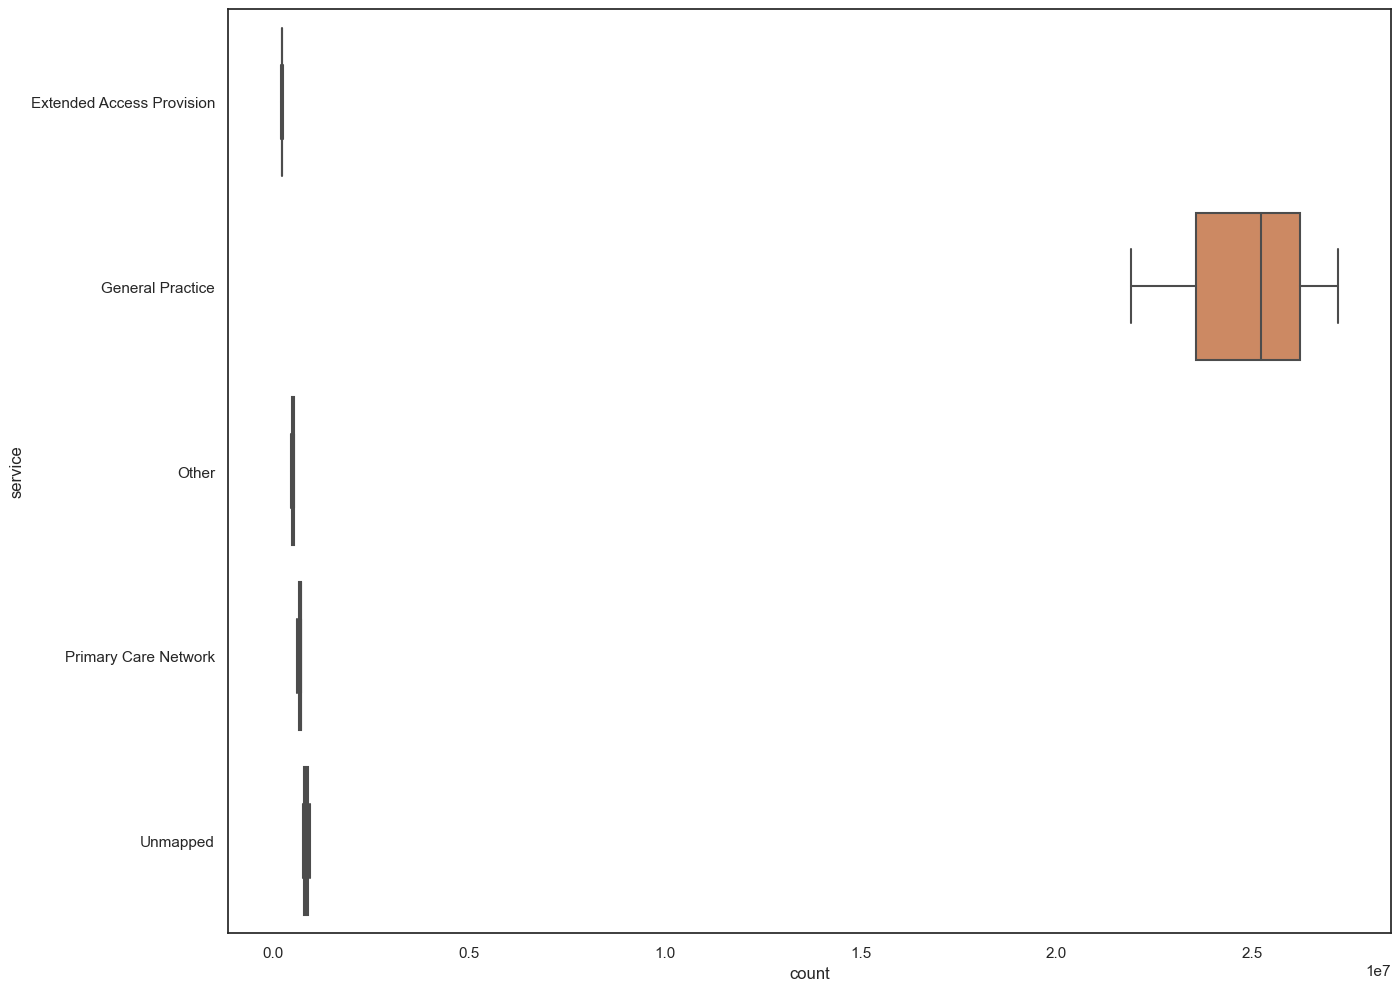

In [71]:
# Checking for outliers
sns.boxplot(x='count', y='service', data=nc_spring)

The Spring data was collated and checked for outliers (of which there were none).

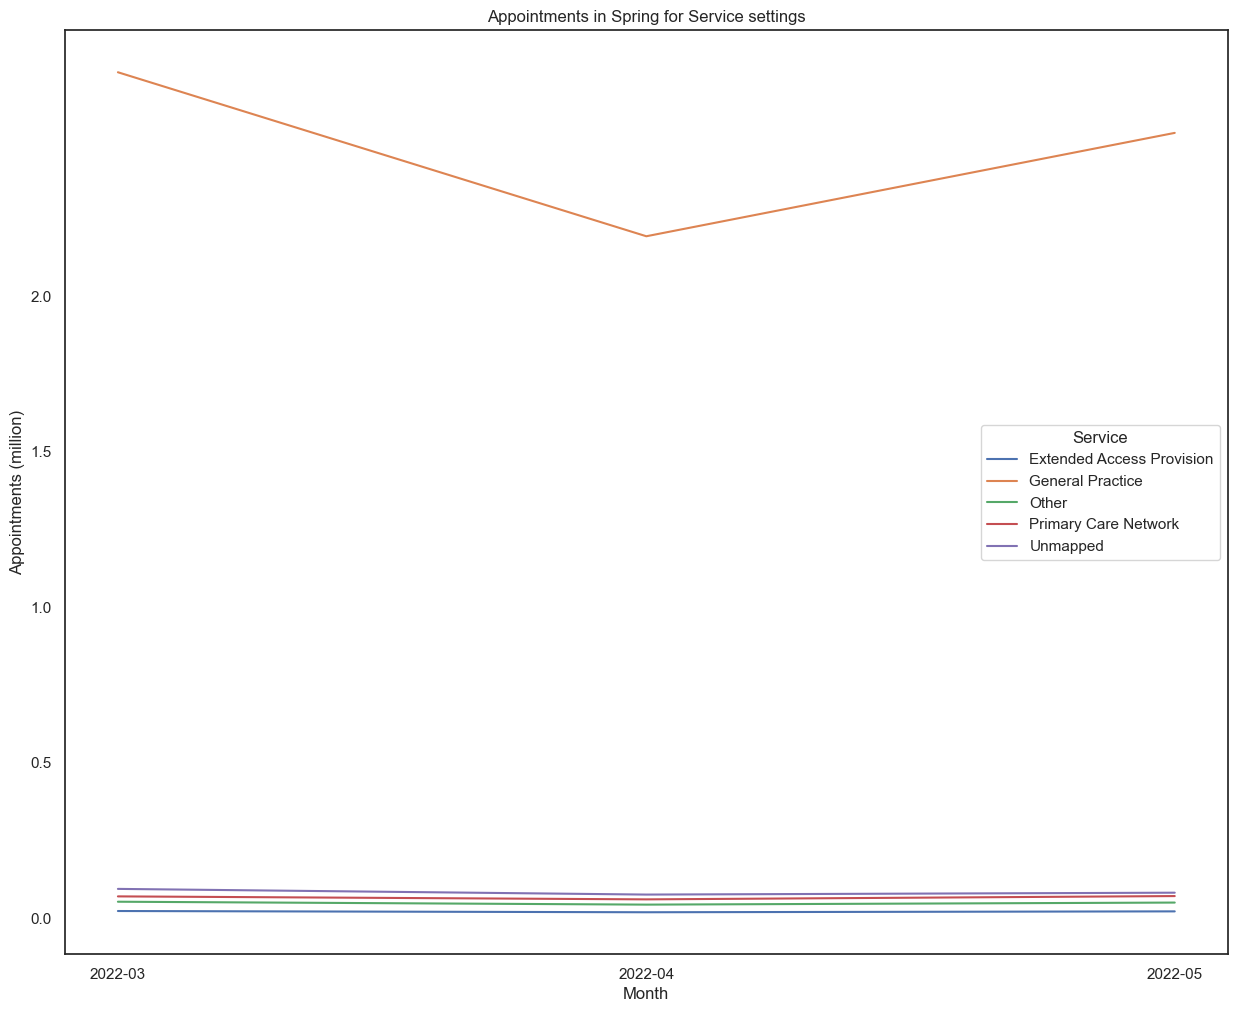

<Figure size 1500x1200 with 0 Axes>

In [72]:
# Visualise the subset using a lineplot.
nc_spr = sns.lineplot(x='month', y='count', hue = 'service', data=nc_spring, errorbar=None)

# Set the title, labels, ticks and legend title
nc_spr.set_xlabel('Month')
nc_spr.set_ylabel('Appointments (million)')
nc_spr.set_title('Appointments in Spring for Service settings')
plt.legend(title='Service')
plt.yticks([2.0e7, 1.5e7, 1.0e7, 0.5e7, 0.0e7], ['2.0', '1.5', '1.0', '0.5', '0.0'])

# Show lineplot
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot9.png')

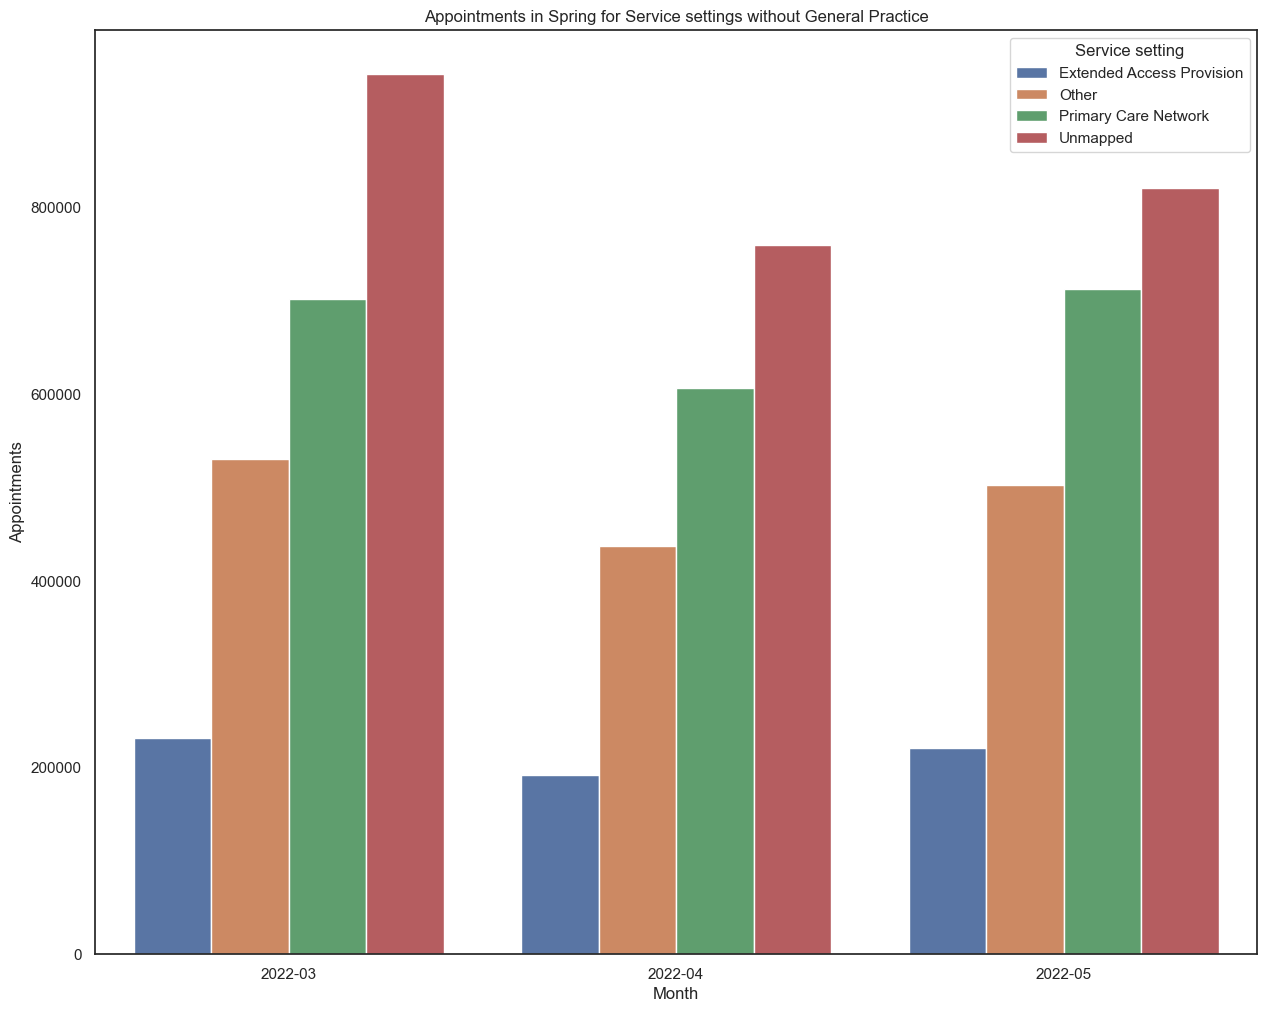

<Figure size 1500x1200 with 0 Axes>

In [73]:
# Barplot of appointments in spring without general practice
nc_spr2 = sns.barplot(x = 'month', y = 'count', 
             data=nc_spring[nc_spring['service'].isin(['Other', 'Primary Care Network',
                'Extended Access Provision', 'Unmapped'])], hue ='service', errorbar=None)

# Set the title, labels, ticks and legend title
nc_spr2.set_xlabel('Month')
nc_spr2.set_ylabel('Appointments')
nc_spr2.set_title('Appointments in Spring for Service settings without General Practice')
plt.legend(title='Service setting')

# Show barplot
plt.show()

# Saving plot as PNG file
plt.savefig('bar_plot4.png')

A line plot was created to display the appointments for each service setting in Spring. With only three months of data available and General Practice being dominant, a bar graph was generated to show the data excluding GP. This revealed very little, and everything was in line with the previous data for monthly figures.

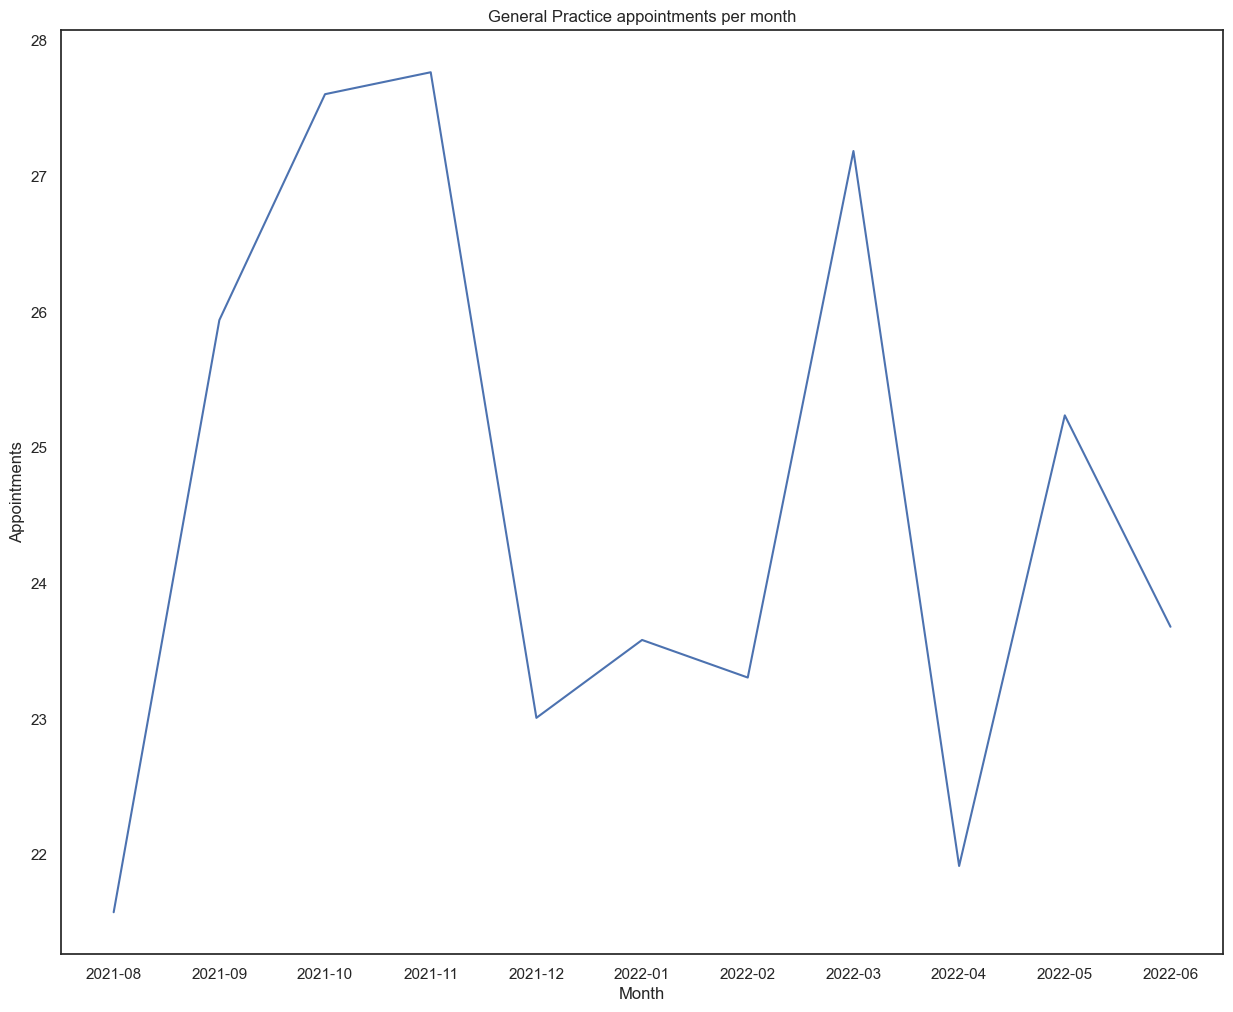

<Figure size 1500x1200 with 0 Axes>

In [74]:
# Plot monthly appointments GP only
nc_gp = sns.lineplot(x='month', y='count', 
             data=nc_ss[nc_ss['service'].isin(['General Practice'])], errorbar=None)

# Set the title, labels, ticks and legend title
nc_gp.set_xlabel('Month')
nc_gp.set_ylabel('Appointments')
nc_gp.set_title('General Practice appointments per month')
plt.yticks([2.8e7, 2.7e7, 2.6e7, 2.5e7, 2.4e7, 2.3e7, 2.2e7], ['28', '27', '26', '25', '24', '23', '22'])

# Show barplot
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot10.png')

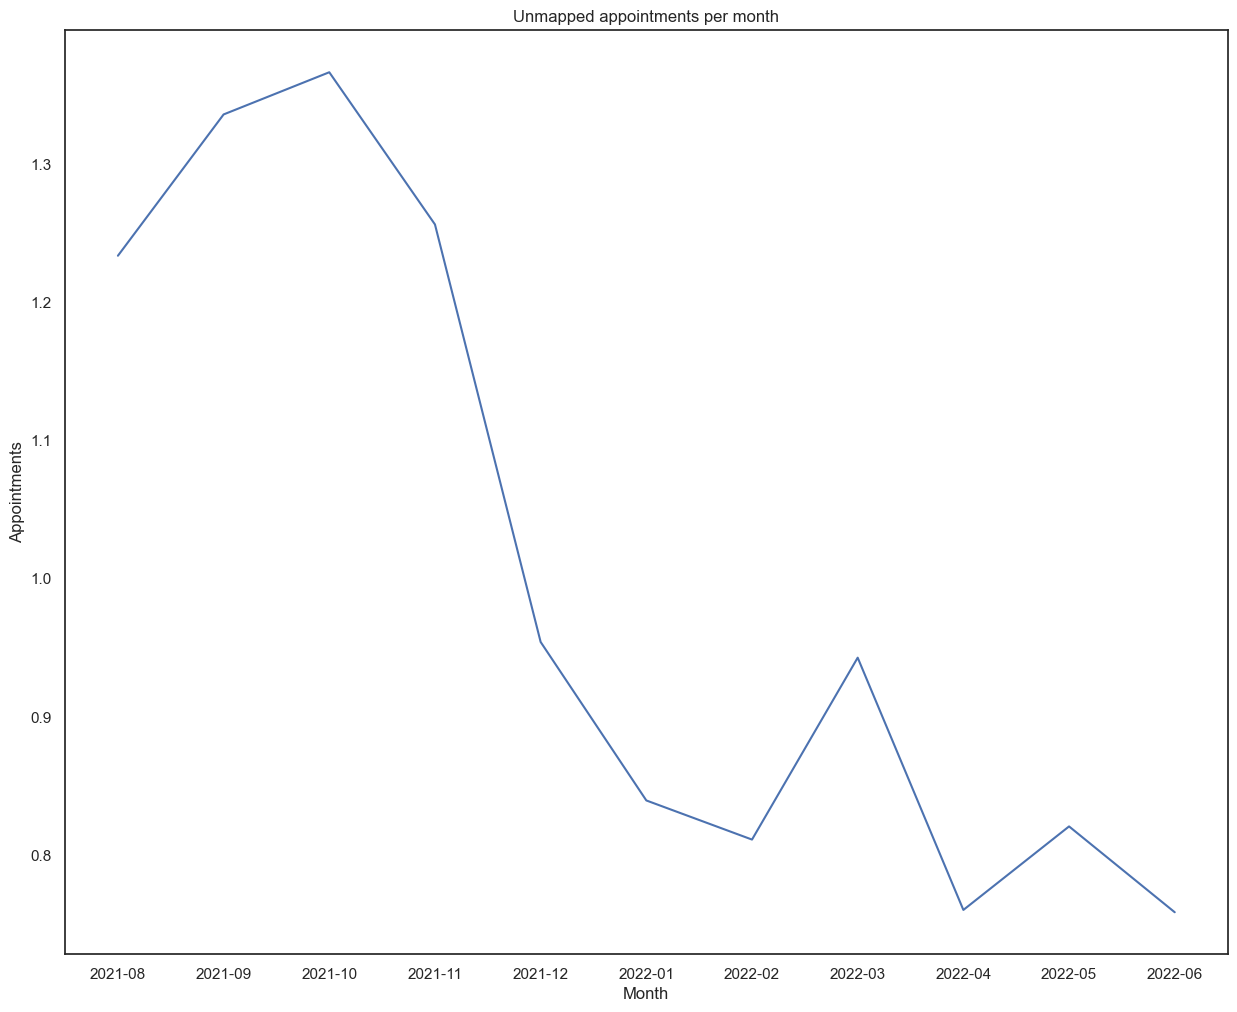

<Figure size 1500x1200 with 0 Axes>

In [75]:
# Plot monthly appointments Unmapped only
nc_gp = sns.lineplot(x='month', y='count', 
             data=nc_ss[nc_ss['service'].isin(['Unmapped'])], errorbar=None)

# Set the title, labels, ticks and legend title
nc_gp.set_xlabel('Month')
nc_gp.set_ylabel('Appointments')
nc_gp.set_title('Unmapped appointments per month')
plt.yticks([1.3e6, 1.2e6, 1.1e6, 1.0e6, 0.9e6, 0.8e6], ['1.3', '1.2', '1.1', '1.0', '0.9', '0.8'])

# Show barplot
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot24.png')

Just to reaffirm which months are the busiest and, therefore, require more attention in planning staffing levels, bed capacity, and stock levels of all healthcare essentials, a further line plot was constructed. The drop-off in appointments from December to February is worth reflecting on, and April even more so due to its large difference from the months on either side of it. Finally there is a positive trend of Unmapped data reducing but a greater data range would be needed to show if this is definitive or not.

Summary of Analysis week 4:

Throughout this week's analysis, it has become even clearer that General Practice is the largest setting, and the busiest months are March, September, October, and November. On the flip side, April stands out as the quietest, which is illuminated more by its large difference from the months on either side. 
There is also potential that the Unmapped data figures are improving, but more data is needed in this respect for a definitive case to be put forward of this happening. 
By reviewing the National categories, where some outliers were removed for improved data, the monthly trends are, for the majority, in a similar vein to the rest of the results. 
One area of concern is the Unmapped values being abnormally larger in August and December, and questions should be asked as to why this is happening considering they are peak holiday periods.

## 5) Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [76]:
# Libraries and settings needed for analysis.
import pandas as pd
import seaborn as sns

# Set the figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display.
pd.options.display.max_colwidth = 200

In [77]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
print(tweets.shape)
print(tweets.dtypes)
print(tweets.columns)
tweets.head()

(1174, 10)
tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object
Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],
      dtype='object')


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [78]:
# Explore the metadata and data set.
tweets.describe()
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


# Would it be useful to only look at retweeted and favourite tweet messages?

Yes.

# Explain your answer.

I think the retweeted and favourite tweet messages definitely show an overall approval of each tweet and therefore is an easy way to collate trends on twitter based on their content, it certainly would make for an easier way to aggregate sentiment. Although, it does also depend on the data involved as you shouldn't necessarily discard the relevance of the least retweeted or favourite ones if the data isn't skewed and the retweets and favourites aren't signifcantly more than the less popular tweets.


In [79]:
# Set Seaborn plot style and figure size
plt.figure(figsize=(15, 12))
sns.set(style="white")

# Set the maximum column width for DataFrame
pd.options.display.max_colwidth = 200

# Create a new DataFrame containing only the text.
tweet_text = tweets[['tweet_full_text']]
tweet_text

# View the DataFrame.
tweet_text

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."
...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…
1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie..."
1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp..."
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC


<Figure size 1500x1200 with 0 Axes>

In [80]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())
        
# View output
tags

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare',
 '#healthcare',
 '❤️\n\n#healthcare',
 '#healthcare',
 '#hcldr',
 '#premisehealth',
 '#hiring',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '#qualitypatientcare',
 '#jobs',
 '#job',
 '#ascp2022',
 '#ascp100.',
 '#healthcare',
 '#healthsecretary',
 '#healthcare',
 '#ai,',
 '#sdoh,',
 '#healthcare',
 '\nhttps://t.co/ewe7jntj1e\n#tropicana',
 '#real',
 '#juice',
 '#healthcare',
 '#watch',
 '#worms',
 '#fruits',
 '#healthtips',
 '#tips',

In [81]:
# Display the first 30 records.
# Create a series
tags1 = pd.Series(tags).value_counts()

# View first 30 records
tags1.head(30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [82]:
# Convert the series to a DataFrame in preparation for visualisation.
tags_df = pd.DataFrame(tags1)

# Rename the columns.
tags_df = tags1.reset_index(name='Count').rename(columns={'index': 'Word'})

# View the ouput
tags_df

,Word,Count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


In [83]:
# Fix the count datatype.
# Count datatype was already an integer 

# View the result.
print(tags_df.dtypes)

Word     object
Count     int64
dtype: object


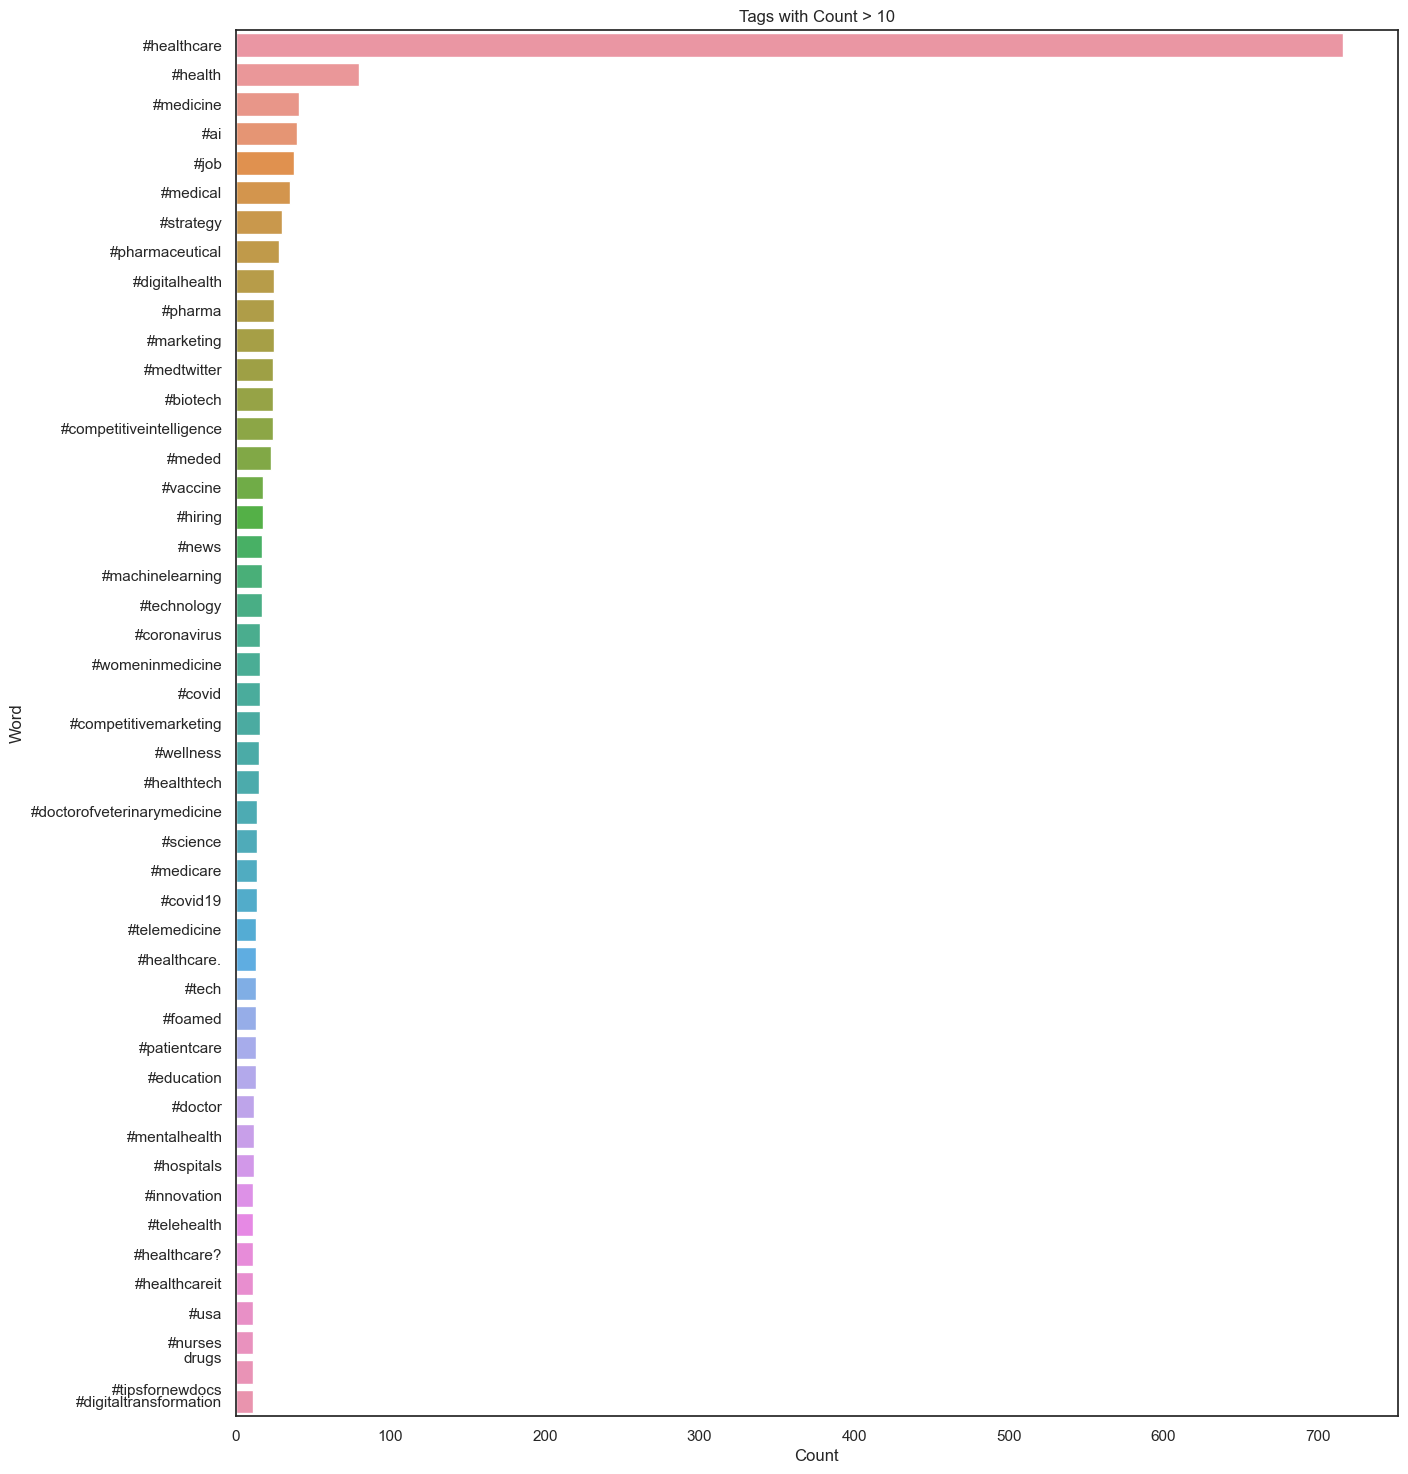

<Figure size 1500x1200 with 0 Axes>

In [84]:
# Display records where the count is larger than 10.
# Adjust plot size 
plt.figure(figsize=(15, 18))

# Plot records larger than 10
sns.barplot(y="Word", x="Count", data=tags_df[tags_df['Count'] > 10])

# Set the title
plt.title("Tags with Count > 10")

# Show the barplot
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot21.png')

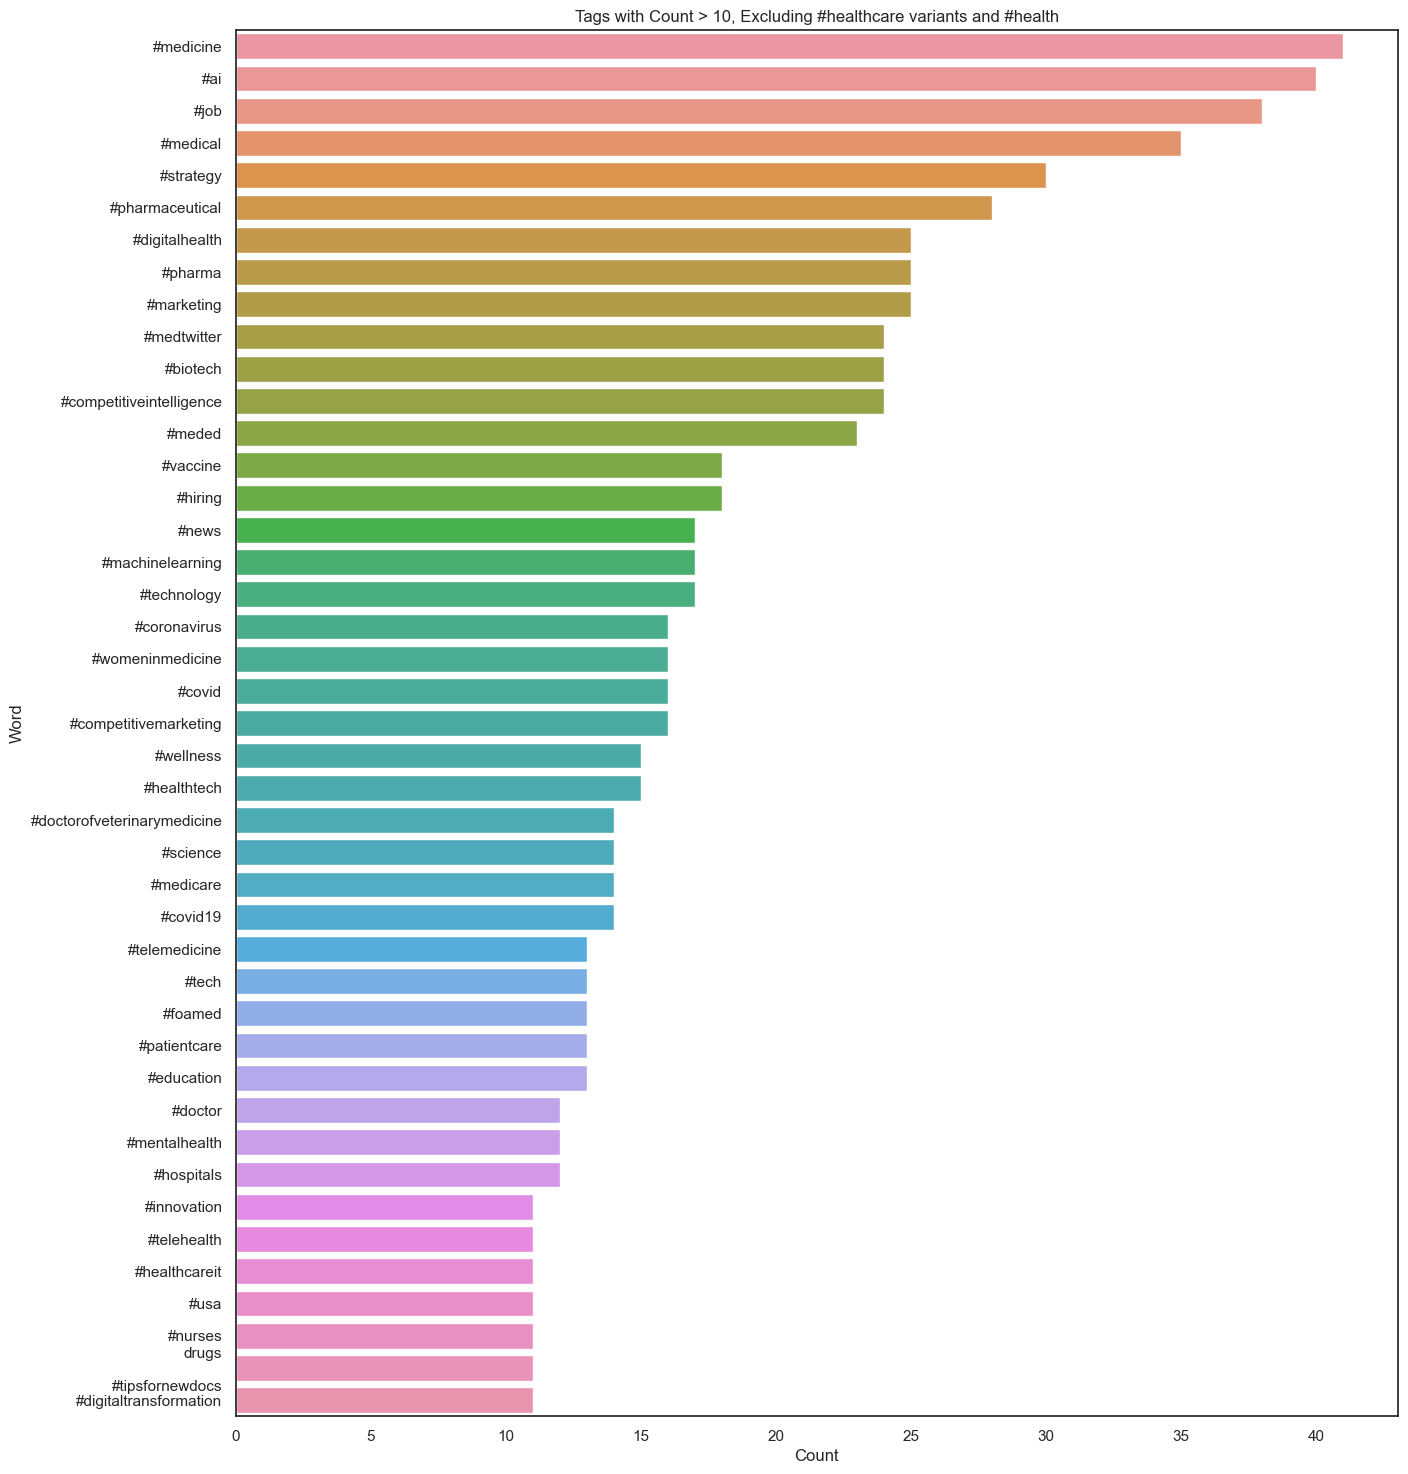

<Figure size 1500x1200 with 0 Axes>

In [85]:
# Display records where the count is larger than 10.
# Adjust plot size 
plt.figure(figsize=(15, 18))

# Displaying records excluding overrepresented hashtags
# #healthcare? and #healthcare. assumed the same as #healthcare
tags_df2 = tags_df.loc[~tags_df['Word'].isin(['#healthcare', '#health', '#healthcare.', '#healthcare?'])]

# Count larger than 10
tags_df2 = tags_df2[tags_df2['Count'] > 10]

# Create a Seaborn barplot
sns.barplot(y="Word", x="Count", data=tags_df2)

# Set the title
plt.title("Tags with Count > 10, Excluding #healthcare variants and #health")

# Show the barplot
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot22.png')

The Week 5 assignment's questions and coding provided an excellent opportunity to learn how to assess Twitter trends through various tweets. Acquiring the skills to identify trending hashtags proves to be a valuable analytical tool, especially given Twitter's widespread popularity. Notably, #healthcare emerged as the most frequently used hashtag, followed by #health. Two other variants of #healthcare were excluded to present records without these two overrepresented tags. 
The adjusted list revealed AI at the top, interestingly, highlighting its increasing presence in the healthcare sector. Initially, barplots were oriented with tag words on the x-axis but were later switched to the y-axis for easier tag reading. The issue of overlapping y-labels was addressed by adjusting the size of the plot. 

Summary of Analysis week 5:

Upon examining the content within retweeted and favourited tweets, it becomes evident that there is a global representation. For instance, @BurjeelHoldings stands out as a prominent private healthcare services provider in the UAE. Given this data, I question the relevance of many tweets to the NHS in the overall project. A more effective approach to utilizing Twitter as a tool for gauging sentiment on a specific subject would involve conducting polls, creating tweets with trending hashtags, or hosting chats with pertinent questions. I believe incorporating these tools would enhance the analytical process of any tweet-related data and give valuable insights into relevant areas of interest.

## 6) Assignment activity 6
In the final module you will answer additional questions from the NHS as well as additional questions and observations you identified. Make sure to revisit previous sections that may provide useful insights to the questions posed in Module 6 where required.

### Investigate the main concerns posed by the NHS. 

In [86]:
# Prepare your workstation.
# Load the appointments_regional.csv file.


# View the DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,year_month
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107,2020-01
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791,2020-01
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686,2020-01
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268,2020-01
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971,2020-01


In [87]:
# Print the min and max dates.
print(ar['appointment_month'].min())
print(ar['appointment_month'].max())


2020-01-01 00:00:00
2022-06-01 00:00:00


In [88]:
# Filter the data set to only look at data from 2021-08 onwards.
ar2 = ar[ar['year_month'] >= '2021-08']

# View the DataFrame.
ar2

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,year_month
3652,E54000034,2021-08-01,Attended,GP,Face-to-Face,1 Day,6553,2021-08
3653,E54000034,2021-08-01,Attended,GP,Face-to-Face,15 to 21 Days,2390,2021-08
3654,E54000034,2021-08-01,Attended,GP,Face-to-Face,2 to 7 Days,10547,2021-08
3655,E54000034,2021-08-01,Attended,GP,Face-to-Face,22 to 28 Days,937,2021-08
3656,E54000034,2021-08-01,Attended,GP,Face-to-Face,8 to 14 Days,4961,2021-08
...,...,...,...,...,...,...,...,...
596816,E54000050,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21,2022-06
596817,E54000050,2022-06-01,Unknown,Unknown,Unknown,22 to 28 Days,8,2022-06
596818,E54000050,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28,2022-06
596819,E54000050,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17,2022-06


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [89]:
# Create an aggregated data set to review the different features.
ar_agg = ar2.groupby(['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 
                     'time_between_book_and_appointment'])['count_of_appointments'].agg('sum').reset_index()

# View the DataFrame.
ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08-01,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08-01,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08-01,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08-01,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08-01,GP,Attended,Face-to-Face,8 to 14 Days,398772
...,...,...,...,...,...,...
3749,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,5494
3750,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,5115
3751,2022-06-01,Unknown,Unknown,Unknown,Same Day,1914
3752,2022-06-01,Unknown,Unknown,Unknown,Unknown / Data Quality,53


In [90]:
# Determine the total number of appointments per month.
ar_agg_month = ar_agg.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_agg_month['daily_appointments'] = (ar_agg_month['count_of_appointments'] / 30).round(1)

# View the DataFrame.
ar_agg_month

,appointment_month,count_of_appointments,daily_appointments
0,2021-08-01,23852171,795072.4
1,2021-09-01,28522501,950750.0
2,2021-10-01,30303834,1010127.8
3,2021-11-01,30405070,1013502.3
4,2021-12-01,25140776,838025.9
5,2022-01-01,25635474,854515.8
6,2022-02-01,25355260,845175.3
7,2022-03-01,29595038,986501.3
8,2022-04-01,23913060,797102.0
9,2022-05-01,27495508,916516.9


Appointments were collated at a monthly and daily level and the busier months of October and November were exposed even more when looking at the daily level. 

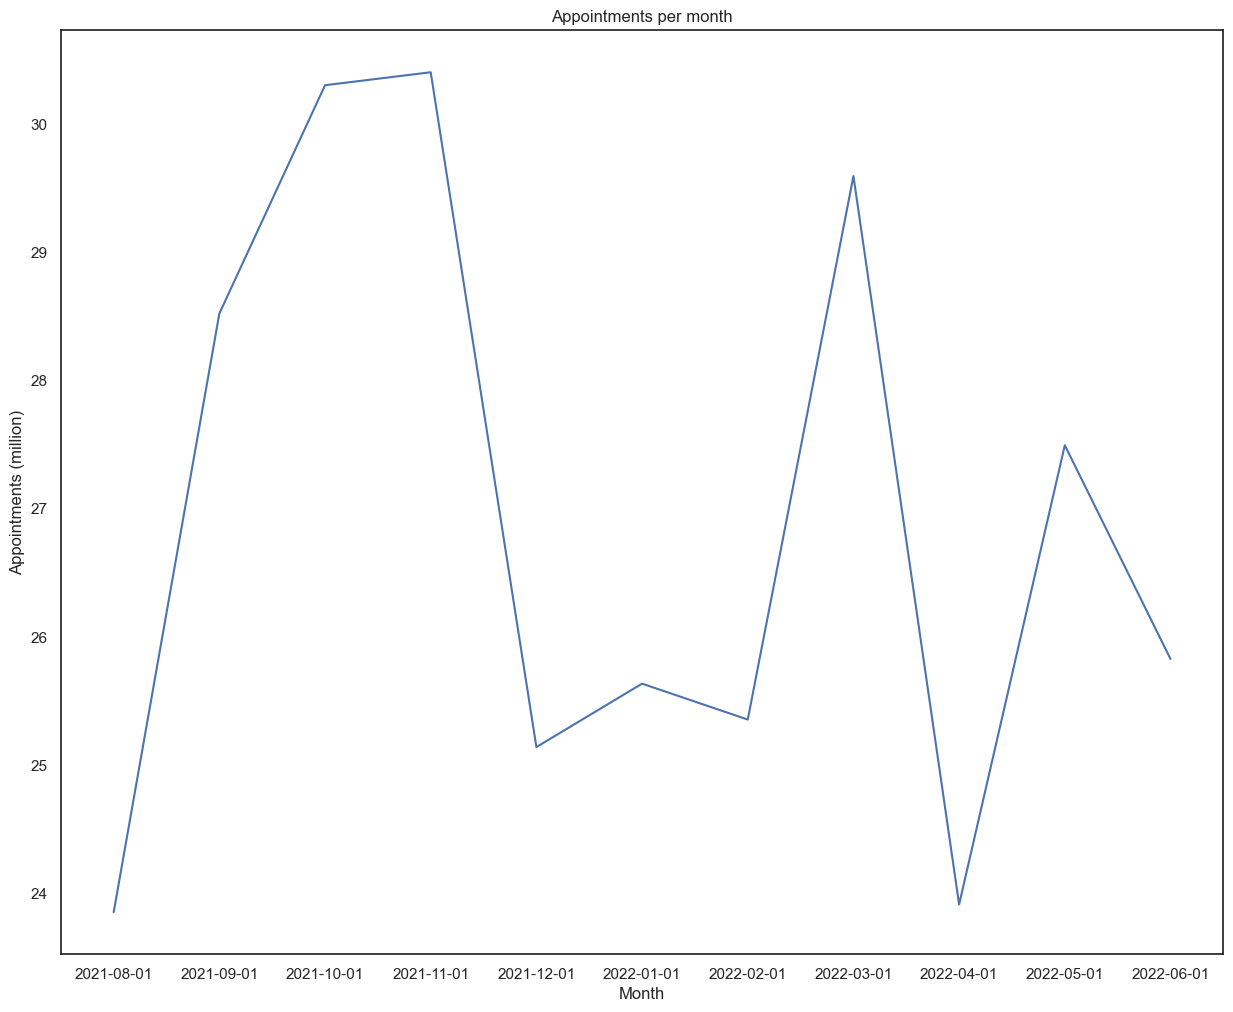

<Figure size 1500x1200 with 0 Axes>

In [91]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
ar_agg_month['appointment_month'] = ar_agg_month['appointment_month'].astype(str)

# Create a lineplot with Seaborn.
ar_app_m = sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_agg_month)

# Set the title, labels, ticks and legend title
ar_app_m.set_xlabel('Month')
ar_app_m.set_ylabel('Appointments (million)')
ar_app_m.set_title('Appointments per month')
plt.yticks([3.0e7, 2.9e7, 2.8e7, 2.7e7, 2.6e7, 2.5e7, 2.4e7], ['30', '29', '28', '27', '26', '25', '24'])

# Show lineplot
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot11.png')

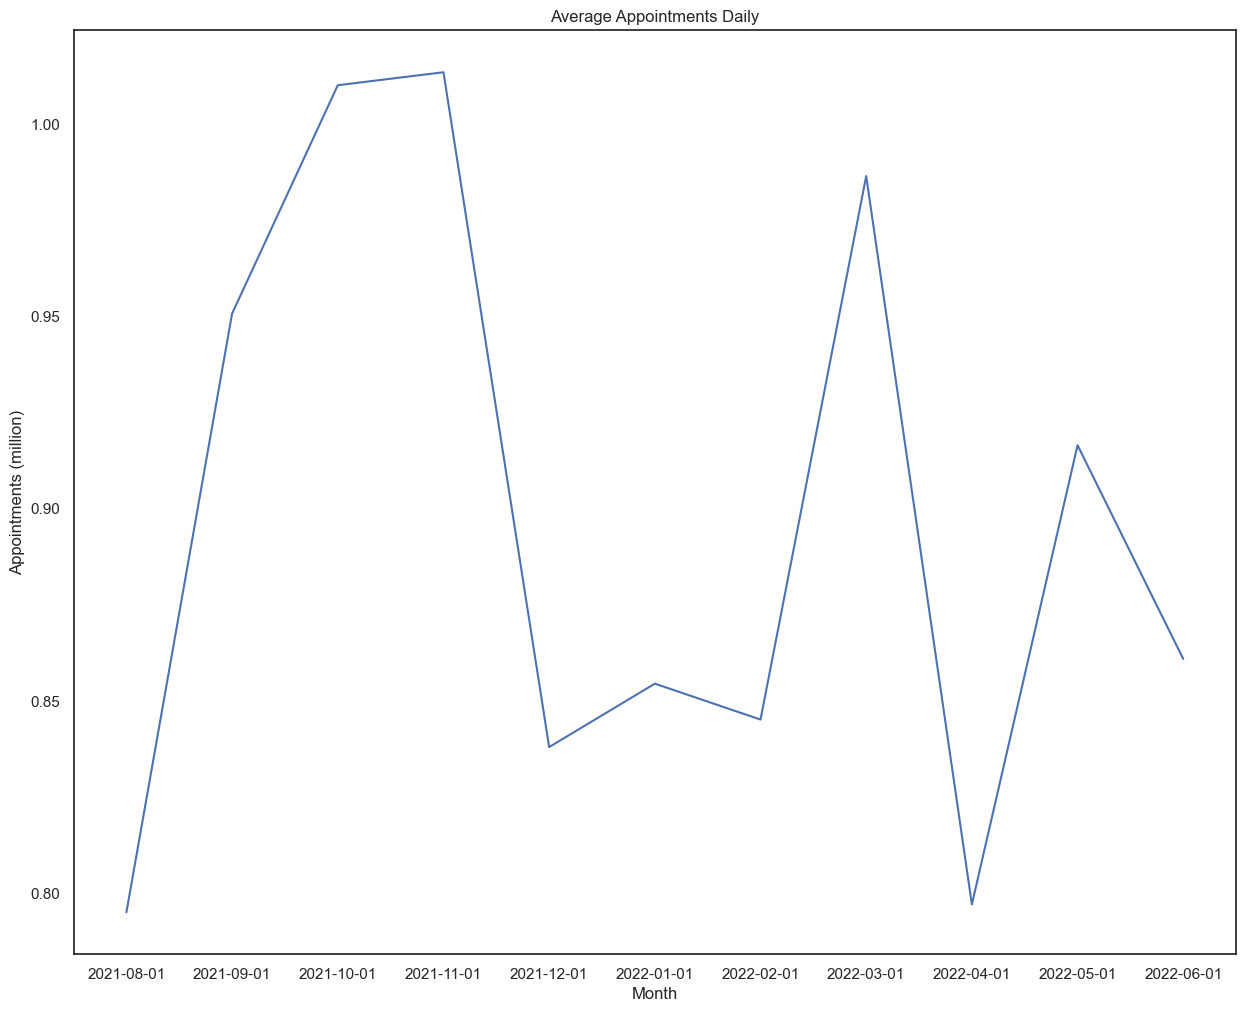

<Figure size 1500x1200 with 0 Axes>

In [92]:
# Plot monthly capacity utilisation.
# Create a lineplot.
ar_app_d = sns.lineplot(x='appointment_month', y='daily_appointments', data=ar_agg_month)

# Set the title, labels, ticks and legend title
ar_app_d.set_xlabel('Month')
ar_app_d.set_ylabel('Appointments (million)')
ar_app_d.set_title('Average Appointments Daily')
plt.yticks([1.0e6, 0.95e6, 0.90e6, 0.85e6, 0.80e6], ['1.00', '0.95', '0.90', '0.85', '0.80'])

# Show lineplot
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot12.png')

The line plot created here not only continues to confirm the busyness of all the months but also shows that, given the NHS has provided a figure of an average of 1,200,000 appointments per day for planning purposes and as a guideline for maximum capacity, it consequently demonstrates that the NHS is working under maximum capacity. 
This overall view is very limited in its value when looking at a regional or hospital-by-hospital perspective, as there could be more pressure on certain hospitals that can't be evaluated. Therefore, an analysis for each individual hospital on this would benefit each of them in order to get a better picture of where improvements can be made and when and where they should allocate resources.

**Question 2:** How do the healthcare professional types differ over time?

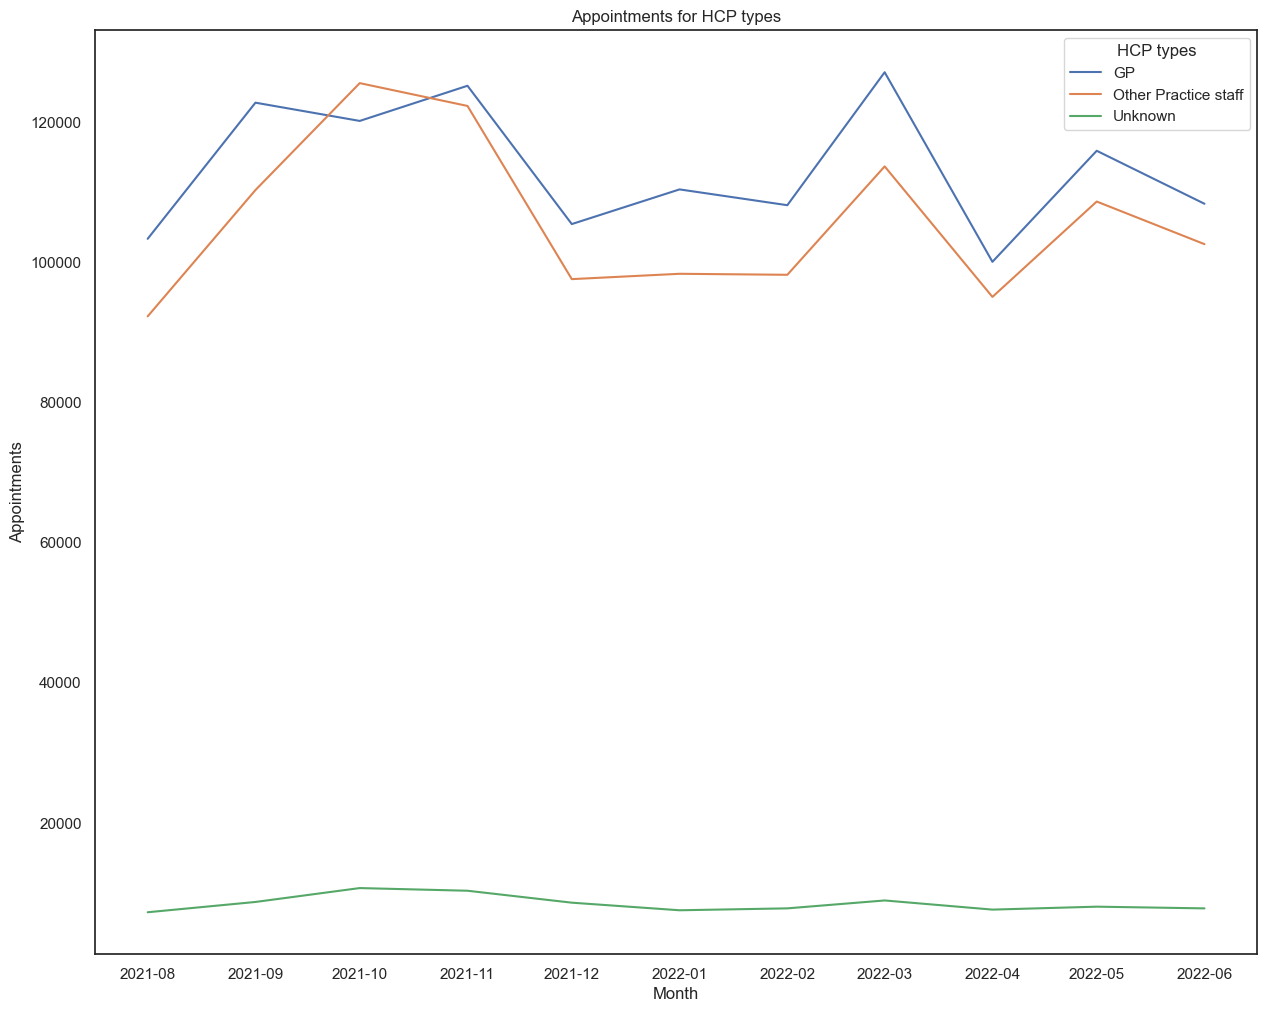

<Figure size 1500x1200 with 0 Axes>

In [93]:
# Create a lineplot to answer the question 
# How do the healthcare professional types differ over time?
ar_hcp = sns.lineplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', data=ar_agg, errorbar=None)

# Set the title, labels, and legend title
ar_hcp.set_xlabel('Month')
ar_hcp.set_ylabel('Appointments')
ar_hcp.set_title('Appointments for HCP types')
plt.legend(title='HCP types')

# Show the lineplot
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot13.png')

The most concerning part of this visualization is once again are the categories of Unknown and Other practice staff. A better mapping of staff other than GPs would be beneficial, and improvements in categorizing Unknown results are necessary for better accuracy in the data.

**Question 3:** Are there significant changes in whether or not visits are attended?

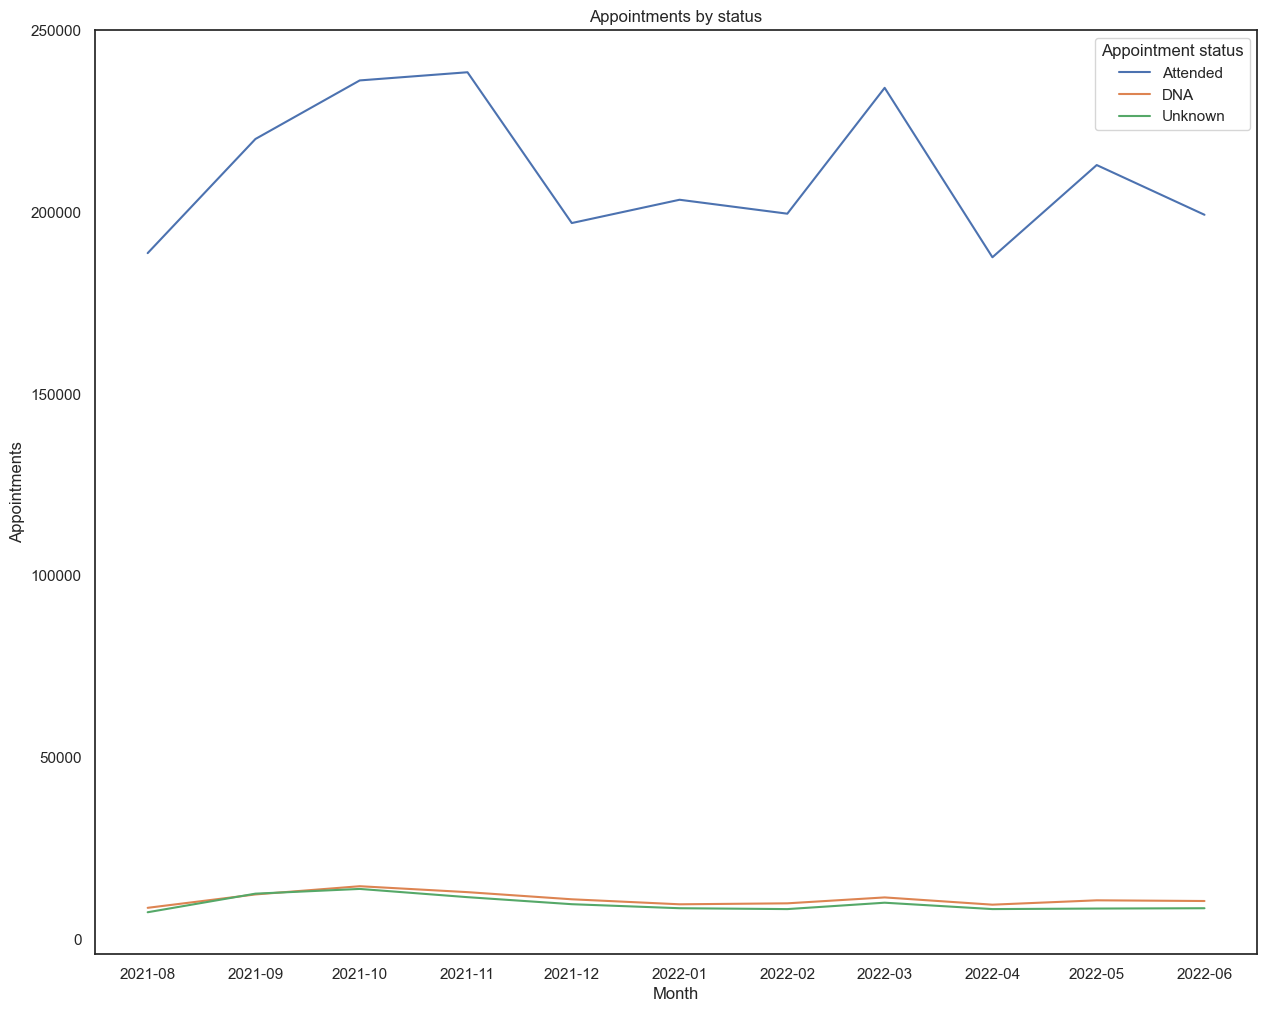

<Figure size 1500x1200 with 0 Axes>

In [94]:
# Create a lineplot to answer the question.
# Are there significant changes in whether or not visits are attended?
ar_status = sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_status', data=ar_agg, errorbar=None)

# Set the title, labels, and legend title
ar_status.set_xlabel('Month')
ar_status.set_ylabel('Appointments')
ar_status.set_title('Appointments by status')
plt.legend(title='Appointment status')

# Show lineplot
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot14.png')

As previously noted, although attendance is significantly larger, there is a worrying number of DNA and Unknown results in the data. This is an area where improvements need to be made. Further analysis into the reasons behind these occurrences will enable better recommendations to rectify these issues.

**Question 4:** Are there changes in terms of appointment type and the busiest months?

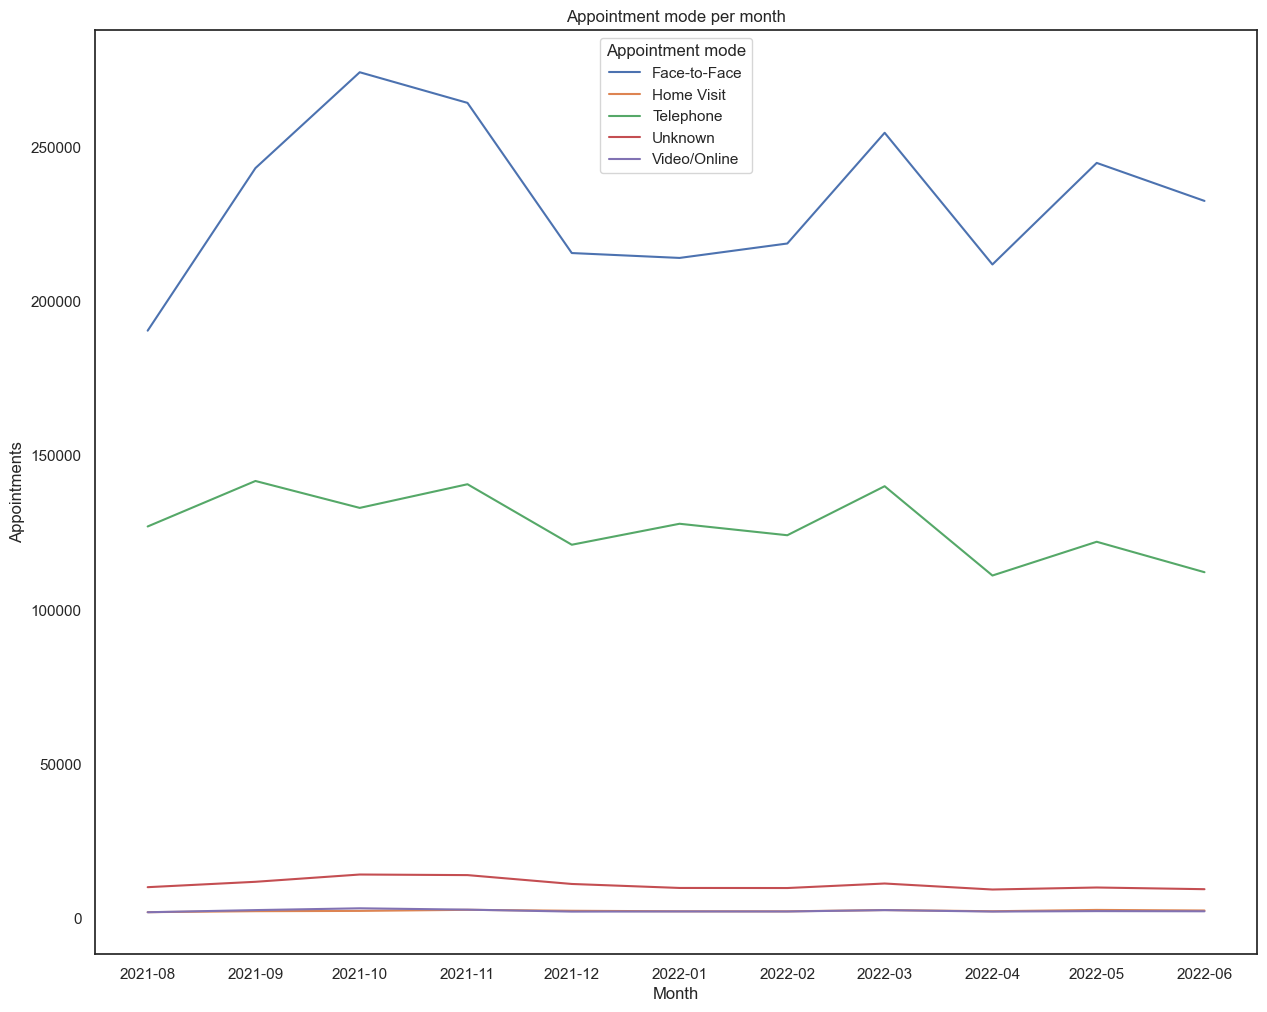

<Figure size 1500x1200 with 0 Axes>

In [95]:
# Create a lineplot to answer the question.
# Are there changes in terms of appointment type and the busiest months?
ar_mode = sns.lineplot(x='appointment_month', y='count_of_appointments',
                           hue='appointment_mode', data=ar_agg, errorbar=None)

# Set the title, labels, and legend title
ar_mode.set_xlabel('Month')
ar_mode.set_ylabel('Appointments')
ar_mode.set_title('Appointment mode per month')
plt.legend(title='Appointment mode')

# Show lineplot
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot15.png')

Face-to-Face visits fall in line with the already discovered monthly patterns but interestingly telephone calls don't seem to be affected quite so much and are at a more consistent level throughout the year. This is useful to know when planning staffing levels on the phone lines.

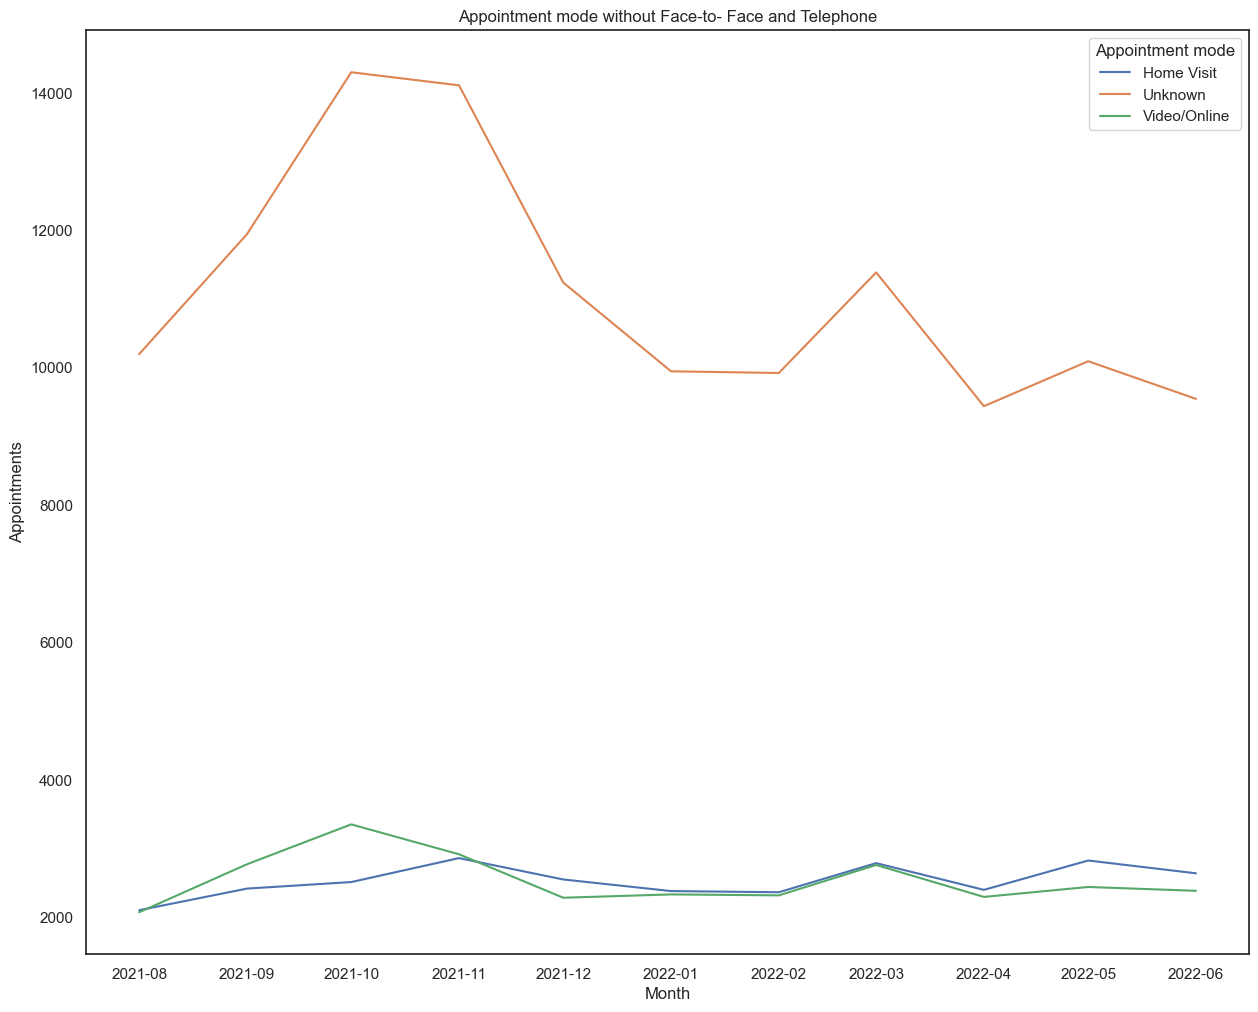

<Figure size 1500x1200 with 0 Axes>

In [96]:
# Plotting modes, home visit, unknown and video/online
ar_mode2 = sns.lineplot(x='appointment_month', y='count_of_appointments', 
             data=ar_agg[ar_agg['appointment_mode'].isin(['Home Visit', 'Unknown',
                'Video/Online'])], hue ='appointment_mode', errorbar=None)

# Set the title, labels, and legend title
ar_mode2.set_xlabel('Month')
ar_mode2.set_ylabel('Appointments')
ar_mode2.set_title('Appointment mode without Face-to- Face and Telephone')
plt.legend(title='Appointment mode')

# Show lineplot
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot16.png')

Plotting the home visit, unknown and video/online has shown the unknown element to follow the distinct monthly pattern but also allude to the number of appointments that are not being distiguished correctly. Improvements on these must be made.

**Question 5:** Are there any trends in time between booking an appointment?

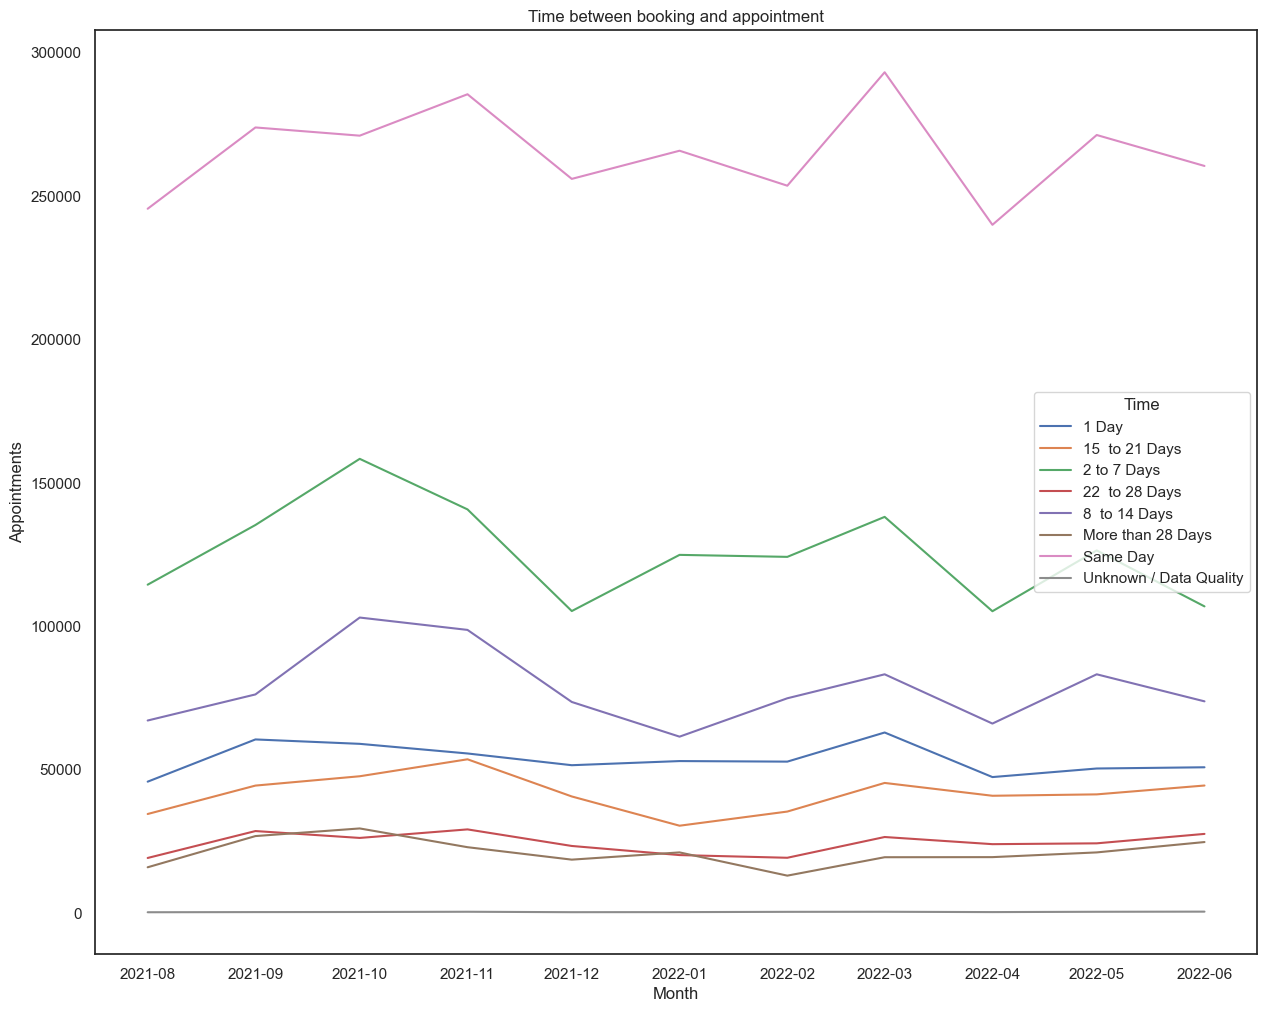

<Figure size 1500x1200 with 0 Axes>

In [97]:
# Create a lineplot to answer the question.
# Are there any trends in time between booking an appointment?
ar_time = sns.lineplot(x='appointment_month', y='count_of_appointments',
                       hue='time_between_book_and_appointment',
                        data=ar_agg, errorbar=None)

# Set the title, labels, and legend title
ar_time.set_xlabel('Month')
ar_time.set_ylabel('Appointments')
ar_time.set_title('Time between booking and appointment')
plt.legend(title='Time')

# Show lineplot
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot17.png')

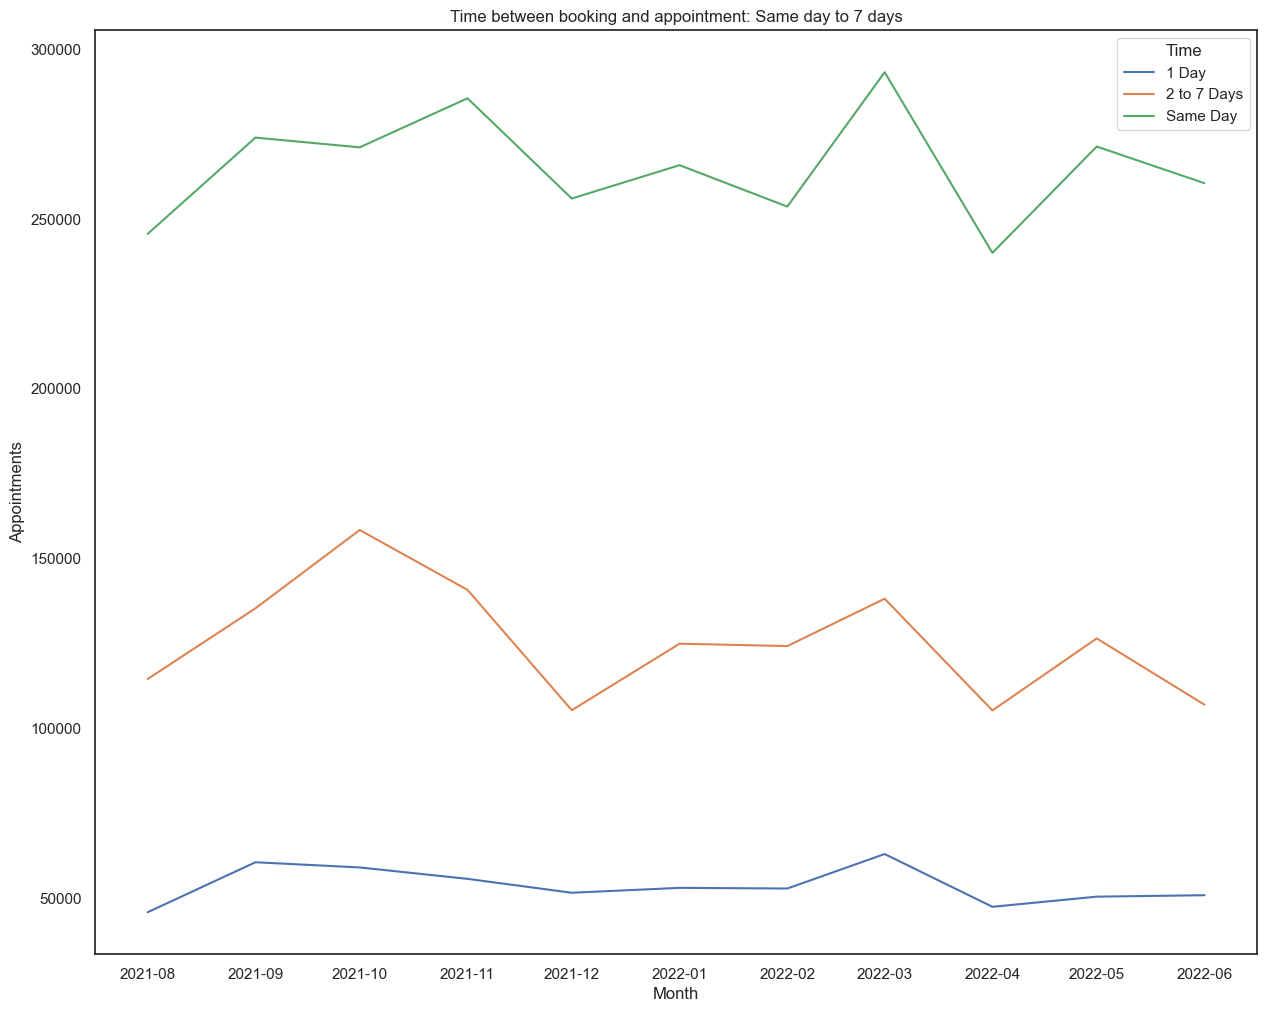

<Figure size 1500x1200 with 0 Axes>

In [98]:
# Plotting time between booking and Same do to 7 days
ar_time2 = sns.lineplot(x='appointment_month', y='count_of_appointments',
                       hue='time_between_book_and_appointment', 
                       data=ar_agg[ar_agg['time_between_book_and_appointment'].isin(['Same Day', '1 Day',
                        '2 to 7 Days'])], errorbar=None)

# Set the title, labels, and legend title
ar_time2.set_xlabel('Month')
ar_time2.set_ylabel('Appointments')
ar_time2.set_title('Time between booking and appointment: Same day to 7 days')
plt.legend(title='Time')

# Show lineplot
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot18.png')

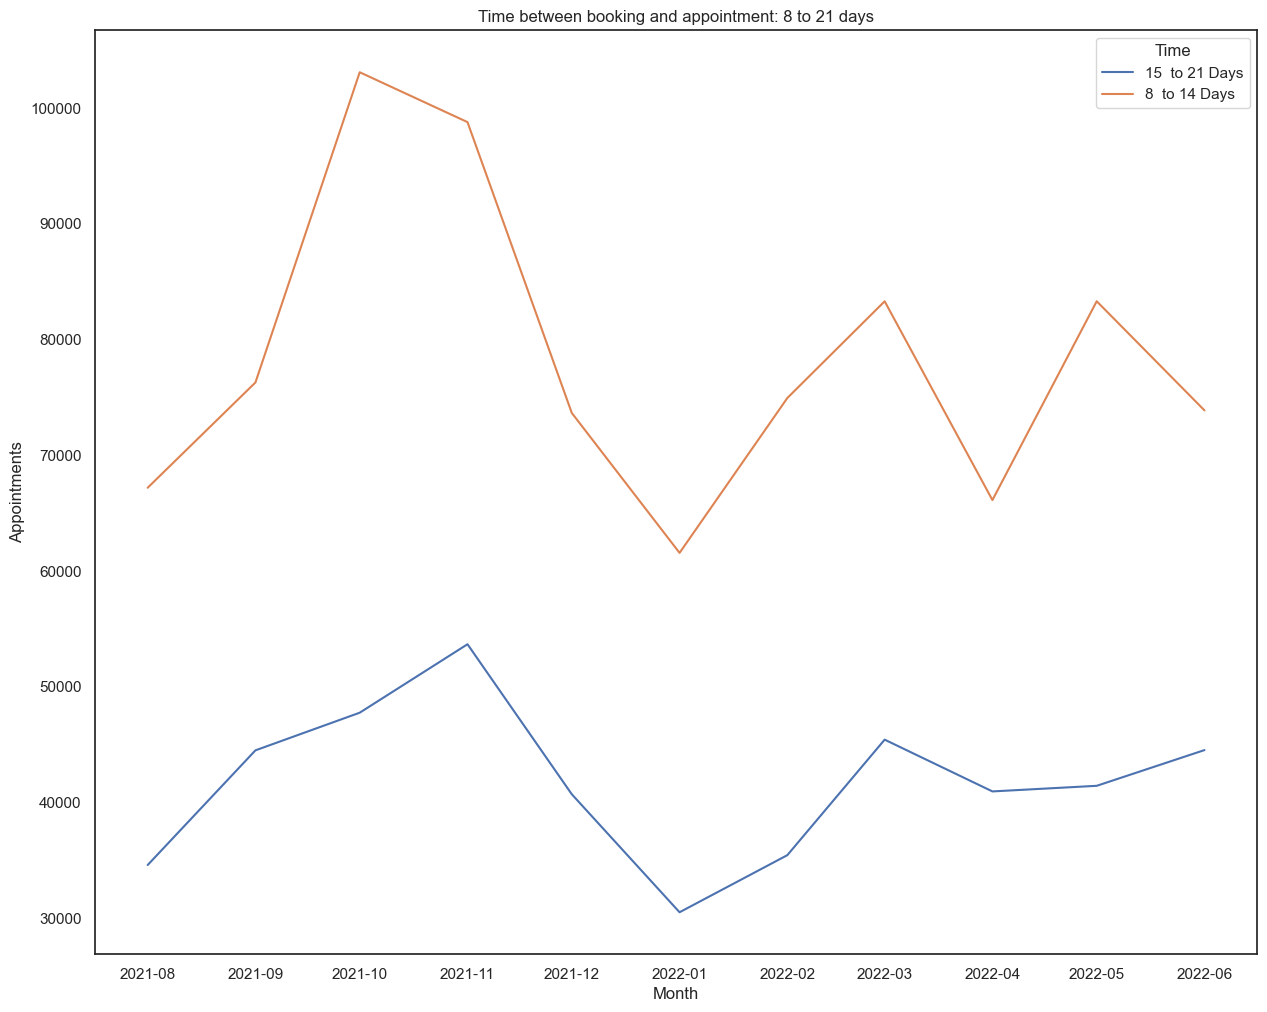

<Figure size 1500x1200 with 0 Axes>

In [99]:
# Plotting time between booking and appointment 8 to 21 days
ar_time3 = sns.lineplot(x='appointment_month', y='count_of_appointments',
                       hue='time_between_book_and_appointment', 
                       data=ar_agg[ar_agg['time_between_book_and_appointment'].isin(['8  to 14 Days',
                        '15  to 21 Days'])], errorbar=None)

# Set the title, labels, and legend title
ar_time3.set_xlabel('Month')
ar_time3.set_ylabel('Appointments')
ar_time3.set_title('Time between booking and appointment: 8 to 21 days')
plt.legend(title='Time')

# Show lineplot
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot19.png')

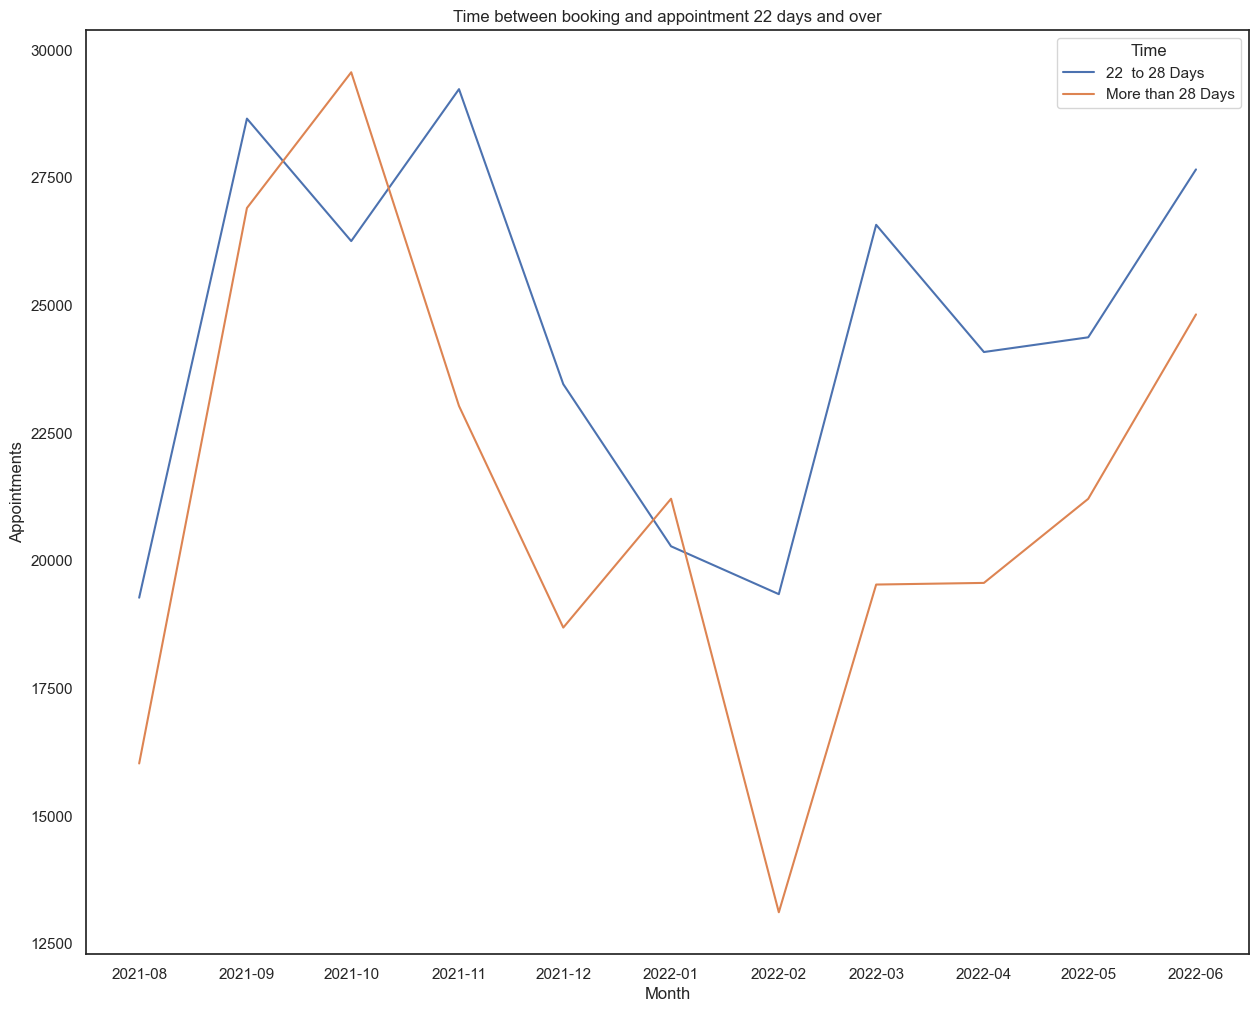

<Figure size 1500x1200 with 0 Axes>

In [100]:
# Plotting time between booking and appointment 22 days and over
ar_time4 = sns.lineplot(x='appointment_month', y='count_of_appointments',
                       hue='time_between_book_and_appointment', 
                       data=ar_agg[ar_agg['time_between_book_and_appointment'].isin(['22  to 28 Days',
                        'More than 28 Days'])], errorbar=None)

# Set the title, labels, and legend title
ar_time4.set_xlabel('Month')
ar_time4.set_ylabel('Appointments')
ar_time4.set_title('Time between booking and appointment 22 days and over')
plt.legend(title='Time')

# Show lineplot
plt.show()

# Saving plot as PNG file
plt.savefig('line_plot20.png')

Looking into the time between booking and appointment then the seasonal variances are still in play. For better judgement on the different time frames further plots were made.

**Question 6:** How does the spread of service settings compare?

In [101]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
# View the DataFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,year_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08,2021-08


In [102]:
# Create a new DataFrame and group the month of appointment and number of appointments.
nc_app = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View the DataFrame.
nc_app.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


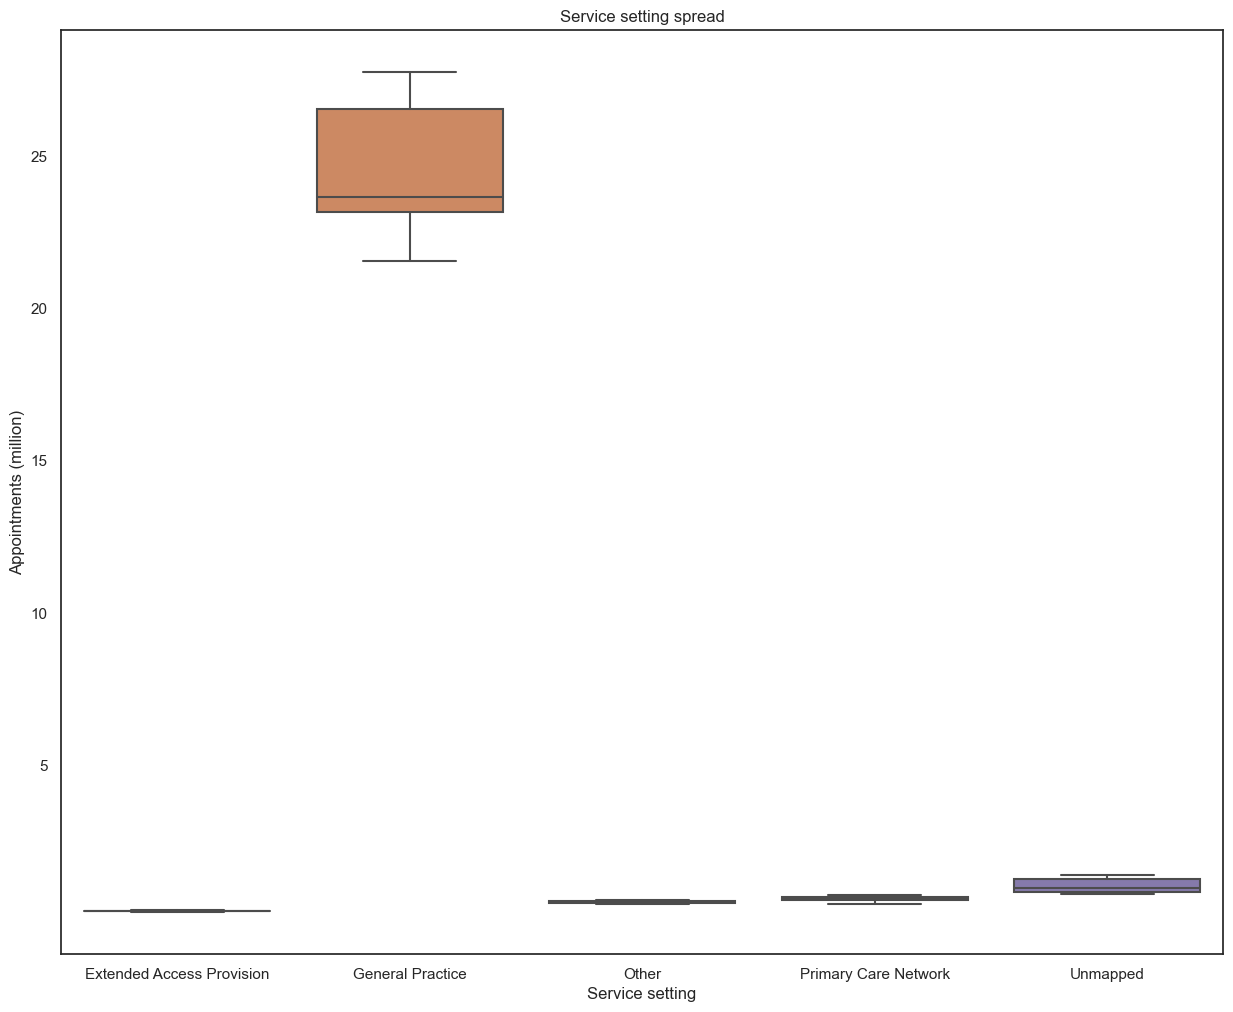

In [103]:
# Create a boxplot to investigate the spread of service settings.
nc_box = sns.boxplot(x='service_setting', y='count_of_appointments', data=nc_app)

# Set the title, labels, and legend title
nc_box.set_xlabel('Service setting')
nc_box.set_ylabel('Appointments (million)')
nc_box.set_title('Service setting spread')
plt.yticks([2.5e7, 2.0e7, 1.5e7, 1.0e7, 0.5e7], ['25', '20', '15', '10', '5'])

# Show lineplot
plt.show()

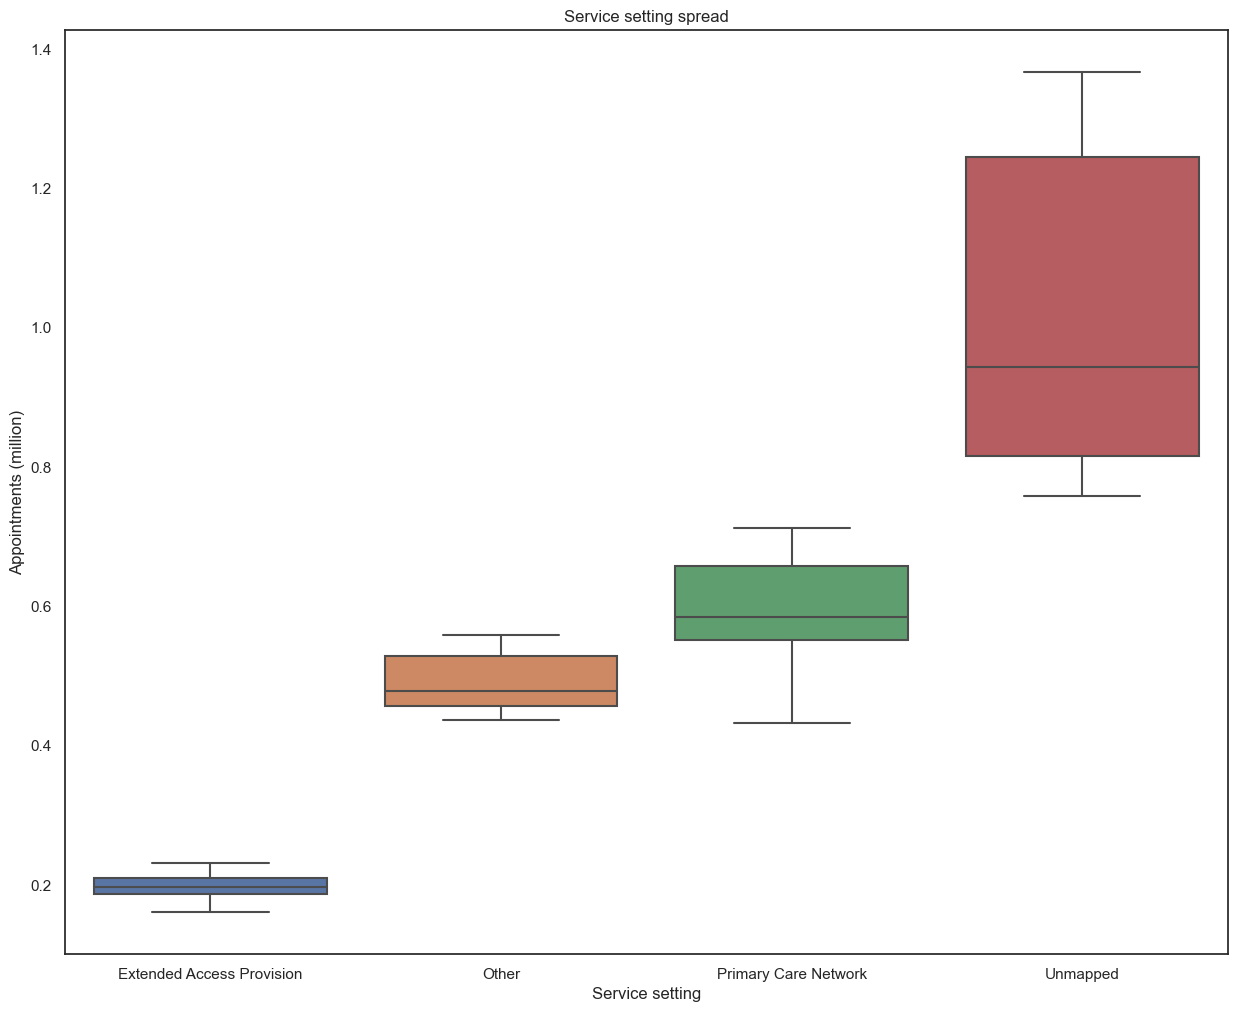

In [104]:
# Create a boxplot to investigate the service settings without GP.
nc_box2 = sns.boxplot(x='service_setting', y='count_of_appointments',
                      data=nc_app[nc_app['service_setting'].isin(['Extended Access Provision', 'Other',
                        'Primary Care Network', 'Unmapped'])])

# Set the title, labels, and legend title
nc_box2.set_xlabel('Service setting')
nc_box2.set_ylabel('Appointments (million)')
nc_box2.set_title('Service setting spread')
plt.yticks([1.4e6, 1.2e6, 1.0e6, 0.8e6, 0.6e6, 0.4e6, 0.2e6], ['1.4', '1.2', '1.0', '0.8', '0.6', '0.4', '0.2'])

# Show lineplot
plt.show()

The spread of service settings in the first boxplot again highlights the significant majority held by General Practice. The subsequent boxplot, with GP removed, confirms that improvements are needed for Unmapped results. Areas falling into the Other section possibly need redefinition if there are significant numbers within a specific service setting that are being lost within the data due to this classification being used.

Summary of Analysis week 6:

This week's analysis confirmed the ongoing trends that have been occurring throughout the process. The busy months of March, September, October, and November are clear and obvious, so staff levels and resources should be adjusted to take this fact into account. 
The consistency in mapping of appointments needs to be addressed, along with why there is a large amount of 'Unknown' results in all fields. 
Lastly, and most significantly, the DNA results for attendance need to be looked into far deeper, as significant gains can be made in this area that would benefit the allocation of resources and save large amounts of public funds that are currently wasted when patients do not show up to their appointments.

In [105]:
# Dataframe created collating appointment status, mode and the count
app_stat = ar.groupby(['appointment_status', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

# Show the output
app_stat

,appointment_status,appointment_mode,count_of_appointments
0,Attended,Face-to-Face,392705999
1,Attended,Home Visit,3612068
2,Attended,Telephone,254799226
3,Attended,Unknown,23335350
4,Attended,Video/Online,3303233
5,DNA,Face-to-Face,24253038
6,DNA,Home Visit,187571
7,DNA,Telephone,5262251
8,DNA,Unknown,1049427
9,DNA,Video/Online,158946


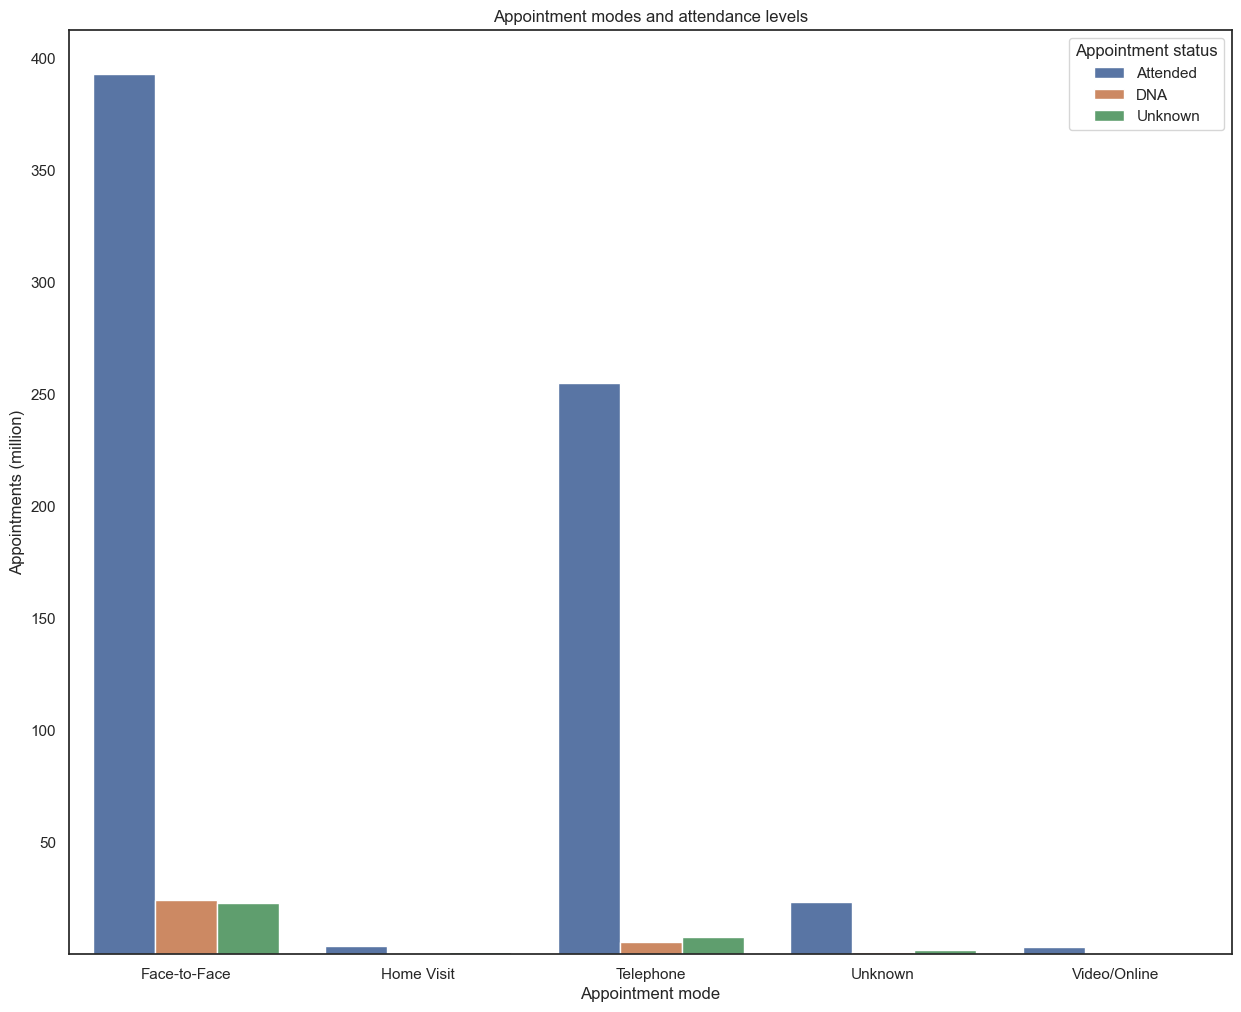

<Figure size 1500x1200 with 0 Axes>

In [106]:
# Create a barplot showing the correlation between the appointment mode and attendance
app = sns.barplot(x='appointment_mode', y='count_of_appointments', hue = 'appointment_status', data=app_stat, errorbar=None)

# Set the title, labels, ticks and legend title
app.set_xlabel('Appointment mode')
app.set_ylabel('Appointments (million)')
app.set_title('Appointment modes and attendance levels')
plt.legend(title='Appointment status')
plt.yticks([4.0e8, 3.5e8, 3.0e8, 2.5e8, 2.0e8, 1.5e8, 1.0e8, 0.5e8,], ['400', '350', '300', '250', '200', '150', '100', '50'])

# Show barplot
plt.show()

# Saving plot as PNG file
plt.savefig('bar_plot5.png')

In [107]:
# A dataframe created with only the Attended results
att_app = app_stat[app_stat['appointment_status'] == 'Attended']

# Show the output
att_app

,appointment_status,appointment_mode,count_of_appointments
0,Attended,Face-to-Face,392705999
1,Attended,Home Visit,3612068
2,Attended,Telephone,254799226
3,Attended,Unknown,23335350
4,Attended,Video/Online,3303233


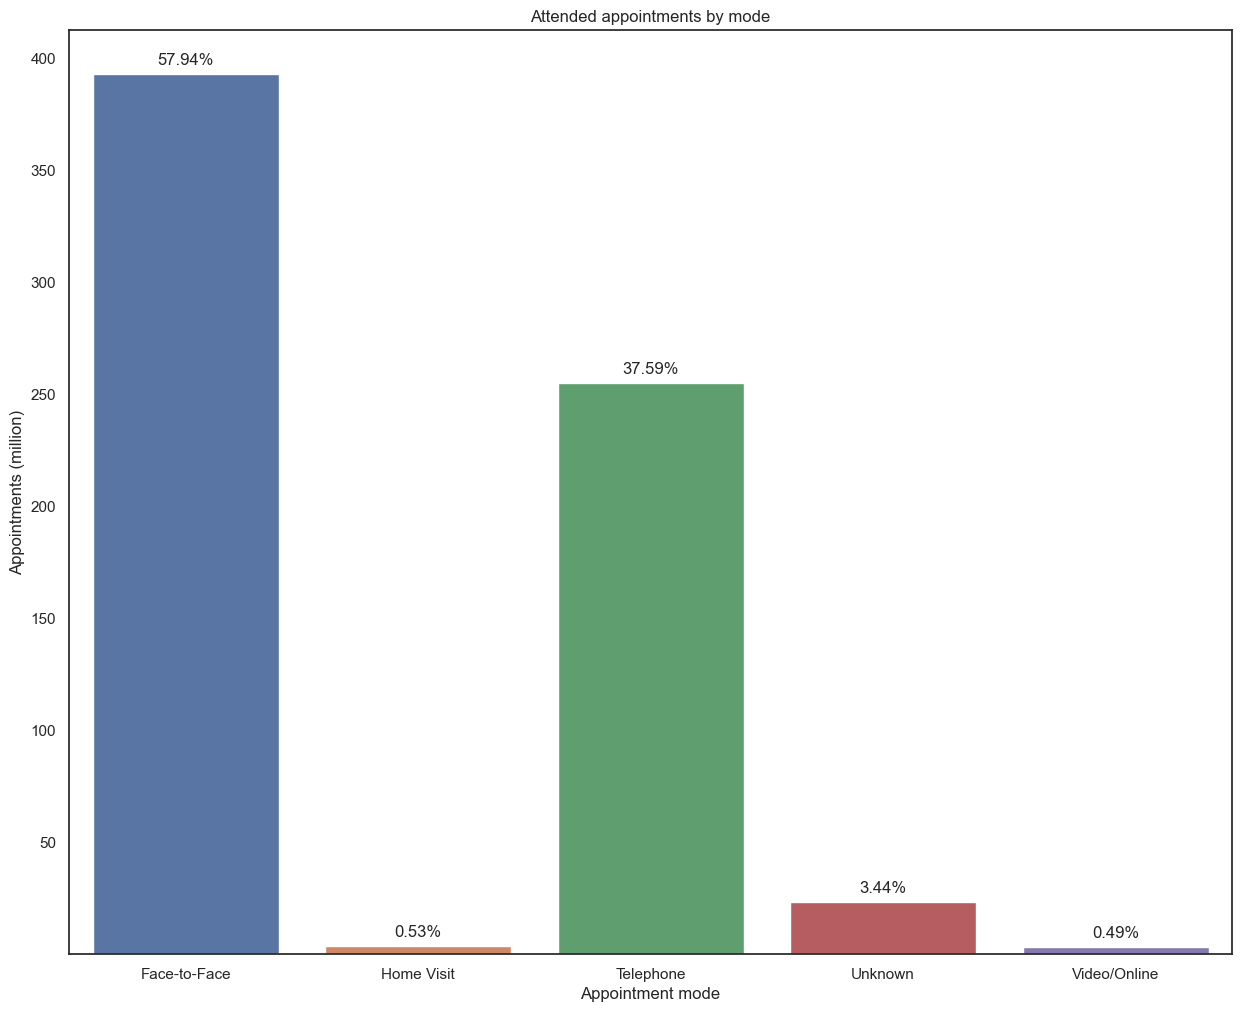

<Figure size 1500x1200 with 0 Axes>

In [108]:
# Create a barplot showing the results
att = sns.barplot(x='appointment_mode', y='count_of_appointments', data=att_app, errorbar=None)

# Set the title, labels, ticks and legend title
att.set_xlabel('Appointment mode')
att.set_ylabel('Appointments (million)')
att.set_title('Attended appointments by mode')
plt.yticks([4.0e8, 3.5e8, 3.0e8, 2.5e8, 2.0e8, 1.5e8, 1.0e8, 0.5e8], ['400', '350', '300', '250', '200', '150', '100', '50'])

# Add percentage labels
total_appointments = att_app['count_of_appointments'].sum()

for p in att.patches:
    percentage = f'{100 * p.get_height() / total_appointments:.2f}%'
    att.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Show barplot
plt.show()

# Saving plot as PNG file
plt.savefig('bar_plot7.png')

In [109]:
# A dataframe created with only the DNA results
dna_app = app_stat[app_stat['appointment_status'] == 'DNA']

# Show the output
dna_app

,appointment_status,appointment_mode,count_of_appointments
5,DNA,Face-to-Face,24253038
6,DNA,Home Visit,187571
7,DNA,Telephone,5262251
8,DNA,Unknown,1049427
9,DNA,Video/Online,158946


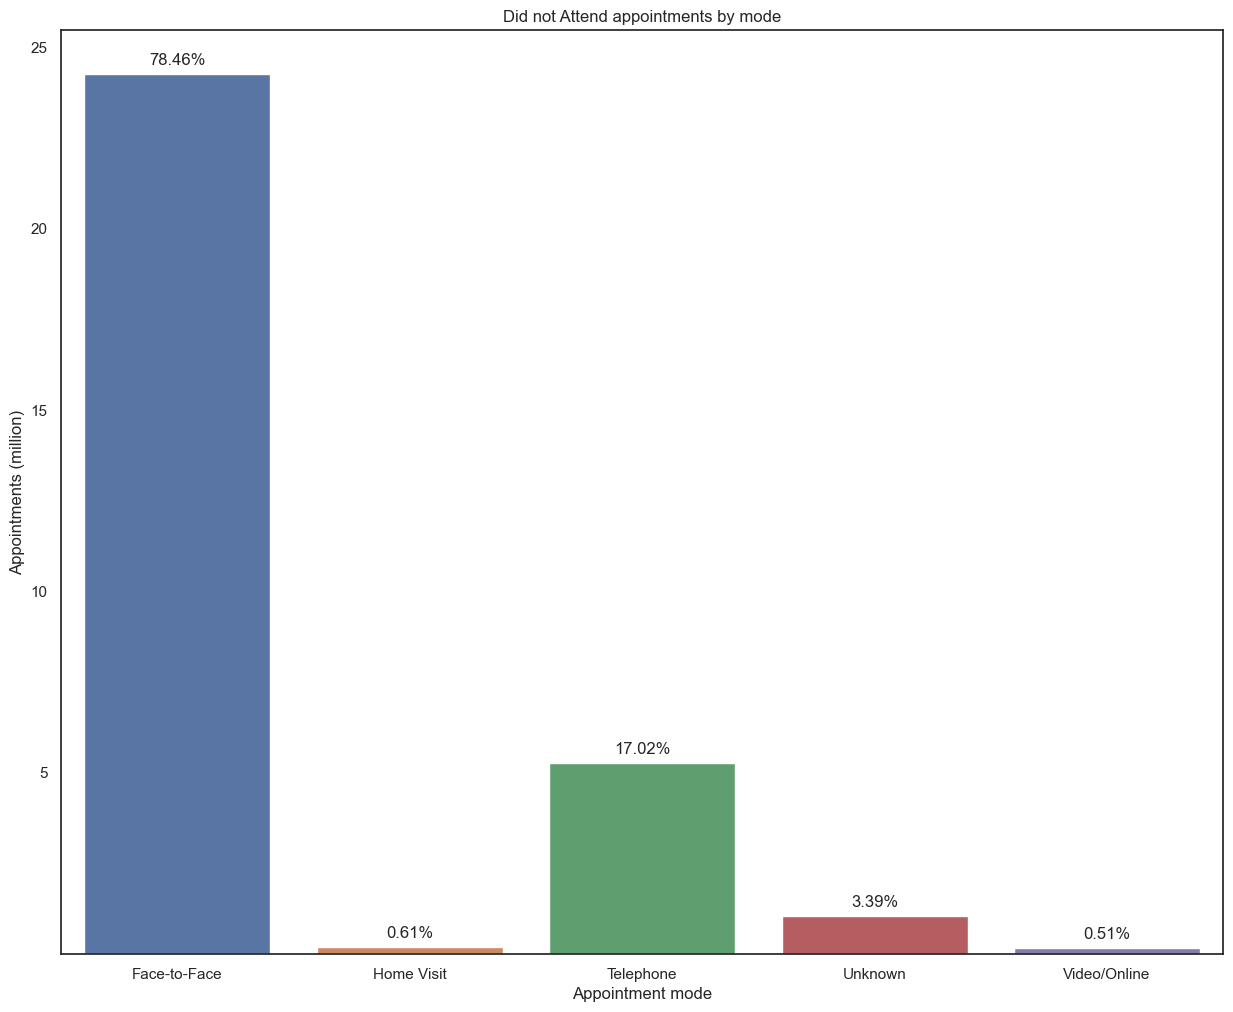

<Figure size 1500x1200 with 0 Axes>

In [110]:
# Create a barplot showing the results
dna = sns.barplot(x='appointment_mode', y='count_of_appointments', data=dna_app, errorbar=None)

# Set the title, labels, ticks and legend title
dna.set_xlabel('Appointment mode')
dna.set_ylabel('Appointments (million)')
dna.set_title('Did not Attend appointments by mode')
plt.yticks([2.5e7, 2.0e7, 1.5e7, 1.0e7, 0.5e7], ['25', '20', '15', '10', '5'])

# Add percentage labels
total_appointments = dna_app['count_of_appointments'].sum()

for p in dna.patches:
    percentage = f'{100 * p.get_height() / total_appointments:.2f}%'
    dna.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show barplot
plt.show()

# Saving plot as PNG file
plt.savefig('bar_plot6.png')

In [111]:
# A dataframe created with only the Unknown results
unknown_app = app_stat[app_stat['appointment_status'] == 'Unknown']

# Show the output
unknown_app

,appointment_status,appointment_mode,count_of_appointments
10,Unknown,Face-to-Face,23022692
11,Unknown,Home Visit,1088237
12,Unknown,Telephone,7801180
13,Unknown,Unknown,2066528
14,Unknown,Video/Online,158779


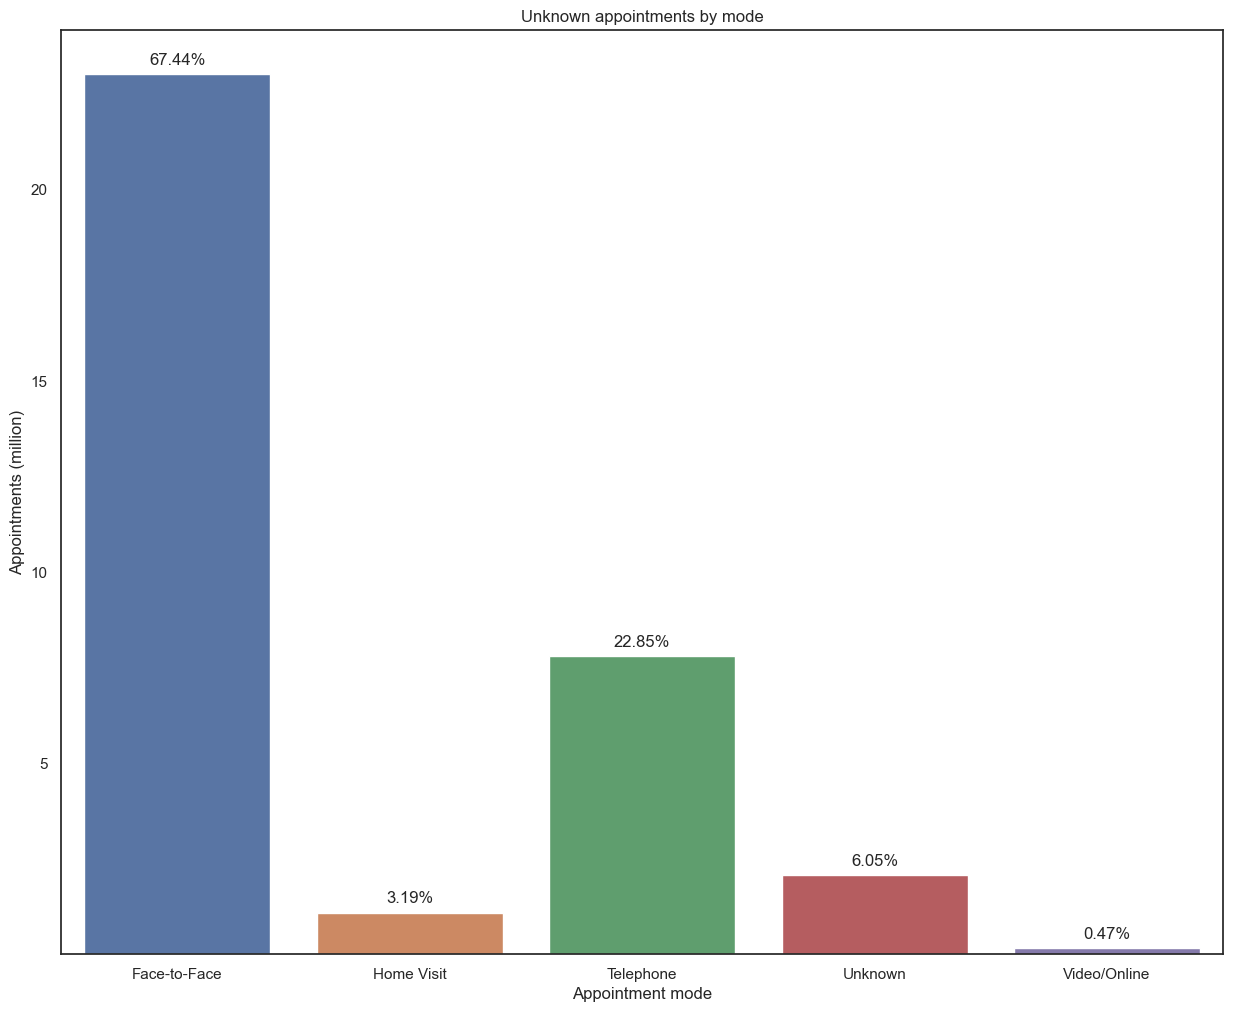

<Figure size 1500x1200 with 0 Axes>

In [112]:
# Create a barplot showing the results
unk = sns.barplot(x='appointment_mode', y='count_of_appointments', data=unknown_app, errorbar=None)

# Set the title, labels, ticks and legend title
unk.set_xlabel('Appointment mode')
unk.set_ylabel('Appointments (million)')
unk.set_title('Unknown appointments by mode')
plt.yticks([2.0e7, 1.5e7, 1.0e7, 0.5e7], ['20', '15', '10', '5'])

# Add percentage labels
total_appointments = unknown_app['count_of_appointments'].sum()

for p in unk.patches:
    percentage = f'{100 * p.get_height() / total_appointments:.2f}%'
    unk.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Show barplot
plt.show()

# Saving plot as PNG file
plt.savefig('bar_plot8.png')

Looking into attendance levels in greater depth revealed that the primary issue with DNA levels lies in Face-to-Face appointments. Interestingly, Telephone appointments, while constituting 37.59% of all attended appointments, account for only 17.02% of DNA appointments. This suggests a higher likelihood of appointments being attended when conducted via telephone. This fact should be considered when attempting to reduce Face-to-Face DNA occurrences. A potential shift to telephone consultations, where feasible, could save valuable time and resources.